In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle




In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#verilerimi data değişkenini içine aktaralım
data = pd.read_csv("heart.csv")

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
#verimizde katagorik değer olup olmadığına bakalım eğer varsa katagorik veri dönüşümü yapıcaz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Datasette herhangi bir yerde null var mı?
data.isnull().values.any()

False

Aykırı Değer Analizi

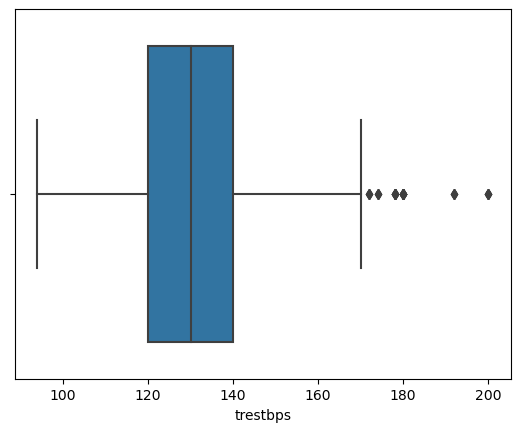

In [7]:
data_trestbps= data["trestbps"]
sns.boxplot(x = data_trestbps);

In [8]:
data_trestbps

0       125
1       140
2       145
3       148
4       138
       ... 
1020    140
1021    125
1022    110
1023    110
1024    120
Name: trestbps, Length: 1025, dtype: int64

In [9]:
Q1 = data_trestbps.quantile(0.25)
Q3 = data_trestbps.quantile(0.75)
IQR = Q3-Q1

In [10]:
Q1

120.0

In [11]:
Q3

140.0

In [12]:
IQR

20.0

In [13]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [14]:
alt_sinir

90.0

In [15]:
ust_sinir

170.0

In [16]:
aykiri_tf = (data_trestbps < alt_sinir)

In [17]:
aykiri_tf2 =(data_trestbps > ust_sinir)

In [18]:
data_trestbps[aykiri_tf]

Series([], Name: trestbps, dtype: int64)

In [19]:
data_trestbps.mean()

131.61170731707318

In [20]:
data_trestbps[aykiri_tf]

Series([], Name: trestbps, dtype: int64)

In [21]:
data_trestbps[aykiri_tf] = alt_sinir

In [22]:
data_trestbps[aykiri_tf2] = ust_sinir

In [23]:
data_trestbps

0       125
1       140
2       145
3       148
4       138
       ... 
1020    140
1021    125
1022    110
1023    110
1024    120
Name: trestbps, Length: 1025, dtype: int64

In [24]:
data_trestbps[aykiri_tf]

Series([], Name: trestbps, dtype: int64)

In [25]:
data["trestbps"] = data_trestbps

In [26]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


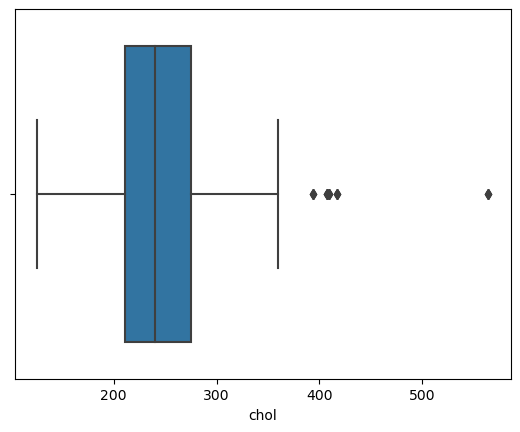

In [27]:
data_chol= data["chol"]
sns.boxplot(x = data_chol);

In [28]:
Q1 = data_chol.quantile(0.25)
Q3 = data_chol.quantile(0.75)
IQR = Q3-Q1

In [29]:
Q1

211.0

In [30]:
Q3

275.0

In [31]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [32]:
alt_sinir

115.0

In [33]:
ust_sinir


371.0

In [34]:
aykiri_chol = (data_chol > ust_sinir)

In [35]:
aykiri_chol2 = (data_chol < alt_sinir)

In [36]:
data_chol[aykiri_chol]= ust_sinir

In [37]:
data_chol[aykiri_chol2]= alt_sinir

In [38]:
data_chol[aykiri_chol]

123    371
158    371
179    371
192    371
255    371
450    371
464    371
481    371
542    371
578    371
641    371
665    371
685    371
889    371
958    371
996    371
Name: chol, dtype: int64

In [39]:
data["chol"] = data_chol

In [40]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


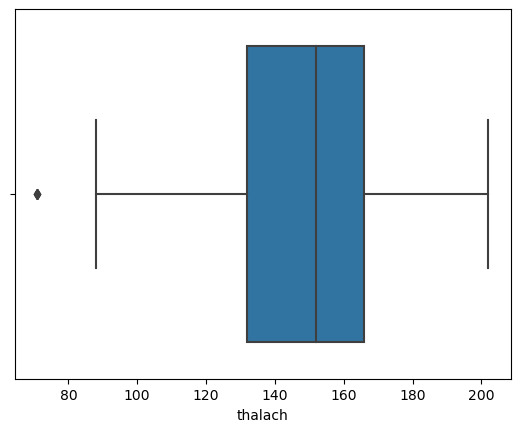

In [41]:
data_thalach= data["thalach"]
sns.boxplot(x = data_thalach);

In [42]:
Q1 = data_chol.quantile(0.25)
Q3 = data_chol.quantile(0.75)
IQR = Q3-Q1

In [43]:
Q1

211.0

In [44]:
Q3

275.0

In [45]:
IQR

64.0

In [46]:
alt_sinir = Q1- 2*IQR
ust_sinir = Q3 + 1.5*IQR

In [47]:
alt_sinir

83.0

In [48]:
aykiri_thalach = (data_thalach < alt_sinir)

In [49]:
aykiri_thalach2 = (data_thalach > ust_sinir)

In [50]:
data_thalach[aykiri_thalach2] =alt_sinir

In [51]:
data_thalach[aykiri_thalach2] =ust_sinir

In [52]:
data_thalach[aykiri_thalach]

267    71
296    71
378    71
559    71
Name: thalach, dtype: int64

In [53]:
data["thalach"] = data_thalach

In [54]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


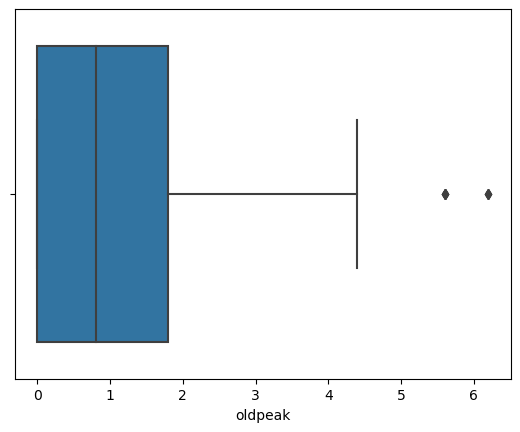

In [55]:
data_peak= data["oldpeak"]
sns.boxplot(x = data_peak);

In [56]:
Q1 = data_peak.quantile(0.25)
Q3 = data_peak.quantile(0.75)
IQR = Q3-Q1

In [57]:
Q1

0.0

In [58]:
Q3

1.8

In [59]:
alt_sinir = Q1- 1.3*IQR
ust_sinir = Q3 + 1.5*IQR

In [60]:
ust_sinir

4.5

In [61]:
alt_sinir

-2.3400000000000003

In [62]:
aykiri_peak = (data_peak < alt_sinir)

In [63]:
aykiri_peak2 = (data_peak > ust_sinir)

In [64]:
data_peak[aykiri_peak2] = ust_sinir

In [65]:
data_peak[aykiri_peak] = alt_sinir

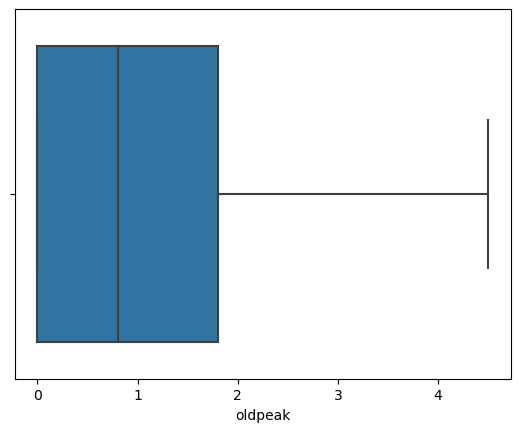

In [66]:
sns.boxplot(x = data_peak);

In [67]:
data["oldpeak"] = data_peak

In [68]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


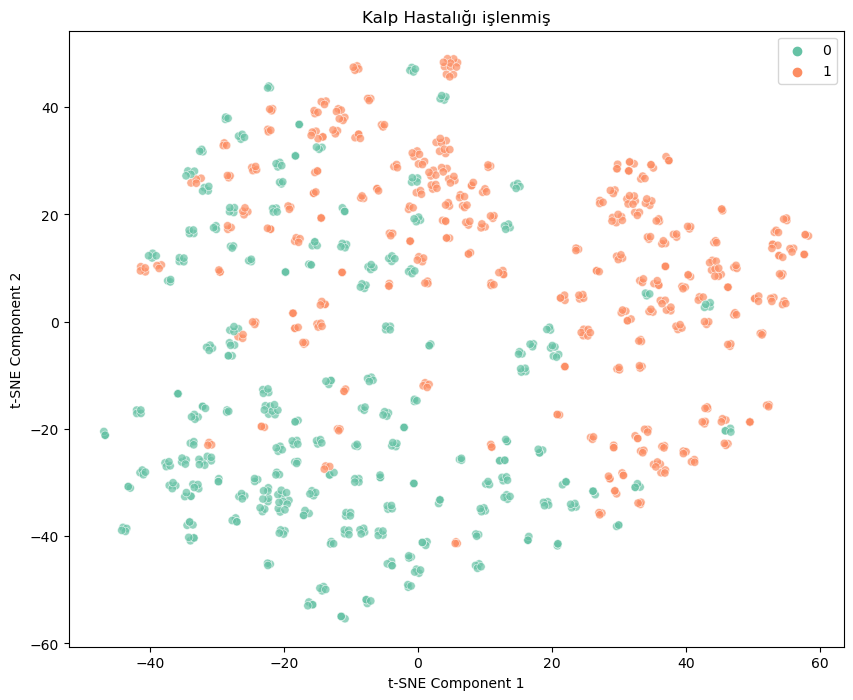

In [69]:
tsne_features = [ 'age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
data_normalized = (data[tsne_features] - data[tsne_features].mean()) / data[tsne_features].std()

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_normalized)

tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['Target'] = data['target']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Target', data=tsne_df, palette='Set2', alpha=0.7)
plt.title('Kalp Hastalığı işlenmiş')
plt.legend()
plt.savefig('result.png')
plt.show()

In [70]:
# Veri kümenizi ve hedef değişkeninizi yükleyin
X = data.drop('target', axis=1)  # Hedef sütunu ayırın, 'Hedef_Sutun' kısmını kendi hedef sütununuzla değiştirin
y = data['target']  # Hedef sütunu

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,170,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [73]:
category_colons = []
for column in data.columns:
    if data[column].dtype == "int64":
        category_colons.append(column)
    else:
        pass
category_colons

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'slope',
 'ca',
 'thal',
 'target']

In [74]:
model_results = dict()

Catboost Algoritması

In [221]:
catboost = CatBoostClassifier(iterations=1000,learning_rate=0.01)
catboost.fit(X_train,y_train)
Y_pred = catboost.predict(X_test)
accuracy_score(y_test,Y_pred)

0:	learn: 0.6837657	total: 2.2ms	remaining: 2.2s
1:	learn: 0.6727643	total: 4.74ms	remaining: 2.36s
2:	learn: 0.6617184	total: 7.06ms	remaining: 2.35s
3:	learn: 0.6519852	total: 8.62ms	remaining: 2.15s
4:	learn: 0.6431743	total: 10.3ms	remaining: 2.05s
5:	learn: 0.6337402	total: 11.9ms	remaining: 1.97s
6:	learn: 0.6247547	total: 13.6ms	remaining: 1.93s
7:	learn: 0.6141452	total: 15.3ms	remaining: 1.89s
8:	learn: 0.6048850	total: 17ms	remaining: 1.87s
9:	learn: 0.5948343	total: 18.6ms	remaining: 1.84s
10:	learn: 0.5865793	total: 20.6ms	remaining: 1.85s
11:	learn: 0.5779141	total: 22.4ms	remaining: 1.84s
12:	learn: 0.5698190	total: 24.1ms	remaining: 1.83s
13:	learn: 0.5617601	total: 25.8ms	remaining: 1.82s
14:	learn: 0.5544276	total: 28.1ms	remaining: 1.84s
15:	learn: 0.5463236	total: 29.7ms	remaining: 1.83s
16:	learn: 0.5394819	total: 31.3ms	remaining: 1.81s
17:	learn: 0.5342433	total: 33ms	remaining: 1.8s
18:	learn: 0.5259352	total: 34.6ms	remaining: 1.79s
19:	learn: 0.5186300	total: 3

236:	learn: 0.1477685	total: 393ms	remaining: 1.27s
237:	learn: 0.1473296	total: 395ms	remaining: 1.26s
238:	learn: 0.1469725	total: 397ms	remaining: 1.26s
239:	learn: 0.1467249	total: 399ms	remaining: 1.26s
240:	learn: 0.1462466	total: 400ms	remaining: 1.26s
241:	learn: 0.1457446	total: 402ms	remaining: 1.26s
242:	learn: 0.1455170	total: 404ms	remaining: 1.26s
243:	learn: 0.1449433	total: 406ms	remaining: 1.26s
244:	learn: 0.1447096	total: 407ms	remaining: 1.25s
245:	learn: 0.1440513	total: 409ms	remaining: 1.25s
246:	learn: 0.1436898	total: 411ms	remaining: 1.25s
247:	learn: 0.1433090	total: 412ms	remaining: 1.25s
248:	learn: 0.1430774	total: 414ms	remaining: 1.25s
249:	learn: 0.1424940	total: 416ms	remaining: 1.25s
250:	learn: 0.1421232	total: 418ms	remaining: 1.25s
251:	learn: 0.1419060	total: 419ms	remaining: 1.24s
252:	learn: 0.1415659	total: 421ms	remaining: 1.24s
253:	learn: 0.1410547	total: 423ms	remaining: 1.24s
254:	learn: 0.1405259	total: 424ms	remaining: 1.24s
255:	learn: 

469:	learn: 0.0815304	total: 780ms	remaining: 879ms
470:	learn: 0.0812726	total: 782ms	remaining: 878ms
471:	learn: 0.0810209	total: 783ms	remaining: 876ms
472:	learn: 0.0808335	total: 785ms	remaining: 875ms
473:	learn: 0.0806518	total: 787ms	remaining: 873ms
474:	learn: 0.0804821	total: 788ms	remaining: 871ms
475:	learn: 0.0802688	total: 790ms	remaining: 869ms
476:	learn: 0.0801327	total: 791ms	remaining: 868ms
477:	learn: 0.0800216	total: 793ms	remaining: 866ms
478:	learn: 0.0799169	total: 795ms	remaining: 864ms
479:	learn: 0.0796955	total: 796ms	remaining: 863ms
480:	learn: 0.0796296	total: 798ms	remaining: 861ms
481:	learn: 0.0794069	total: 800ms	remaining: 859ms
482:	learn: 0.0792365	total: 801ms	remaining: 858ms
483:	learn: 0.0790892	total: 803ms	remaining: 856ms
484:	learn: 0.0789230	total: 805ms	remaining: 854ms
485:	learn: 0.0785213	total: 806ms	remaining: 853ms
486:	learn: 0.0784147	total: 808ms	remaining: 851ms
487:	learn: 0.0782576	total: 809ms	remaining: 849ms
488:	learn: 

705:	learn: 0.0488932	total: 1.17s	remaining: 487ms
706:	learn: 0.0487271	total: 1.17s	remaining: 486ms
707:	learn: 0.0486325	total: 1.17s	remaining: 484ms
708:	learn: 0.0485098	total: 1.18s	remaining: 483ms
709:	learn: 0.0484181	total: 1.18s	remaining: 481ms
710:	learn: 0.0483389	total: 1.18s	remaining: 479ms
711:	learn: 0.0482157	total: 1.18s	remaining: 478ms
712:	learn: 0.0481270	total: 1.18s	remaining: 476ms
713:	learn: 0.0479198	total: 1.18s	remaining: 474ms
714:	learn: 0.0479054	total: 1.19s	remaining: 473ms
715:	learn: 0.0478671	total: 1.19s	remaining: 471ms
716:	learn: 0.0477157	total: 1.19s	remaining: 470ms
717:	learn: 0.0476014	total: 1.19s	remaining: 468ms
718:	learn: 0.0475020	total: 1.19s	remaining: 466ms
719:	learn: 0.0473876	total: 1.19s	remaining: 465ms
720:	learn: 0.0473377	total: 1.2s	remaining: 463ms
721:	learn: 0.0472428	total: 1.2s	remaining: 461ms
722:	learn: 0.0471504	total: 1.2s	remaining: 460ms
723:	learn: 0.0470891	total: 1.2s	remaining: 458ms
724:	learn: 0.04

951:	learn: 0.0337646	total: 1.56s	remaining: 78.8ms
952:	learn: 0.0337303	total: 1.56s	remaining: 77.2ms
953:	learn: 0.0337114	total: 1.57s	remaining: 75.5ms
954:	learn: 0.0336535	total: 1.57s	remaining: 73.9ms
955:	learn: 0.0336368	total: 1.57s	remaining: 72.2ms
956:	learn: 0.0335782	total: 1.57s	remaining: 70.6ms
957:	learn: 0.0335734	total: 1.57s	remaining: 69ms
958:	learn: 0.0335173	total: 1.57s	remaining: 67.3ms
959:	learn: 0.0334933	total: 1.58s	remaining: 65.7ms
960:	learn: 0.0334024	total: 1.58s	remaining: 64.1ms
961:	learn: 0.0333452	total: 1.58s	remaining: 62.4ms
962:	learn: 0.0332974	total: 1.58s	remaining: 60.8ms
963:	learn: 0.0332351	total: 1.58s	remaining: 59.1ms
964:	learn: 0.0331772	total: 1.58s	remaining: 57.5ms
965:	learn: 0.0331247	total: 1.59s	remaining: 55.9ms
966:	learn: 0.0330909	total: 1.59s	remaining: 54.2ms
967:	learn: 0.0330138	total: 1.59s	remaining: 52.6ms
968:	learn: 0.0329970	total: 1.59s	remaining: 50.9ms
969:	learn: 0.0329530	total: 1.59s	remaining: 49

0.9853658536585366

In [222]:
param_grid = {
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}


In [223]:
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3)
grid_search.fit(X, y)  # X ve y, eğitim verilerinizi ve etiketlerinizi temsil eder

0:	learn: 0.6888932	total: 626us	remaining: 62.1ms
1:	learn: 0.6853583	total: 1.67ms	remaining: 81.6ms
2:	learn: 0.6812861	total: 2.4ms	remaining: 77.8ms
3:	learn: 0.6776324	total: 2.87ms	remaining: 69ms
4:	learn: 0.6742924	total: 3.44ms	remaining: 65.3ms
5:	learn: 0.6707136	total: 3.94ms	remaining: 61.7ms
6:	learn: 0.6669690	total: 4.46ms	remaining: 59.3ms
7:	learn: 0.6633731	total: 4.98ms	remaining: 57.3ms
8:	learn: 0.6601465	total: 5.56ms	remaining: 56.2ms
9:	learn: 0.6562309	total: 6.06ms	remaining: 54.6ms
10:	learn: 0.6534582	total: 6.55ms	remaining: 53ms
11:	learn: 0.6506397	total: 7.07ms	remaining: 51.8ms
12:	learn: 0.6474124	total: 7.65ms	remaining: 51.2ms
13:	learn: 0.6439913	total: 8.17ms	remaining: 50.2ms
14:	learn: 0.6408942	total: 8.77ms	remaining: 49.7ms
15:	learn: 0.6375207	total: 9.39ms	remaining: 49.3ms
16:	learn: 0.6349833	total: 9.96ms	remaining: 48.6ms
17:	learn: 0.6321464	total: 10.6ms	remaining: 48.1ms
18:	learn: 0.6286112	total: 11.1ms	remaining: 47.5ms
19:	learn

27:	learn: 0.5926261	total: 14.9ms	remaining: 38.3ms
28:	learn: 0.5902203	total: 15.5ms	remaining: 38ms
29:	learn: 0.5871373	total: 16.1ms	remaining: 37.6ms
30:	learn: 0.5839163	total: 16.7ms	remaining: 37.2ms
31:	learn: 0.5808704	total: 17.4ms	remaining: 37ms
32:	learn: 0.5779875	total: 18ms	remaining: 36.5ms
33:	learn: 0.5751532	total: 18.5ms	remaining: 36ms
34:	learn: 0.5719999	total: 19.1ms	remaining: 35.5ms
35:	learn: 0.5691932	total: 19.7ms	remaining: 35ms
36:	learn: 0.5665020	total: 20.3ms	remaining: 34.5ms
37:	learn: 0.5642093	total: 20.7ms	remaining: 33.8ms
38:	learn: 0.5612063	total: 21.4ms	remaining: 33.4ms
39:	learn: 0.5590818	total: 22ms	remaining: 32.9ms
40:	learn: 0.5563085	total: 22.6ms	remaining: 32.6ms
41:	learn: 0.5536696	total: 23.2ms	remaining: 32.1ms
42:	learn: 0.5511812	total: 23.7ms	remaining: 31.5ms
43:	learn: 0.5485301	total: 24.4ms	remaining: 31ms
44:	learn: 0.5462725	total: 24.9ms	remaining: 30.5ms
45:	learn: 0.5441667	total: 25.5ms	remaining: 29.9ms
46:	lea

0:	learn: 0.6475976	total: 657us	remaining: 65.1ms
1:	learn: 0.6156306	total: 1.32ms	remaining: 64.5ms
2:	learn: 0.5865769	total: 1.9ms	remaining: 61.3ms
3:	learn: 0.5570984	total: 2.4ms	remaining: 57.6ms
4:	learn: 0.5343035	total: 2.9ms	remaining: 55.1ms
5:	learn: 0.5110269	total: 3.35ms	remaining: 52.5ms
6:	learn: 0.4895124	total: 3.8ms	remaining: 50.5ms
7:	learn: 0.4703557	total: 4.34ms	remaining: 49.9ms
8:	learn: 0.4557427	total: 4.82ms	remaining: 48.8ms
9:	learn: 0.4387648	total: 5.35ms	remaining: 48.1ms
10:	learn: 0.4270830	total: 5.82ms	remaining: 47.1ms
11:	learn: 0.4131816	total: 6.31ms	remaining: 46.2ms
12:	learn: 0.4025243	total: 6.84ms	remaining: 45.8ms
13:	learn: 0.3924615	total: 7.42ms	remaining: 45.6ms
14:	learn: 0.3808998	total: 7.92ms	remaining: 44.9ms
15:	learn: 0.3726996	total: 8.4ms	remaining: 44.1ms
16:	learn: 0.3647646	total: 8.88ms	remaining: 43.3ms
17:	learn: 0.3587483	total: 9.36ms	remaining: 42.6ms
18:	learn: 0.3506139	total: 9.83ms	remaining: 41.9ms
19:	learn

84:	learn: 0.1343499	total: 41ms	remaining: 7.24ms
85:	learn: 0.1330278	total: 41.6ms	remaining: 6.77ms
86:	learn: 0.1316163	total: 42.1ms	remaining: 6.29ms
87:	learn: 0.1299201	total: 42.6ms	remaining: 5.81ms
88:	learn: 0.1279513	total: 43.2ms	remaining: 5.33ms
89:	learn: 0.1277009	total: 43.6ms	remaining: 4.85ms
90:	learn: 0.1273167	total: 44.1ms	remaining: 4.36ms
91:	learn: 0.1264302	total: 44.6ms	remaining: 3.88ms
92:	learn: 0.1260813	total: 45ms	remaining: 3.39ms
93:	learn: 0.1245792	total: 45.5ms	remaining: 2.9ms
94:	learn: 0.1231213	total: 45.9ms	remaining: 2.42ms
95:	learn: 0.1208224	total: 46.4ms	remaining: 1.93ms
96:	learn: 0.1196382	total: 46.9ms	remaining: 1.45ms
97:	learn: 0.1194249	total: 47.4ms	remaining: 967us
98:	learn: 0.1175412	total: 47.9ms	remaining: 483us
99:	learn: 0.1156755	total: 48.4ms	remaining: 0us
0:	learn: 0.6059790	total: 546us	remaining: 54.1ms
1:	learn: 0.5546477	total: 1.03ms	remaining: 50.5ms
2:	learn: 0.5108512	total: 1.52ms	remaining: 49ms
3:	learn:

69:	learn: 0.4194978	total: 90.4ms	remaining: 555ms
70:	learn: 0.4179691	total: 92.1ms	remaining: 556ms
71:	learn: 0.4164930	total: 93.4ms	remaining: 555ms
72:	learn: 0.4140072	total: 94.6ms	remaining: 554ms
73:	learn: 0.4121360	total: 96.1ms	remaining: 553ms
74:	learn: 0.4103524	total: 97.5ms	remaining: 552ms
75:	learn: 0.4087020	total: 99.2ms	remaining: 553ms
76:	learn: 0.4072634	total: 101ms	remaining: 553ms
77:	learn: 0.4055049	total: 102ms	remaining: 553ms
78:	learn: 0.4047146	total: 104ms	remaining: 553ms
79:	learn: 0.4031798	total: 105ms	remaining: 553ms
80:	learn: 0.4009871	total: 107ms	remaining: 551ms
81:	learn: 0.4000982	total: 108ms	remaining: 551ms
82:	learn: 0.3984387	total: 109ms	remaining: 550ms
83:	learn: 0.3967715	total: 111ms	remaining: 549ms
84:	learn: 0.3952387	total: 112ms	remaining: 547ms
85:	learn: 0.3938902	total: 113ms	remaining: 545ms
86:	learn: 0.3924532	total: 115ms	remaining: 544ms
87:	learn: 0.3907985	total: 116ms	remaining: 542ms
88:	learn: 0.3888951	tot

234:	learn: 0.2666332	total: 324ms	remaining: 365ms
235:	learn: 0.2662313	total: 326ms	remaining: 364ms
236:	learn: 0.2656479	total: 327ms	remaining: 363ms
237:	learn: 0.2649578	total: 329ms	remaining: 362ms
238:	learn: 0.2646072	total: 330ms	remaining: 360ms
239:	learn: 0.2643304	total: 331ms	remaining: 359ms
240:	learn: 0.2636741	total: 333ms	remaining: 358ms
241:	learn: 0.2633059	total: 335ms	remaining: 357ms
242:	learn: 0.2627077	total: 336ms	remaining: 356ms
243:	learn: 0.2617559	total: 338ms	remaining: 354ms
244:	learn: 0.2610588	total: 339ms	remaining: 353ms
245:	learn: 0.2607621	total: 341ms	remaining: 352ms
246:	learn: 0.2602294	total: 342ms	remaining: 351ms
247:	learn: 0.2597468	total: 344ms	remaining: 349ms
248:	learn: 0.2593254	total: 345ms	remaining: 348ms
249:	learn: 0.2589804	total: 347ms	remaining: 347ms
250:	learn: 0.2587948	total: 348ms	remaining: 346ms
251:	learn: 0.2579892	total: 350ms	remaining: 344ms
252:	learn: 0.2573703	total: 351ms	remaining: 343ms
253:	learn: 

481:	learn: 0.1838793	total: 665ms	remaining: 24.8ms
482:	learn: 0.1835214	total: 667ms	remaining: 23.5ms
483:	learn: 0.1833258	total: 668ms	remaining: 22.1ms
484:	learn: 0.1831915	total: 669ms	remaining: 20.7ms
485:	learn: 0.1829788	total: 671ms	remaining: 19.3ms
486:	learn: 0.1826871	total: 672ms	remaining: 17.9ms
487:	learn: 0.1825560	total: 673ms	remaining: 16.6ms
488:	learn: 0.1824780	total: 675ms	remaining: 15.2ms
489:	learn: 0.1820938	total: 676ms	remaining: 13.8ms
490:	learn: 0.1819217	total: 678ms	remaining: 12.4ms
491:	learn: 0.1817240	total: 679ms	remaining: 11ms
492:	learn: 0.1816050	total: 680ms	remaining: 9.66ms
493:	learn: 0.1813186	total: 682ms	remaining: 8.28ms
494:	learn: 0.1808880	total: 683ms	remaining: 6.9ms
495:	learn: 0.1805704	total: 685ms	remaining: 5.52ms
496:	learn: 0.1803883	total: 686ms	remaining: 4.14ms
497:	learn: 0.1802829	total: 687ms	remaining: 2.76ms
498:	learn: 0.1801391	total: 689ms	remaining: 1.38ms
499:	learn: 0.1798850	total: 690ms	remaining: 0us

241:	learn: 0.2446947	total: 319ms	remaining: 340ms
242:	learn: 0.2442584	total: 320ms	remaining: 339ms
243:	learn: 0.2438368	total: 322ms	remaining: 338ms
244:	learn: 0.2434457	total: 323ms	remaining: 336ms
245:	learn: 0.2431289	total: 324ms	remaining: 335ms
246:	learn: 0.2427145	total: 326ms	remaining: 333ms
247:	learn: 0.2422023	total: 327ms	remaining: 332ms
248:	learn: 0.2418570	total: 328ms	remaining: 331ms
249:	learn: 0.2413418	total: 330ms	remaining: 330ms
250:	learn: 0.2409105	total: 331ms	remaining: 328ms
251:	learn: 0.2405392	total: 332ms	remaining: 327ms
252:	learn: 0.2400642	total: 333ms	remaining: 326ms
253:	learn: 0.2394706	total: 335ms	remaining: 324ms
254:	learn: 0.2390413	total: 336ms	remaining: 323ms
255:	learn: 0.2384989	total: 337ms	remaining: 322ms
256:	learn: 0.2379974	total: 339ms	remaining: 320ms
257:	learn: 0.2372494	total: 340ms	remaining: 319ms
258:	learn: 0.2369846	total: 341ms	remaining: 318ms
259:	learn: 0.2365034	total: 342ms	remaining: 316ms
260:	learn: 

435:	learn: 0.1754857	total: 561ms	remaining: 82.3ms
436:	learn: 0.1752292	total: 562ms	remaining: 81.1ms
437:	learn: 0.1749820	total: 564ms	remaining: 79.8ms
438:	learn: 0.1747837	total: 565ms	remaining: 78.5ms
439:	learn: 0.1745643	total: 566ms	remaining: 77.2ms
440:	learn: 0.1743718	total: 568ms	remaining: 75.9ms
441:	learn: 0.1742067	total: 569ms	remaining: 74.6ms
442:	learn: 0.1739517	total: 570ms	remaining: 73.3ms
443:	learn: 0.1737829	total: 571ms	remaining: 72ms
444:	learn: 0.1734784	total: 572ms	remaining: 70.8ms
445:	learn: 0.1732116	total: 574ms	remaining: 69.5ms
446:	learn: 0.1728903	total: 575ms	remaining: 68.2ms
447:	learn: 0.1726751	total: 576ms	remaining: 66.9ms
448:	learn: 0.1721744	total: 577ms	remaining: 65.6ms
449:	learn: 0.1720270	total: 579ms	remaining: 64.3ms
450:	learn: 0.1717392	total: 580ms	remaining: 63ms
451:	learn: 0.1714550	total: 581ms	remaining: 61.7ms
452:	learn: 0.1709951	total: 582ms	remaining: 60.4ms
453:	learn: 0.1706520	total: 583ms	remaining: 59.1

180:	learn: 0.2661232	total: 221ms	remaining: 390ms
181:	learn: 0.2655943	total: 223ms	remaining: 389ms
182:	learn: 0.2650409	total: 224ms	remaining: 388ms
183:	learn: 0.2645217	total: 225ms	remaining: 387ms
184:	learn: 0.2638759	total: 226ms	remaining: 386ms
185:	learn: 0.2629123	total: 228ms	remaining: 384ms
186:	learn: 0.2622403	total: 229ms	remaining: 383ms
187:	learn: 0.2615467	total: 230ms	remaining: 382ms
188:	learn: 0.2608702	total: 232ms	remaining: 381ms
189:	learn: 0.2604069	total: 233ms	remaining: 380ms
190:	learn: 0.2597659	total: 234ms	remaining: 379ms
191:	learn: 0.2590753	total: 235ms	remaining: 378ms
192:	learn: 0.2583085	total: 237ms	remaining: 377ms
193:	learn: 0.2575847	total: 238ms	remaining: 376ms
194:	learn: 0.2569546	total: 239ms	remaining: 374ms
195:	learn: 0.2563738	total: 241ms	remaining: 373ms
196:	learn: 0.2558439	total: 242ms	remaining: 372ms
197:	learn: 0.2554416	total: 243ms	remaining: 370ms
198:	learn: 0.2550084	total: 244ms	remaining: 369ms
199:	learn: 

345:	learn: 0.1971481	total: 420ms	remaining: 187ms
346:	learn: 0.1969135	total: 422ms	remaining: 186ms
347:	learn: 0.1965519	total: 423ms	remaining: 185ms
348:	learn: 0.1962721	total: 424ms	remaining: 184ms
349:	learn: 0.1958876	total: 426ms	remaining: 182ms
350:	learn: 0.1956583	total: 427ms	remaining: 181ms
351:	learn: 0.1953253	total: 428ms	remaining: 180ms
352:	learn: 0.1951510	total: 430ms	remaining: 179ms
353:	learn: 0.1946916	total: 431ms	remaining: 178ms
354:	learn: 0.1944296	total: 432ms	remaining: 177ms
355:	learn: 0.1940564	total: 433ms	remaining: 175ms
356:	learn: 0.1938214	total: 435ms	remaining: 174ms
357:	learn: 0.1935715	total: 436ms	remaining: 173ms
358:	learn: 0.1934097	total: 438ms	remaining: 172ms
359:	learn: 0.1930870	total: 439ms	remaining: 171ms
360:	learn: 0.1928873	total: 440ms	remaining: 169ms
361:	learn: 0.1925502	total: 441ms	remaining: 168ms
362:	learn: 0.1922039	total: 443ms	remaining: 167ms
363:	learn: 0.1919235	total: 444ms	remaining: 166ms
364:	learn: 

7:	learn: 0.4085161	total: 9.72ms	remaining: 598ms
8:	learn: 0.3952664	total: 11.3ms	remaining: 616ms
9:	learn: 0.3761010	total: 12.5ms	remaining: 611ms
10:	learn: 0.3619551	total: 13.7ms	remaining: 607ms
11:	learn: 0.3527749	total: 14.9ms	remaining: 604ms
12:	learn: 0.3438147	total: 16.1ms	remaining: 602ms
13:	learn: 0.3361268	total: 17.5ms	remaining: 608ms
14:	learn: 0.3267939	total: 18.8ms	remaining: 608ms
15:	learn: 0.3193551	total: 20ms	remaining: 605ms
16:	learn: 0.3091541	total: 21.2ms	remaining: 602ms
17:	learn: 0.3034957	total: 22.5ms	remaining: 603ms
18:	learn: 0.2968607	total: 23.9ms	remaining: 606ms
19:	learn: 0.2927790	total: 25.2ms	remaining: 606ms
20:	learn: 0.2872637	total: 26.6ms	remaining: 607ms
21:	learn: 0.2832456	total: 27.9ms	remaining: 607ms
22:	learn: 0.2795961	total: 29.2ms	remaining: 606ms
23:	learn: 0.2752485	total: 30.5ms	remaining: 604ms
24:	learn: 0.2686234	total: 31.7ms	remaining: 602ms
25:	learn: 0.2656589	total: 32.9ms	remaining: 600ms
26:	learn: 0.2633

294:	learn: 0.0191307	total: 363ms	remaining: 253ms
295:	learn: 0.0189112	total: 365ms	remaining: 251ms
296:	learn: 0.0187345	total: 366ms	remaining: 250ms
297:	learn: 0.0187267	total: 367ms	remaining: 249ms
298:	learn: 0.0187040	total: 368ms	remaining: 248ms
299:	learn: 0.0186744	total: 370ms	remaining: 246ms
300:	learn: 0.0186181	total: 371ms	remaining: 245ms
301:	learn: 0.0185149	total: 372ms	remaining: 244ms
302:	learn: 0.0183950	total: 373ms	remaining: 243ms
303:	learn: 0.0182502	total: 375ms	remaining: 241ms
304:	learn: 0.0181098	total: 376ms	remaining: 240ms
305:	learn: 0.0179318	total: 377ms	remaining: 239ms
306:	learn: 0.0178652	total: 379ms	remaining: 238ms
307:	learn: 0.0178448	total: 380ms	remaining: 237ms
308:	learn: 0.0178370	total: 382ms	remaining: 236ms
309:	learn: 0.0178299	total: 383ms	remaining: 235ms
310:	learn: 0.0177806	total: 384ms	remaining: 233ms
311:	learn: 0.0176867	total: 386ms	remaining: 232ms
312:	learn: 0.0176018	total: 387ms	remaining: 231ms
313:	learn: 

466:	learn: 0.0098207	total: 581ms	remaining: 41.1ms
467:	learn: 0.0098207	total: 582ms	remaining: 39.8ms
468:	learn: 0.0097813	total: 583ms	remaining: 38.6ms
469:	learn: 0.0097478	total: 585ms	remaining: 37.3ms
470:	learn: 0.0097471	total: 586ms	remaining: 36.1ms
471:	learn: 0.0097133	total: 587ms	remaining: 34.8ms
472:	learn: 0.0097007	total: 589ms	remaining: 33.6ms
473:	learn: 0.0096973	total: 590ms	remaining: 32.3ms
474:	learn: 0.0096860	total: 591ms	remaining: 31.1ms
475:	learn: 0.0096307	total: 592ms	remaining: 29.9ms
476:	learn: 0.0095332	total: 594ms	remaining: 28.6ms
477:	learn: 0.0095192	total: 595ms	remaining: 27.4ms
478:	learn: 0.0094901	total: 596ms	remaining: 26.1ms
479:	learn: 0.0094526	total: 598ms	remaining: 24.9ms
480:	learn: 0.0094396	total: 600ms	remaining: 23.7ms
481:	learn: 0.0093797	total: 601ms	remaining: 22.4ms
482:	learn: 0.0093558	total: 602ms	remaining: 21.2ms
483:	learn: 0.0092796	total: 604ms	remaining: 20ms
484:	learn: 0.0092796	total: 605ms	remaining: 18

213:	learn: 0.0307933	total: 275ms	remaining: 368ms
214:	learn: 0.0307606	total: 277ms	remaining: 367ms
215:	learn: 0.0307235	total: 278ms	remaining: 365ms
216:	learn: 0.0305112	total: 279ms	remaining: 364ms
217:	learn: 0.0303364	total: 280ms	remaining: 363ms
218:	learn: 0.0302181	total: 282ms	remaining: 362ms
219:	learn: 0.0300600	total: 283ms	remaining: 361ms
220:	learn: 0.0298513	total: 285ms	remaining: 359ms
221:	learn: 0.0295701	total: 286ms	remaining: 358ms
222:	learn: 0.0293530	total: 288ms	remaining: 357ms
223:	learn: 0.0289676	total: 289ms	remaining: 356ms
224:	learn: 0.0286575	total: 291ms	remaining: 355ms
225:	learn: 0.0283882	total: 292ms	remaining: 354ms
226:	learn: 0.0282539	total: 294ms	remaining: 353ms
227:	learn: 0.0281002	total: 295ms	remaining: 352ms
228:	learn: 0.0278308	total: 296ms	remaining: 351ms
229:	learn: 0.0275314	total: 298ms	remaining: 349ms
230:	learn: 0.0274135	total: 299ms	remaining: 348ms
231:	learn: 0.0270973	total: 300ms	remaining: 347ms
232:	learn: 

394:	learn: 0.0118746	total: 513ms	remaining: 136ms
395:	learn: 0.0118628	total: 515ms	remaining: 135ms
396:	learn: 0.0118626	total: 516ms	remaining: 134ms
397:	learn: 0.0118624	total: 517ms	remaining: 133ms
398:	learn: 0.0118624	total: 518ms	remaining: 131ms
399:	learn: 0.0117636	total: 520ms	remaining: 130ms
400:	learn: 0.0116892	total: 521ms	remaining: 129ms
401:	learn: 0.0116516	total: 522ms	remaining: 127ms
402:	learn: 0.0116516	total: 523ms	remaining: 126ms
403:	learn: 0.0116263	total: 525ms	remaining: 125ms
404:	learn: 0.0116263	total: 526ms	remaining: 123ms
405:	learn: 0.0116263	total: 526ms	remaining: 122ms
406:	learn: 0.0115165	total: 528ms	remaining: 121ms
407:	learn: 0.0114390	total: 529ms	remaining: 119ms
408:	learn: 0.0114185	total: 530ms	remaining: 118ms
409:	learn: 0.0113959	total: 532ms	remaining: 117ms
410:	learn: 0.0113958	total: 533ms	remaining: 115ms
411:	learn: 0.0113833	total: 534ms	remaining: 114ms
412:	learn: 0.0113831	total: 535ms	remaining: 113ms
413:	learn: 

168:	learn: 0.0427937	total: 205ms	remaining: 402ms
169:	learn: 0.0425472	total: 207ms	remaining: 401ms
170:	learn: 0.0423820	total: 208ms	remaining: 400ms
171:	learn: 0.0417120	total: 209ms	remaining: 399ms
172:	learn: 0.0412411	total: 210ms	remaining: 397ms
173:	learn: 0.0411386	total: 211ms	remaining: 396ms
174:	learn: 0.0406553	total: 213ms	remaining: 395ms
175:	learn: 0.0399448	total: 214ms	remaining: 394ms
176:	learn: 0.0393142	total: 216ms	remaining: 393ms
177:	learn: 0.0389378	total: 217ms	remaining: 392ms
178:	learn: 0.0387346	total: 218ms	remaining: 391ms
179:	learn: 0.0383057	total: 219ms	remaining: 390ms
180:	learn: 0.0379161	total: 221ms	remaining: 389ms
181:	learn: 0.0376613	total: 222ms	remaining: 388ms
182:	learn: 0.0371057	total: 223ms	remaining: 387ms
183:	learn: 0.0366955	total: 225ms	remaining: 386ms
184:	learn: 0.0364269	total: 226ms	remaining: 385ms
185:	learn: 0.0362592	total: 227ms	remaining: 384ms
186:	learn: 0.0358444	total: 228ms	remaining: 382ms
187:	learn: 

349:	learn: 0.0104570	total: 429ms	remaining: 184ms
350:	learn: 0.0103788	total: 431ms	remaining: 183ms
351:	learn: 0.0103148	total: 432ms	remaining: 182ms
352:	learn: 0.0102479	total: 434ms	remaining: 181ms
353:	learn: 0.0101382	total: 435ms	remaining: 179ms
354:	learn: 0.0100743	total: 437ms	remaining: 178ms
355:	learn: 0.0099991	total: 438ms	remaining: 177ms
356:	learn: 0.0099572	total: 440ms	remaining: 176ms
357:	learn: 0.0099085	total: 441ms	remaining: 175ms
358:	learn: 0.0098861	total: 442ms	remaining: 174ms
359:	learn: 0.0098861	total: 443ms	remaining: 172ms
360:	learn: 0.0098860	total: 444ms	remaining: 171ms
361:	learn: 0.0098861	total: 445ms	remaining: 170ms
362:	learn: 0.0098792	total: 446ms	remaining: 168ms
363:	learn: 0.0098793	total: 447ms	remaining: 167ms
364:	learn: 0.0098792	total: 448ms	remaining: 166ms
365:	learn: 0.0098759	total: 449ms	remaining: 165ms
366:	learn: 0.0098759	total: 450ms	remaining: 163ms
367:	learn: 0.0098374	total: 452ms	remaining: 162ms
368:	learn: 

110:	learn: 0.0281794	total: 132ms	remaining: 463ms
111:	learn: 0.0279871	total: 134ms	remaining: 463ms
112:	learn: 0.0276215	total: 135ms	remaining: 462ms
113:	learn: 0.0275796	total: 136ms	remaining: 461ms
114:	learn: 0.0275477	total: 137ms	remaining: 459ms
115:	learn: 0.0274777	total: 138ms	remaining: 458ms
116:	learn: 0.0272193	total: 140ms	remaining: 457ms
117:	learn: 0.0268423	total: 141ms	remaining: 456ms
118:	learn: 0.0268136	total: 142ms	remaining: 454ms
119:	learn: 0.0267507	total: 143ms	remaining: 453ms
120:	learn: 0.0262817	total: 144ms	remaining: 452ms
121:	learn: 0.0258028	total: 146ms	remaining: 451ms
122:	learn: 0.0254402	total: 147ms	remaining: 451ms
123:	learn: 0.0247338	total: 148ms	remaining: 450ms
124:	learn: 0.0245759	total: 150ms	remaining: 449ms
125:	learn: 0.0241263	total: 151ms	remaining: 448ms
126:	learn: 0.0240604	total: 152ms	remaining: 447ms
127:	learn: 0.0237933	total: 154ms	remaining: 447ms
128:	learn: 0.0231813	total: 155ms	remaining: 446ms
129:	learn: 

329:	learn: 0.0056261	total: 387ms	remaining: 199ms
330:	learn: 0.0055974	total: 388ms	remaining: 198ms
331:	learn: 0.0055567	total: 389ms	remaining: 197ms
332:	learn: 0.0055279	total: 391ms	remaining: 196ms
333:	learn: 0.0054243	total: 392ms	remaining: 195ms
334:	learn: 0.0054241	total: 393ms	remaining: 193ms
335:	learn: 0.0054078	total: 394ms	remaining: 192ms
336:	learn: 0.0053822	total: 395ms	remaining: 191ms
337:	learn: 0.0053816	total: 397ms	remaining: 190ms
338:	learn: 0.0053816	total: 398ms	remaining: 189ms
339:	learn: 0.0053259	total: 399ms	remaining: 188ms
340:	learn: 0.0052985	total: 401ms	remaining: 187ms
341:	learn: 0.0052984	total: 402ms	remaining: 186ms
342:	learn: 0.0052680	total: 403ms	remaining: 184ms
343:	learn: 0.0052676	total: 404ms	remaining: 183ms
344:	learn: 0.0052676	total: 405ms	remaining: 182ms
345:	learn: 0.0052551	total: 406ms	remaining: 181ms
346:	learn: 0.0052228	total: 407ms	remaining: 179ms
347:	learn: 0.0051939	total: 408ms	remaining: 178ms
348:	learn: 

0:	learn: 0.5525818	total: 1.26ms	remaining: 631ms
1:	learn: 0.4656132	total: 2.59ms	remaining: 644ms
2:	learn: 0.4232988	total: 3.81ms	remaining: 630ms
3:	learn: 0.3814581	total: 5.05ms	remaining: 626ms
4:	learn: 0.3503715	total: 7.17ms	remaining: 710ms
5:	learn: 0.3312921	total: 8.63ms	remaining: 710ms
6:	learn: 0.3131364	total: 10ms	remaining: 706ms
7:	learn: 0.2910688	total: 11.3ms	remaining: 696ms
8:	learn: 0.2803886	total: 12.6ms	remaining: 689ms
9:	learn: 0.2674957	total: 13.8ms	remaining: 676ms
10:	learn: 0.2574636	total: 15ms	remaining: 665ms
11:	learn: 0.2506592	total: 16.2ms	remaining: 657ms
12:	learn: 0.2378759	total: 17.3ms	remaining: 649ms
13:	learn: 0.2333619	total: 18.5ms	remaining: 642ms
14:	learn: 0.2265093	total: 19.7ms	remaining: 638ms
15:	learn: 0.2198993	total: 20.9ms	remaining: 633ms
16:	learn: 0.2144479	total: 22.1ms	remaining: 628ms
17:	learn: 0.2057326	total: 23.3ms	remaining: 623ms
18:	learn: 0.1975448	total: 24.5ms	remaining: 619ms
19:	learn: 0.1950107	total

264:	learn: 0.0081539	total: 311ms	remaining: 276ms
265:	learn: 0.0081539	total: 312ms	remaining: 275ms
266:	learn: 0.0081200	total: 314ms	remaining: 274ms
267:	learn: 0.0080624	total: 315ms	remaining: 272ms
268:	learn: 0.0080622	total: 316ms	remaining: 271ms
269:	learn: 0.0080608	total: 317ms	remaining: 270ms
270:	learn: 0.0080606	total: 317ms	remaining: 268ms
271:	learn: 0.0079623	total: 319ms	remaining: 267ms
272:	learn: 0.0078552	total: 320ms	remaining: 266ms
273:	learn: 0.0076186	total: 321ms	remaining: 265ms
274:	learn: 0.0075561	total: 322ms	remaining: 264ms
275:	learn: 0.0073943	total: 324ms	remaining: 263ms
276:	learn: 0.0073298	total: 325ms	remaining: 262ms
277:	learn: 0.0072422	total: 326ms	remaining: 260ms
278:	learn: 0.0071608	total: 327ms	remaining: 259ms
279:	learn: 0.0069887	total: 329ms	remaining: 258ms
280:	learn: 0.0068900	total: 330ms	remaining: 257ms
281:	learn: 0.0068900	total: 331ms	remaining: 256ms
282:	learn: 0.0068417	total: 332ms	remaining: 255ms
283:	learn: 

444:	learn: 0.0059083	total: 489ms	remaining: 60.5ms
445:	learn: 0.0059083	total: 491ms	remaining: 59.4ms
446:	learn: 0.0059083	total: 491ms	remaining: 58.3ms
447:	learn: 0.0059082	total: 492ms	remaining: 57.1ms
448:	learn: 0.0059081	total: 493ms	remaining: 56ms
449:	learn: 0.0059081	total: 494ms	remaining: 54.9ms
450:	learn: 0.0059078	total: 495ms	remaining: 53.8ms
451:	learn: 0.0059077	total: 496ms	remaining: 52.7ms
452:	learn: 0.0059077	total: 497ms	remaining: 51.6ms
453:	learn: 0.0059077	total: 498ms	remaining: 50.5ms
454:	learn: 0.0059076	total: 499ms	remaining: 49.4ms
455:	learn: 0.0059077	total: 500ms	remaining: 48.2ms
456:	learn: 0.0059076	total: 501ms	remaining: 47.1ms
457:	learn: 0.0059075	total: 502ms	remaining: 46ms
458:	learn: 0.0059076	total: 503ms	remaining: 44.9ms
459:	learn: 0.0059076	total: 504ms	remaining: 43.8ms
460:	learn: 0.0059077	total: 505ms	remaining: 42.7ms
461:	learn: 0.0059074	total: 506ms	remaining: 41.6ms
462:	learn: 0.0059074	total: 507ms	remaining: 40.5

155:	learn: 0.0141402	total: 192ms	remaining: 422ms
156:	learn: 0.0139273	total: 193ms	remaining: 422ms
157:	learn: 0.0137112	total: 194ms	remaining: 421ms
158:	learn: 0.0133252	total: 196ms	remaining: 420ms
159:	learn: 0.0132396	total: 197ms	remaining: 418ms
160:	learn: 0.0131720	total: 198ms	remaining: 417ms
161:	learn: 0.0130570	total: 199ms	remaining: 416ms
162:	learn: 0.0128421	total: 201ms	remaining: 415ms
163:	learn: 0.0126399	total: 202ms	remaining: 414ms
164:	learn: 0.0125498	total: 203ms	remaining: 413ms
165:	learn: 0.0121986	total: 204ms	remaining: 411ms
166:	learn: 0.0121428	total: 206ms	remaining: 410ms
167:	learn: 0.0119916	total: 207ms	remaining: 409ms
168:	learn: 0.0118174	total: 208ms	remaining: 408ms
169:	learn: 0.0116352	total: 210ms	remaining: 407ms
170:	learn: 0.0115639	total: 211ms	remaining: 406ms
171:	learn: 0.0114823	total: 212ms	remaining: 405ms
172:	learn: 0.0114432	total: 214ms	remaining: 404ms
173:	learn: 0.0113203	total: 215ms	remaining: 403ms
174:	learn: 

328:	learn: 0.0051313	total: 390ms	remaining: 203ms
329:	learn: 0.0051312	total: 391ms	remaining: 201ms
330:	learn: 0.0051312	total: 392ms	remaining: 200ms
331:	learn: 0.0051311	total: 393ms	remaining: 199ms
332:	learn: 0.0051311	total: 394ms	remaining: 197ms
333:	learn: 0.0051311	total: 395ms	remaining: 196ms
334:	learn: 0.0051311	total: 396ms	remaining: 195ms
335:	learn: 0.0051310	total: 397ms	remaining: 194ms
336:	learn: 0.0051310	total: 398ms	remaining: 192ms
337:	learn: 0.0051310	total: 399ms	remaining: 191ms
338:	learn: 0.0051309	total: 400ms	remaining: 190ms
339:	learn: 0.0051309	total: 401ms	remaining: 188ms
340:	learn: 0.0051309	total: 402ms	remaining: 187ms
341:	learn: 0.0051309	total: 403ms	remaining: 186ms
342:	learn: 0.0051309	total: 404ms	remaining: 185ms
343:	learn: 0.0051308	total: 405ms	remaining: 183ms
344:	learn: 0.0051308	total: 405ms	remaining: 182ms
345:	learn: 0.0051307	total: 406ms	remaining: 181ms
346:	learn: 0.0051069	total: 408ms	remaining: 180ms
347:	learn: 

0:	learn: 0.6848883	total: 1.28ms	remaining: 1.28s
1:	learn: 0.6792553	total: 2.58ms	remaining: 1.29s
2:	learn: 0.6732255	total: 3.92ms	remaining: 1.3s
3:	learn: 0.6650656	total: 5.27ms	remaining: 1.31s
4:	learn: 0.6576855	total: 6.39ms	remaining: 1.27s
5:	learn: 0.6502878	total: 7.63ms	remaining: 1.26s
6:	learn: 0.6432835	total: 8.94ms	remaining: 1.27s
7:	learn: 0.6374021	total: 10.3ms	remaining: 1.27s
8:	learn: 0.6321027	total: 11.5ms	remaining: 1.26s
9:	learn: 0.6240948	total: 12.7ms	remaining: 1.25s
10:	learn: 0.6175323	total: 13.8ms	remaining: 1.24s
11:	learn: 0.6119274	total: 15ms	remaining: 1.23s
12:	learn: 0.6046381	total: 16.1ms	remaining: 1.23s
13:	learn: 0.5977473	total: 17.4ms	remaining: 1.23s
14:	learn: 0.5928984	total: 18.6ms	remaining: 1.22s
15:	learn: 0.5873991	total: 19.8ms	remaining: 1.21s
16:	learn: 0.5824774	total: 20.9ms	remaining: 1.21s
17:	learn: 0.5769614	total: 22.1ms	remaining: 1.21s
18:	learn: 0.5715935	total: 23.4ms	remaining: 1.21s
19:	learn: 0.5667575	tota

227:	learn: 0.2695240	total: 283ms	remaining: 957ms
228:	learn: 0.2689933	total: 284ms	remaining: 956ms
229:	learn: 0.2685723	total: 285ms	remaining: 955ms
230:	learn: 0.2683193	total: 287ms	remaining: 954ms
231:	learn: 0.2679823	total: 288ms	remaining: 953ms
232:	learn: 0.2677164	total: 289ms	remaining: 952ms
233:	learn: 0.2670432	total: 290ms	remaining: 950ms
234:	learn: 0.2666332	total: 292ms	remaining: 949ms
235:	learn: 0.2662313	total: 293ms	remaining: 948ms
236:	learn: 0.2656479	total: 294ms	remaining: 947ms
237:	learn: 0.2649578	total: 295ms	remaining: 946ms
238:	learn: 0.2646072	total: 297ms	remaining: 945ms
239:	learn: 0.2643304	total: 298ms	remaining: 944ms
240:	learn: 0.2636741	total: 299ms	remaining: 943ms
241:	learn: 0.2633059	total: 301ms	remaining: 941ms
242:	learn: 0.2627077	total: 302ms	remaining: 940ms
243:	learn: 0.2617559	total: 303ms	remaining: 939ms
244:	learn: 0.2610588	total: 304ms	remaining: 937ms
245:	learn: 0.2607621	total: 305ms	remaining: 936ms
246:	learn: 

473:	learn: 0.1858042	total: 586ms	remaining: 650ms
474:	learn: 0.1857340	total: 588ms	remaining: 650ms
475:	learn: 0.1855756	total: 589ms	remaining: 648ms
476:	learn: 0.1851453	total: 590ms	remaining: 647ms
477:	learn: 0.1850145	total: 592ms	remaining: 646ms
478:	learn: 0.1845964	total: 593ms	remaining: 645ms
479:	learn: 0.1843005	total: 594ms	remaining: 644ms
480:	learn: 0.1841072	total: 596ms	remaining: 643ms
481:	learn: 0.1838793	total: 597ms	remaining: 642ms
482:	learn: 0.1835214	total: 599ms	remaining: 641ms
483:	learn: 0.1833258	total: 600ms	remaining: 640ms
484:	learn: 0.1831915	total: 601ms	remaining: 639ms
485:	learn: 0.1829788	total: 603ms	remaining: 637ms
486:	learn: 0.1826871	total: 604ms	remaining: 636ms
487:	learn: 0.1825560	total: 605ms	remaining: 635ms
488:	learn: 0.1824780	total: 607ms	remaining: 634ms
489:	learn: 0.1820938	total: 608ms	remaining: 633ms
490:	learn: 0.1819217	total: 609ms	remaining: 632ms
491:	learn: 0.1817240	total: 611ms	remaining: 631ms
492:	learn: 

684:	learn: 0.1433606	total: 851ms	remaining: 391ms
685:	learn: 0.1431840	total: 852ms	remaining: 390ms
686:	learn: 0.1428906	total: 854ms	remaining: 389ms
687:	learn: 0.1427249	total: 855ms	remaining: 388ms
688:	learn: 0.1426123	total: 856ms	remaining: 386ms
689:	learn: 0.1424281	total: 858ms	remaining: 385ms
690:	learn: 0.1423165	total: 859ms	remaining: 384ms
691:	learn: 0.1422203	total: 860ms	remaining: 383ms
692:	learn: 0.1420570	total: 862ms	remaining: 382ms
693:	learn: 0.1418406	total: 863ms	remaining: 380ms
694:	learn: 0.1416639	total: 864ms	remaining: 379ms
695:	learn: 0.1415583	total: 865ms	remaining: 378ms
696:	learn: 0.1413741	total: 867ms	remaining: 377ms
697:	learn: 0.1411763	total: 868ms	remaining: 376ms
698:	learn: 0.1408519	total: 870ms	remaining: 374ms
699:	learn: 0.1405131	total: 871ms	remaining: 373ms
700:	learn: 0.1403498	total: 872ms	remaining: 372ms
701:	learn: 0.1402716	total: 873ms	remaining: 371ms
702:	learn: 0.1400519	total: 875ms	remaining: 369ms
703:	learn: 

847:	learn: 0.1185094	total: 1.05s	remaining: 188ms
848:	learn: 0.1183086	total: 1.05s	remaining: 187ms
849:	learn: 0.1182234	total: 1.05s	remaining: 186ms
850:	learn: 0.1181838	total: 1.05s	remaining: 184ms
851:	learn: 0.1179905	total: 1.05s	remaining: 183ms
852:	learn: 0.1177879	total: 1.05s	remaining: 182ms
853:	learn: 0.1175368	total: 1.06s	remaining: 181ms
854:	learn: 0.1174687	total: 1.06s	remaining: 179ms
855:	learn: 0.1173963	total: 1.06s	remaining: 178ms
856:	learn: 0.1171930	total: 1.06s	remaining: 177ms
857:	learn: 0.1171355	total: 1.06s	remaining: 176ms
858:	learn: 0.1169293	total: 1.06s	remaining: 174ms
859:	learn: 0.1168202	total: 1.06s	remaining: 173ms
860:	learn: 0.1166942	total: 1.06s	remaining: 172ms
861:	learn: 0.1164768	total: 1.07s	remaining: 171ms
862:	learn: 0.1163946	total: 1.07s	remaining: 169ms
863:	learn: 0.1161391	total: 1.07s	remaining: 168ms
864:	learn: 0.1161230	total: 1.07s	remaining: 167ms
865:	learn: 0.1160789	total: 1.07s	remaining: 166ms
866:	learn: 

61:	learn: 0.4139622	total: 74.2ms	remaining: 1.12s
62:	learn: 0.4118825	total: 75.5ms	remaining: 1.12s
63:	learn: 0.4100281	total: 76.7ms	remaining: 1.12s
64:	learn: 0.4083809	total: 77.9ms	remaining: 1.12s
65:	learn: 0.4069350	total: 79.1ms	remaining: 1.12s
66:	learn: 0.4051883	total: 80.3ms	remaining: 1.12s
67:	learn: 0.4036454	total: 81.5ms	remaining: 1.12s
68:	learn: 0.4013780	total: 82.6ms	remaining: 1.11s
69:	learn: 0.3999915	total: 83.8ms	remaining: 1.11s
70:	learn: 0.3984034	total: 85.2ms	remaining: 1.11s
71:	learn: 0.3963168	total: 86.5ms	remaining: 1.11s
72:	learn: 0.3941372	total: 87.9ms	remaining: 1.12s
73:	learn: 0.3932118	total: 89.2ms	remaining: 1.11s
74:	learn: 0.3915549	total: 90.4ms	remaining: 1.11s
75:	learn: 0.3893869	total: 91.8ms	remaining: 1.11s
76:	learn: 0.3875097	total: 93.1ms	remaining: 1.11s
77:	learn: 0.3859993	total: 94.3ms	remaining: 1.11s
78:	learn: 0.3835689	total: 95.4ms	remaining: 1.11s
79:	learn: 0.3813846	total: 96.6ms	remaining: 1.11s
80:	learn: 0

316:	learn: 0.2128206	total: 388ms	remaining: 835ms
317:	learn: 0.2125632	total: 389ms	remaining: 835ms
318:	learn: 0.2122120	total: 390ms	remaining: 833ms
319:	learn: 0.2119118	total: 392ms	remaining: 832ms
320:	learn: 0.2115232	total: 393ms	remaining: 831ms
321:	learn: 0.2110659	total: 394ms	remaining: 830ms
322:	learn: 0.2107866	total: 395ms	remaining: 829ms
323:	learn: 0.2104066	total: 397ms	remaining: 828ms
324:	learn: 0.2098551	total: 398ms	remaining: 826ms
325:	learn: 0.2094955	total: 399ms	remaining: 825ms
326:	learn: 0.2090443	total: 400ms	remaining: 824ms
327:	learn: 0.2084969	total: 402ms	remaining: 823ms
328:	learn: 0.2082028	total: 403ms	remaining: 822ms
329:	learn: 0.2078181	total: 404ms	remaining: 821ms
330:	learn: 0.2074883	total: 406ms	remaining: 820ms
331:	learn: 0.2070771	total: 407ms	remaining: 819ms
332:	learn: 0.2068401	total: 408ms	remaining: 818ms
333:	learn: 0.2063231	total: 409ms	remaining: 816ms
334:	learn: 0.2059456	total: 411ms	remaining: 815ms
335:	learn: 

478:	learn: 0.1644219	total: 584ms	remaining: 635ms
479:	learn: 0.1639898	total: 585ms	remaining: 634ms
480:	learn: 0.1636465	total: 587ms	remaining: 633ms
481:	learn: 0.1633466	total: 588ms	remaining: 632ms
482:	learn: 0.1630697	total: 589ms	remaining: 631ms
483:	learn: 0.1629553	total: 590ms	remaining: 629ms
484:	learn: 0.1627352	total: 592ms	remaining: 628ms
485:	learn: 0.1623696	total: 593ms	remaining: 627ms
486:	learn: 0.1622106	total: 594ms	remaining: 626ms
487:	learn: 0.1620156	total: 595ms	remaining: 625ms
488:	learn: 0.1617497	total: 597ms	remaining: 624ms
489:	learn: 0.1616157	total: 598ms	remaining: 623ms
490:	learn: 0.1614012	total: 599ms	remaining: 621ms
491:	learn: 0.1612355	total: 601ms	remaining: 620ms
492:	learn: 0.1609124	total: 602ms	remaining: 619ms
493:	learn: 0.1607426	total: 603ms	remaining: 618ms
494:	learn: 0.1606437	total: 604ms	remaining: 617ms
495:	learn: 0.1605096	total: 606ms	remaining: 615ms
496:	learn: 0.1602333	total: 607ms	remaining: 614ms
497:	learn: 

686:	learn: 0.1232979	total: 835ms	remaining: 381ms
687:	learn: 0.1231322	total: 837ms	remaining: 379ms
688:	learn: 0.1229946	total: 838ms	remaining: 378ms
689:	learn: 0.1228521	total: 839ms	remaining: 377ms
690:	learn: 0.1225457	total: 840ms	remaining: 376ms
691:	learn: 0.1225147	total: 841ms	remaining: 375ms
692:	learn: 0.1224073	total: 843ms	remaining: 373ms
693:	learn: 0.1223337	total: 844ms	remaining: 372ms
694:	learn: 0.1222724	total: 845ms	remaining: 371ms
695:	learn: 0.1221280	total: 847ms	remaining: 370ms
696:	learn: 0.1219444	total: 848ms	remaining: 369ms
697:	learn: 0.1217142	total: 849ms	remaining: 367ms
698:	learn: 0.1215359	total: 850ms	remaining: 366ms
699:	learn: 0.1213959	total: 852ms	remaining: 365ms
700:	learn: 0.1212664	total: 853ms	remaining: 364ms
701:	learn: 0.1211670	total: 854ms	remaining: 363ms
702:	learn: 0.1210020	total: 856ms	remaining: 361ms
703:	learn: 0.1208871	total: 857ms	remaining: 360ms
704:	learn: 0.1207319	total: 858ms	remaining: 359ms
705:	learn: 

844:	learn: 0.1044096	total: 1.02s	remaining: 188ms
845:	learn: 0.1042716	total: 1.03s	remaining: 187ms
846:	learn: 0.1041465	total: 1.03s	remaining: 186ms
847:	learn: 0.1041304	total: 1.03s	remaining: 184ms
848:	learn: 0.1040840	total: 1.03s	remaining: 183ms
849:	learn: 0.1039119	total: 1.03s	remaining: 182ms
850:	learn: 0.1038929	total: 1.03s	remaining: 181ms
851:	learn: 0.1037366	total: 1.03s	remaining: 180ms
852:	learn: 0.1035608	total: 1.03s	remaining: 178ms
853:	learn: 0.1034738	total: 1.03s	remaining: 177ms
854:	learn: 0.1034571	total: 1.04s	remaining: 176ms
855:	learn: 0.1034286	total: 1.04s	remaining: 175ms
856:	learn: 0.1033088	total: 1.04s	remaining: 174ms
857:	learn: 0.1032042	total: 1.04s	remaining: 172ms
858:	learn: 0.1031169	total: 1.04s	remaining: 171ms
859:	learn: 0.1029464	total: 1.04s	remaining: 170ms
860:	learn: 0.1029120	total: 1.04s	remaining: 169ms
861:	learn: 0.1028166	total: 1.05s	remaining: 168ms
862:	learn: 0.1027749	total: 1.05s	remaining: 166ms
863:	learn: 

83:	learn: 0.3575795	total: 101ms	remaining: 1.1s
84:	learn: 0.3566505	total: 102ms	remaining: 1.1s
85:	learn: 0.3551794	total: 104ms	remaining: 1.1s
86:	learn: 0.3538257	total: 105ms	remaining: 1.1s
87:	learn: 0.3522303	total: 106ms	remaining: 1.1s
88:	learn: 0.3503586	total: 107ms	remaining: 1.1s
89:	learn: 0.3490016	total: 108ms	remaining: 1.1s
90:	learn: 0.3475827	total: 110ms	remaining: 1.1s
91:	learn: 0.3458997	total: 111ms	remaining: 1.1s
92:	learn: 0.3446263	total: 113ms	remaining: 1.1s
93:	learn: 0.3427727	total: 114ms	remaining: 1.1s
94:	learn: 0.3406599	total: 115ms	remaining: 1.1s
95:	learn: 0.3393304	total: 117ms	remaining: 1.1s
96:	learn: 0.3382573	total: 118ms	remaining: 1.1s
97:	learn: 0.3369883	total: 119ms	remaining: 1.1s
98:	learn: 0.3354255	total: 121ms	remaining: 1.1s
99:	learn: 0.3338461	total: 122ms	remaining: 1.1s
100:	learn: 0.3329464	total: 123ms	remaining: 1.1s
101:	learn: 0.3312258	total: 125ms	remaining: 1.1s
102:	learn: 0.3301599	total: 126ms	remaining: 1.

294:	learn: 0.2132590	total: 358ms	remaining: 855ms
295:	learn: 0.2129091	total: 359ms	remaining: 854ms
296:	learn: 0.2127188	total: 360ms	remaining: 853ms
297:	learn: 0.2123638	total: 361ms	remaining: 851ms
298:	learn: 0.2121978	total: 363ms	remaining: 850ms
299:	learn: 0.2117409	total: 364ms	remaining: 849ms
300:	learn: 0.2113727	total: 365ms	remaining: 848ms
301:	learn: 0.2111517	total: 367ms	remaining: 847ms
302:	learn: 0.2108045	total: 368ms	remaining: 846ms
303:	learn: 0.2105171	total: 369ms	remaining: 845ms
304:	learn: 0.2103184	total: 371ms	remaining: 844ms
305:	learn: 0.2099545	total: 372ms	remaining: 843ms
306:	learn: 0.2096432	total: 373ms	remaining: 842ms
307:	learn: 0.2092880	total: 374ms	remaining: 841ms
308:	learn: 0.2089505	total: 376ms	remaining: 840ms
309:	learn: 0.2086757	total: 377ms	remaining: 839ms
310:	learn: 0.2084245	total: 378ms	remaining: 838ms
311:	learn: 0.2082715	total: 379ms	remaining: 836ms
312:	learn: 0.2078310	total: 380ms	remaining: 835ms
313:	learn: 

457:	learn: 0.1682499	total: 555ms	remaining: 657ms
458:	learn: 0.1678143	total: 557ms	remaining: 656ms
459:	learn: 0.1675627	total: 558ms	remaining: 655ms
460:	learn: 0.1674377	total: 559ms	remaining: 654ms
461:	learn: 0.1670881	total: 560ms	remaining: 652ms
462:	learn: 0.1669252	total: 561ms	remaining: 651ms
463:	learn: 0.1667356	total: 563ms	remaining: 650ms
464:	learn: 0.1666174	total: 564ms	remaining: 649ms
465:	learn: 0.1665101	total: 565ms	remaining: 648ms
466:	learn: 0.1662905	total: 567ms	remaining: 647ms
467:	learn: 0.1660421	total: 568ms	remaining: 645ms
468:	learn: 0.1658954	total: 569ms	remaining: 644ms
469:	learn: 0.1658191	total: 570ms	remaining: 643ms
470:	learn: 0.1656641	total: 572ms	remaining: 642ms
471:	learn: 0.1654902	total: 573ms	remaining: 641ms
472:	learn: 0.1652525	total: 574ms	remaining: 640ms
473:	learn: 0.1649830	total: 575ms	remaining: 638ms
474:	learn: 0.1647898	total: 577ms	remaining: 637ms
475:	learn: 0.1644593	total: 578ms	remaining: 636ms
476:	learn: 

725:	learn: 0.1200980	total: 879ms	remaining: 332ms
726:	learn: 0.1199954	total: 880ms	remaining: 330ms
727:	learn: 0.1198439	total: 881ms	remaining: 329ms
728:	learn: 0.1196400	total: 882ms	remaining: 328ms
729:	learn: 0.1195019	total: 884ms	remaining: 327ms
730:	learn: 0.1194020	total: 885ms	remaining: 326ms
731:	learn: 0.1192535	total: 886ms	remaining: 324ms
732:	learn: 0.1190666	total: 887ms	remaining: 323ms
733:	learn: 0.1188580	total: 889ms	remaining: 322ms
734:	learn: 0.1187785	total: 890ms	remaining: 321ms
735:	learn: 0.1187343	total: 891ms	remaining: 320ms
736:	learn: 0.1184672	total: 892ms	remaining: 318ms
737:	learn: 0.1183171	total: 894ms	remaining: 317ms
738:	learn: 0.1182132	total: 895ms	remaining: 316ms
739:	learn: 0.1180116	total: 897ms	remaining: 315ms
740:	learn: 0.1178830	total: 898ms	remaining: 314ms
741:	learn: 0.1177540	total: 899ms	remaining: 313ms
742:	learn: 0.1176526	total: 901ms	remaining: 311ms
743:	learn: 0.1175276	total: 902ms	remaining: 310ms
744:	learn: 

907:	learn: 0.0972111	total: 1.11s	remaining: 113ms
908:	learn: 0.0970419	total: 1.11s	remaining: 111ms
909:	learn: 0.0969250	total: 1.11s	remaining: 110ms
910:	learn: 0.0968224	total: 1.11s	remaining: 109ms
911:	learn: 0.0966138	total: 1.12s	remaining: 108ms
912:	learn: 0.0965326	total: 1.12s	remaining: 107ms
913:	learn: 0.0964466	total: 1.12s	remaining: 105ms
914:	learn: 0.0964206	total: 1.12s	remaining: 104ms
915:	learn: 0.0962328	total: 1.12s	remaining: 103ms
916:	learn: 0.0962067	total: 1.12s	remaining: 102ms
917:	learn: 0.0961060	total: 1.12s	remaining: 100ms
918:	learn: 0.0960572	total: 1.13s	remaining: 99.2ms
919:	learn: 0.0959893	total: 1.13s	remaining: 98ms
920:	learn: 0.0958854	total: 1.13s	remaining: 96.8ms
921:	learn: 0.0957283	total: 1.13s	remaining: 95.5ms
922:	learn: 0.0955712	total: 1.13s	remaining: 94.3ms
923:	learn: 0.0954711	total: 1.13s	remaining: 93.1ms
924:	learn: 0.0954203	total: 1.13s	remaining: 91.9ms
925:	learn: 0.0953360	total: 1.13s	remaining: 90.6ms
926:	l

172:	learn: 0.0483666	total: 217ms	remaining: 1.03s
173:	learn: 0.0478473	total: 218ms	remaining: 1.03s
174:	learn: 0.0476745	total: 219ms	remaining: 1.03s
175:	learn: 0.0466174	total: 220ms	remaining: 1.03s
176:	learn: 0.0462327	total: 222ms	remaining: 1.03s
177:	learn: 0.0459580	total: 223ms	remaining: 1.03s
178:	learn: 0.0454298	total: 224ms	remaining: 1.03s
179:	learn: 0.0446587	total: 226ms	remaining: 1.03s
180:	learn: 0.0444030	total: 227ms	remaining: 1.03s
181:	learn: 0.0438991	total: 228ms	remaining: 1.02s
182:	learn: 0.0431079	total: 229ms	remaining: 1.02s
183:	learn: 0.0430303	total: 231ms	remaining: 1.02s
184:	learn: 0.0426868	total: 232ms	remaining: 1.02s
185:	learn: 0.0425131	total: 233ms	remaining: 1.02s
186:	learn: 0.0419069	total: 234ms	remaining: 1.02s
187:	learn: 0.0416077	total: 236ms	remaining: 1.02s
188:	learn: 0.0408860	total: 237ms	remaining: 1.01s
189:	learn: 0.0405656	total: 238ms	remaining: 1.01s
190:	learn: 0.0401818	total: 239ms	remaining: 1.01s
191:	learn: 

479:	learn: 0.0094526	total: 594ms	remaining: 643ms
480:	learn: 0.0094396	total: 596ms	remaining: 643ms
481:	learn: 0.0093797	total: 597ms	remaining: 642ms
482:	learn: 0.0093558	total: 598ms	remaining: 640ms
483:	learn: 0.0092796	total: 599ms	remaining: 639ms
484:	learn: 0.0092796	total: 600ms	remaining: 637ms
485:	learn: 0.0092796	total: 601ms	remaining: 636ms
486:	learn: 0.0092482	total: 603ms	remaining: 635ms
487:	learn: 0.0091918	total: 604ms	remaining: 634ms
488:	learn: 0.0091416	total: 605ms	remaining: 632ms
489:	learn: 0.0091417	total: 606ms	remaining: 631ms
490:	learn: 0.0091417	total: 607ms	remaining: 629ms
491:	learn: 0.0091417	total: 608ms	remaining: 628ms
492:	learn: 0.0091416	total: 609ms	remaining: 627ms
493:	learn: 0.0091381	total: 610ms	remaining: 625ms
494:	learn: 0.0091381	total: 611ms	remaining: 623ms
495:	learn: 0.0091178	total: 612ms	remaining: 622ms
496:	learn: 0.0091178	total: 613ms	remaining: 621ms
497:	learn: 0.0091178	total: 614ms	remaining: 619ms
498:	learn: 

659:	learn: 0.0071712	total: 787ms	remaining: 406ms
660:	learn: 0.0071712	total: 788ms	remaining: 404ms
661:	learn: 0.0071547	total: 789ms	remaining: 403ms
662:	learn: 0.0071547	total: 790ms	remaining: 402ms
663:	learn: 0.0071542	total: 791ms	remaining: 400ms
664:	learn: 0.0071537	total: 792ms	remaining: 399ms
665:	learn: 0.0071331	total: 793ms	remaining: 398ms
666:	learn: 0.0071326	total: 794ms	remaining: 397ms
667:	learn: 0.0071240	total: 796ms	remaining: 395ms
668:	learn: 0.0071165	total: 797ms	remaining: 394ms
669:	learn: 0.0071166	total: 798ms	remaining: 393ms
670:	learn: 0.0071164	total: 799ms	remaining: 392ms
671:	learn: 0.0070911	total: 800ms	remaining: 391ms
672:	learn: 0.0070911	total: 802ms	remaining: 390ms
673:	learn: 0.0070901	total: 803ms	remaining: 388ms
674:	learn: 0.0070870	total: 804ms	remaining: 387ms
675:	learn: 0.0070871	total: 805ms	remaining: 386ms
676:	learn: 0.0070865	total: 806ms	remaining: 385ms
677:	learn: 0.0070676	total: 807ms	remaining: 383ms
678:	learn: 

832:	learn: 0.0052950	total: 975ms	remaining: 195ms
833:	learn: 0.0052951	total: 976ms	remaining: 194ms
834:	learn: 0.0052843	total: 977ms	remaining: 193ms
835:	learn: 0.0052843	total: 978ms	remaining: 192ms
836:	learn: 0.0052843	total: 979ms	remaining: 191ms
837:	learn: 0.0052844	total: 980ms	remaining: 189ms
838:	learn: 0.0052687	total: 981ms	remaining: 188ms
839:	learn: 0.0052655	total: 982ms	remaining: 187ms
840:	learn: 0.0052622	total: 983ms	remaining: 186ms
841:	learn: 0.0052622	total: 984ms	remaining: 185ms
842:	learn: 0.0052588	total: 986ms	remaining: 184ms
843:	learn: 0.0052587	total: 987ms	remaining: 182ms
844:	learn: 0.0052587	total: 988ms	remaining: 181ms
845:	learn: 0.0052449	total: 989ms	remaining: 180ms
846:	learn: 0.0052449	total: 990ms	remaining: 179ms
847:	learn: 0.0052449	total: 991ms	remaining: 178ms
848:	learn: 0.0052448	total: 992ms	remaining: 176ms
849:	learn: 0.0052448	total: 993ms	remaining: 175ms
850:	learn: 0.0052448	total: 994ms	remaining: 174ms
851:	learn: 

0:	learn: 0.6160344	total: 1.25ms	remaining: 1.25s
1:	learn: 0.5542572	total: 2.74ms	remaining: 1.37s
2:	learn: 0.5079791	total: 4.14ms	remaining: 1.38s
3:	learn: 0.4591063	total: 5.54ms	remaining: 1.38s
4:	learn: 0.4360229	total: 6.78ms	remaining: 1.35s
5:	learn: 0.4110742	total: 8.19ms	remaining: 1.36s
6:	learn: 0.3970410	total: 9.48ms	remaining: 1.34s
7:	learn: 0.3844456	total: 10.7ms	remaining: 1.32s
8:	learn: 0.3685068	total: 11.9ms	remaining: 1.31s
9:	learn: 0.3499749	total: 13.2ms	remaining: 1.3s
10:	learn: 0.3368293	total: 14.5ms	remaining: 1.3s
11:	learn: 0.3304104	total: 15.7ms	remaining: 1.3s
12:	learn: 0.3183497	total: 17ms	remaining: 1.29s
13:	learn: 0.3124096	total: 18.1ms	remaining: 1.27s
14:	learn: 0.3073155	total: 19.3ms	remaining: 1.26s
15:	learn: 0.3002796	total: 20.4ms	remaining: 1.26s
16:	learn: 0.2907693	total: 21.7ms	remaining: 1.25s
17:	learn: 0.2852031	total: 22.9ms	remaining: 1.25s
18:	learn: 0.2785945	total: 24ms	remaining: 1.24s
19:	learn: 0.2735367	total: 2

255:	learn: 0.0222990	total: 377ms	remaining: 1.09s
256:	learn: 0.0220725	total: 378ms	remaining: 1.09s
257:	learn: 0.0220599	total: 379ms	remaining: 1.09s
258:	learn: 0.0219122	total: 381ms	remaining: 1.09s
259:	learn: 0.0217226	total: 382ms	remaining: 1.09s
260:	learn: 0.0216125	total: 383ms	remaining: 1.08s
261:	learn: 0.0214608	total: 385ms	remaining: 1.08s
262:	learn: 0.0213701	total: 386ms	remaining: 1.08s
263:	learn: 0.0212752	total: 387ms	remaining: 1.08s
264:	learn: 0.0211458	total: 389ms	remaining: 1.08s
265:	learn: 0.0210005	total: 390ms	remaining: 1.08s
266:	learn: 0.0208351	total: 392ms	remaining: 1.07s
267:	learn: 0.0207369	total: 393ms	remaining: 1.07s
268:	learn: 0.0205083	total: 395ms	remaining: 1.07s
269:	learn: 0.0203374	total: 396ms	remaining: 1.07s
270:	learn: 0.0201560	total: 398ms	remaining: 1.07s
271:	learn: 0.0201230	total: 399ms	remaining: 1.07s
272:	learn: 0.0200844	total: 400ms	remaining: 1.06s
273:	learn: 0.0200565	total: 402ms	remaining: 1.06s
274:	learn: 

579:	learn: 0.0085700	total: 758ms	remaining: 549ms
580:	learn: 0.0085699	total: 759ms	remaining: 548ms
581:	learn: 0.0085699	total: 760ms	remaining: 546ms
582:	learn: 0.0085699	total: 761ms	remaining: 544ms
583:	learn: 0.0085695	total: 762ms	remaining: 543ms
584:	learn: 0.0085683	total: 764ms	remaining: 542ms
585:	learn: 0.0085663	total: 765ms	remaining: 541ms
586:	learn: 0.0085517	total: 766ms	remaining: 539ms
587:	learn: 0.0084945	total: 768ms	remaining: 538ms
588:	learn: 0.0084449	total: 769ms	remaining: 537ms
589:	learn: 0.0084449	total: 771ms	remaining: 536ms
590:	learn: 0.0084449	total: 773ms	remaining: 535ms
591:	learn: 0.0084433	total: 776ms	remaining: 535ms
592:	learn: 0.0084433	total: 777ms	remaining: 533ms
593:	learn: 0.0084433	total: 778ms	remaining: 532ms
594:	learn: 0.0084433	total: 779ms	remaining: 530ms
595:	learn: 0.0084433	total: 780ms	remaining: 529ms
596:	learn: 0.0084433	total: 781ms	remaining: 527ms
597:	learn: 0.0084434	total: 782ms	remaining: 526ms
598:	learn: 

751:	learn: 0.0069957	total: 941ms	remaining: 310ms
752:	learn: 0.0069767	total: 942ms	remaining: 309ms
753:	learn: 0.0069766	total: 943ms	remaining: 308ms
754:	learn: 0.0069765	total: 944ms	remaining: 306ms
755:	learn: 0.0069765	total: 945ms	remaining: 305ms
756:	learn: 0.0069765	total: 946ms	remaining: 304ms
757:	learn: 0.0069765	total: 947ms	remaining: 302ms
758:	learn: 0.0069745	total: 948ms	remaining: 301ms
759:	learn: 0.0069745	total: 949ms	remaining: 300ms
760:	learn: 0.0069367	total: 951ms	remaining: 299ms
761:	learn: 0.0069366	total: 952ms	remaining: 297ms
762:	learn: 0.0069366	total: 953ms	remaining: 296ms
763:	learn: 0.0069363	total: 954ms	remaining: 295ms
764:	learn: 0.0069363	total: 954ms	remaining: 293ms
765:	learn: 0.0069093	total: 956ms	remaining: 292ms
766:	learn: 0.0069093	total: 957ms	remaining: 291ms
767:	learn: 0.0069093	total: 958ms	remaining: 289ms
768:	learn: 0.0069090	total: 958ms	remaining: 288ms
769:	learn: 0.0069090	total: 959ms	remaining: 287ms
770:	learn: 

932:	learn: 0.0063765	total: 1.13s	remaining: 80.9ms
933:	learn: 0.0063762	total: 1.13s	remaining: 79.7ms
934:	learn: 0.0063763	total: 1.13s	remaining: 78.5ms
935:	learn: 0.0063762	total: 1.13s	remaining: 77.2ms
936:	learn: 0.0063764	total: 1.13s	remaining: 76ms
937:	learn: 0.0063763	total: 1.13s	remaining: 74.8ms
938:	learn: 0.0063763	total: 1.13s	remaining: 73.6ms
939:	learn: 0.0063763	total: 1.13s	remaining: 72.3ms
940:	learn: 0.0063763	total: 1.13s	remaining: 71.1ms
941:	learn: 0.0063762	total: 1.14s	remaining: 69.9ms
942:	learn: 0.0063762	total: 1.14s	remaining: 68.7ms
943:	learn: 0.0063762	total: 1.14s	remaining: 67.5ms
944:	learn: 0.0063763	total: 1.14s	remaining: 66.3ms
945:	learn: 0.0063762	total: 1.14s	remaining: 65ms
946:	learn: 0.0063762	total: 1.14s	remaining: 63.8ms
947:	learn: 0.0063761	total: 1.14s	remaining: 62.6ms
948:	learn: 0.0063762	total: 1.14s	remaining: 61.4ms
949:	learn: 0.0063761	total: 1.14s	remaining: 60.2ms
950:	learn: 0.0063761	total: 1.14s	remaining: 59ms

234:	learn: 0.0232130	total: 292ms	remaining: 950ms
235:	learn: 0.0231312	total: 293ms	remaining: 949ms
236:	learn: 0.0229217	total: 294ms	remaining: 948ms
237:	learn: 0.0227883	total: 296ms	remaining: 947ms
238:	learn: 0.0226214	total: 297ms	remaining: 945ms
239:	learn: 0.0224323	total: 298ms	remaining: 944ms
240:	learn: 0.0223235	total: 299ms	remaining: 942ms
241:	learn: 0.0222348	total: 300ms	remaining: 941ms
242:	learn: 0.0220277	total: 302ms	remaining: 940ms
243:	learn: 0.0218497	total: 303ms	remaining: 939ms
244:	learn: 0.0216703	total: 304ms	remaining: 938ms
245:	learn: 0.0215185	total: 306ms	remaining: 937ms
246:	learn: 0.0213014	total: 307ms	remaining: 936ms
247:	learn: 0.0211364	total: 308ms	remaining: 935ms
248:	learn: 0.0208426	total: 310ms	remaining: 934ms
249:	learn: 0.0205989	total: 311ms	remaining: 932ms
250:	learn: 0.0202641	total: 312ms	remaining: 931ms
251:	learn: 0.0200328	total: 313ms	remaining: 930ms
252:	learn: 0.0199306	total: 315ms	remaining: 929ms
253:	learn: 

400:	learn: 0.0087605	total: 487ms	remaining: 727ms
401:	learn: 0.0087242	total: 488ms	remaining: 727ms
402:	learn: 0.0086637	total: 490ms	remaining: 725ms
403:	learn: 0.0086296	total: 491ms	remaining: 724ms
404:	learn: 0.0085878	total: 492ms	remaining: 723ms
405:	learn: 0.0085878	total: 493ms	remaining: 721ms
406:	learn: 0.0085875	total: 494ms	remaining: 720ms
407:	learn: 0.0085875	total: 495ms	remaining: 719ms
408:	learn: 0.0085464	total: 497ms	remaining: 718ms
409:	learn: 0.0085464	total: 498ms	remaining: 716ms
410:	learn: 0.0085462	total: 499ms	remaining: 714ms
411:	learn: 0.0085462	total: 500ms	remaining: 713ms
412:	learn: 0.0085461	total: 501ms	remaining: 711ms
413:	learn: 0.0085461	total: 502ms	remaining: 710ms
414:	learn: 0.0085462	total: 502ms	remaining: 708ms
415:	learn: 0.0085156	total: 504ms	remaining: 707ms
416:	learn: 0.0085156	total: 505ms	remaining: 705ms
417:	learn: 0.0085155	total: 506ms	remaining: 704ms
418:	learn: 0.0085155	total: 506ms	remaining: 702ms
419:	learn: 

563:	learn: 0.0065595	total: 683ms	remaining: 528ms
564:	learn: 0.0065553	total: 685ms	remaining: 527ms
565:	learn: 0.0065509	total: 687ms	remaining: 526ms
566:	learn: 0.0065421	total: 688ms	remaining: 525ms
567:	learn: 0.0065201	total: 689ms	remaining: 524ms
568:	learn: 0.0064792	total: 690ms	remaining: 523ms
569:	learn: 0.0064749	total: 692ms	remaining: 522ms
570:	learn: 0.0064749	total: 693ms	remaining: 521ms
571:	learn: 0.0064748	total: 694ms	remaining: 519ms
572:	learn: 0.0064748	total: 695ms	remaining: 518ms
573:	learn: 0.0064747	total: 696ms	remaining: 517ms
574:	learn: 0.0064747	total: 698ms	remaining: 516ms
575:	learn: 0.0064747	total: 699ms	remaining: 514ms
576:	learn: 0.0064747	total: 700ms	remaining: 513ms
577:	learn: 0.0064736	total: 702ms	remaining: 512ms
578:	learn: 0.0064736	total: 703ms	remaining: 511ms
579:	learn: 0.0064558	total: 704ms	remaining: 510ms
580:	learn: 0.0064559	total: 706ms	remaining: 509ms
581:	learn: 0.0064558	total: 707ms	remaining: 508ms
582:	learn: 

855:	learn: 0.0047684	total: 1.05s	remaining: 176ms
856:	learn: 0.0047683	total: 1.05s	remaining: 175ms
857:	learn: 0.0047669	total: 1.05s	remaining: 174ms
858:	learn: 0.0047668	total: 1.05s	remaining: 172ms
859:	learn: 0.0047669	total: 1.05s	remaining: 171ms
860:	learn: 0.0047668	total: 1.05s	remaining: 170ms
861:	learn: 0.0047667	total: 1.05s	remaining: 169ms
862:	learn: 0.0047667	total: 1.05s	remaining: 167ms
863:	learn: 0.0047667	total: 1.05s	remaining: 166ms
864:	learn: 0.0047667	total: 1.06s	remaining: 165ms
865:	learn: 0.0047666	total: 1.06s	remaining: 164ms
866:	learn: 0.0047666	total: 1.06s	remaining: 162ms
867:	learn: 0.0047666	total: 1.06s	remaining: 161ms
868:	learn: 0.0047666	total: 1.06s	remaining: 160ms
869:	learn: 0.0047665	total: 1.06s	remaining: 159ms
870:	learn: 0.0047665	total: 1.06s	remaining: 157ms
871:	learn: 0.0047666	total: 1.06s	remaining: 156ms
872:	learn: 0.0047666	total: 1.06s	remaining: 155ms
873:	learn: 0.0047665	total: 1.06s	remaining: 154ms
874:	learn: 

137:	learn: 0.0198405	total: 195ms	remaining: 1.22s
138:	learn: 0.0195233	total: 197ms	remaining: 1.22s
139:	learn: 0.0191893	total: 199ms	remaining: 1.22s
140:	learn: 0.0189786	total: 203ms	remaining: 1.23s
141:	learn: 0.0185761	total: 204ms	remaining: 1.23s
142:	learn: 0.0182314	total: 206ms	remaining: 1.24s
143:	learn: 0.0179486	total: 209ms	remaining: 1.24s
144:	learn: 0.0175162	total: 211ms	remaining: 1.25s
145:	learn: 0.0170181	total: 214ms	remaining: 1.25s
146:	learn: 0.0167988	total: 216ms	remaining: 1.25s
147:	learn: 0.0166235	total: 217ms	remaining: 1.25s
148:	learn: 0.0163954	total: 219ms	remaining: 1.25s
149:	learn: 0.0162548	total: 221ms	remaining: 1.25s
150:	learn: 0.0162178	total: 223ms	remaining: 1.25s
151:	learn: 0.0157417	total: 225ms	remaining: 1.25s
152:	learn: 0.0155947	total: 227ms	remaining: 1.26s
153:	learn: 0.0154686	total: 228ms	remaining: 1.25s
154:	learn: 0.0154265	total: 230ms	remaining: 1.25s
155:	learn: 0.0152774	total: 232ms	remaining: 1.26s
156:	learn: 

421:	learn: 0.0049478	total: 568ms	remaining: 778ms
422:	learn: 0.0049478	total: 569ms	remaining: 776ms
423:	learn: 0.0049478	total: 571ms	remaining: 775ms
424:	learn: 0.0049478	total: 572ms	remaining: 773ms
425:	learn: 0.0049479	total: 573ms	remaining: 772ms
426:	learn: 0.0049415	total: 574ms	remaining: 771ms
427:	learn: 0.0049407	total: 576ms	remaining: 769ms
428:	learn: 0.0049049	total: 577ms	remaining: 768ms
429:	learn: 0.0048640	total: 579ms	remaining: 767ms
430:	learn: 0.0047767	total: 581ms	remaining: 766ms
431:	learn: 0.0047767	total: 582ms	remaining: 765ms
432:	learn: 0.0047023	total: 583ms	remaining: 763ms
433:	learn: 0.0046590	total: 585ms	remaining: 762ms
434:	learn: 0.0046163	total: 586ms	remaining: 762ms
435:	learn: 0.0045864	total: 588ms	remaining: 760ms
436:	learn: 0.0045335	total: 590ms	remaining: 760ms
437:	learn: 0.0044975	total: 591ms	remaining: 758ms
438:	learn: 0.0044971	total: 593ms	remaining: 758ms
439:	learn: 0.0044963	total: 594ms	remaining: 756ms
440:	learn: 

594:	learn: 0.0041076	total: 757ms	remaining: 515ms
595:	learn: 0.0041076	total: 758ms	remaining: 514ms
596:	learn: 0.0041075	total: 759ms	remaining: 513ms
597:	learn: 0.0041075	total: 760ms	remaining: 511ms
598:	learn: 0.0041075	total: 762ms	remaining: 510ms
599:	learn: 0.0041075	total: 763ms	remaining: 509ms
600:	learn: 0.0041076	total: 764ms	remaining: 507ms
601:	learn: 0.0041072	total: 765ms	remaining: 506ms
602:	learn: 0.0041072	total: 766ms	remaining: 505ms
603:	learn: 0.0041072	total: 768ms	remaining: 503ms
604:	learn: 0.0041072	total: 769ms	remaining: 502ms
605:	learn: 0.0041072	total: 770ms	remaining: 501ms
606:	learn: 0.0041072	total: 771ms	remaining: 499ms
607:	learn: 0.0041070	total: 773ms	remaining: 498ms
608:	learn: 0.0041071	total: 774ms	remaining: 497ms
609:	learn: 0.0041071	total: 775ms	remaining: 496ms
610:	learn: 0.0041072	total: 776ms	remaining: 494ms
611:	learn: 0.0041070	total: 777ms	remaining: 493ms
612:	learn: 0.0041069	total: 779ms	remaining: 491ms
613:	learn: 

768:	learn: 0.0039412	total: 939ms	remaining: 282ms
769:	learn: 0.0039412	total: 940ms	remaining: 281ms
770:	learn: 0.0039411	total: 941ms	remaining: 280ms
771:	learn: 0.0039411	total: 942ms	remaining: 278ms
772:	learn: 0.0039410	total: 943ms	remaining: 277ms
773:	learn: 0.0039411	total: 944ms	remaining: 276ms
774:	learn: 0.0039411	total: 945ms	remaining: 274ms
775:	learn: 0.0039411	total: 946ms	remaining: 273ms
776:	learn: 0.0039411	total: 947ms	remaining: 272ms
777:	learn: 0.0039410	total: 948ms	remaining: 270ms
778:	learn: 0.0039409	total: 949ms	remaining: 269ms
779:	learn: 0.0039409	total: 950ms	remaining: 268ms
780:	learn: 0.0039409	total: 951ms	remaining: 267ms
781:	learn: 0.0039392	total: 952ms	remaining: 265ms
782:	learn: 0.0039391	total: 953ms	remaining: 264ms
783:	learn: 0.0039390	total: 954ms	remaining: 263ms
784:	learn: 0.0039390	total: 955ms	remaining: 262ms
785:	learn: 0.0039390	total: 956ms	remaining: 260ms
786:	learn: 0.0039390	total: 957ms	remaining: 259ms
787:	learn: 

968:	learn: 0.0039311	total: 1.13s	remaining: 36.1ms
969:	learn: 0.0039310	total: 1.13s	remaining: 34.9ms
970:	learn: 0.0039309	total: 1.13s	remaining: 33.7ms
971:	learn: 0.0039309	total: 1.13s	remaining: 32.6ms
972:	learn: 0.0039310	total: 1.13s	remaining: 31.4ms
973:	learn: 0.0039308	total: 1.13s	remaining: 30.2ms
974:	learn: 0.0039309	total: 1.13s	remaining: 29ms
975:	learn: 0.0039308	total: 1.13s	remaining: 27.9ms
976:	learn: 0.0039307	total: 1.13s	remaining: 26.7ms
977:	learn: 0.0039308	total: 1.14s	remaining: 25.5ms
978:	learn: 0.0039307	total: 1.14s	remaining: 24.4ms
979:	learn: 0.0039307	total: 1.14s	remaining: 23.2ms
980:	learn: 0.0039306	total: 1.14s	remaining: 22.1ms
981:	learn: 0.0039307	total: 1.14s	remaining: 20.9ms
982:	learn: 0.0039307	total: 1.14s	remaining: 19.7ms
983:	learn: 0.0039306	total: 1.14s	remaining: 18.6ms
984:	learn: 0.0039306	total: 1.14s	remaining: 17.4ms
985:	learn: 0.0039305	total: 1.14s	remaining: 16.2ms
986:	learn: 0.0039306	total: 1.14s	remaining: 15

272:	learn: 0.0078552	total: 322ms	remaining: 859ms
273:	learn: 0.0076186	total: 324ms	remaining: 858ms
274:	learn: 0.0075561	total: 325ms	remaining: 857ms
275:	learn: 0.0073943	total: 327ms	remaining: 857ms
276:	learn: 0.0073298	total: 328ms	remaining: 856ms
277:	learn: 0.0072422	total: 329ms	remaining: 854ms
278:	learn: 0.0071608	total: 330ms	remaining: 854ms
279:	learn: 0.0069887	total: 332ms	remaining: 853ms
280:	learn: 0.0068900	total: 333ms	remaining: 852ms
281:	learn: 0.0068900	total: 334ms	remaining: 850ms
282:	learn: 0.0068417	total: 335ms	remaining: 849ms
283:	learn: 0.0067548	total: 336ms	remaining: 848ms
284:	learn: 0.0067546	total: 337ms	remaining: 847ms
285:	learn: 0.0067546	total: 338ms	remaining: 845ms
286:	learn: 0.0067486	total: 340ms	remaining: 844ms
287:	learn: 0.0067189	total: 341ms	remaining: 843ms
288:	learn: 0.0066365	total: 342ms	remaining: 841ms
289:	learn: 0.0066365	total: 343ms	remaining: 840ms
290:	learn: 0.0066364	total: 344ms	remaining: 838ms
291:	learn: 

456:	learn: 0.0059076	total: 508ms	remaining: 604ms
457:	learn: 0.0059075	total: 509ms	remaining: 603ms
458:	learn: 0.0059076	total: 510ms	remaining: 601ms
459:	learn: 0.0059076	total: 511ms	remaining: 600ms
460:	learn: 0.0059077	total: 512ms	remaining: 599ms
461:	learn: 0.0059074	total: 513ms	remaining: 598ms
462:	learn: 0.0059074	total: 514ms	remaining: 596ms
463:	learn: 0.0059073	total: 515ms	remaining: 595ms
464:	learn: 0.0059072	total: 516ms	remaining: 594ms
465:	learn: 0.0059073	total: 517ms	remaining: 593ms
466:	learn: 0.0059071	total: 518ms	remaining: 591ms
467:	learn: 0.0059069	total: 519ms	remaining: 590ms
468:	learn: 0.0059070	total: 520ms	remaining: 589ms
469:	learn: 0.0059070	total: 521ms	remaining: 588ms
470:	learn: 0.0059069	total: 522ms	remaining: 586ms
471:	learn: 0.0059069	total: 523ms	remaining: 585ms
472:	learn: 0.0059068	total: 524ms	remaining: 584ms
473:	learn: 0.0059067	total: 525ms	remaining: 583ms
474:	learn: 0.0059068	total: 526ms	remaining: 581ms
475:	learn: 

651:	learn: 0.0057154	total: 697ms	remaining: 372ms
652:	learn: 0.0057154	total: 698ms	remaining: 371ms
653:	learn: 0.0057152	total: 699ms	remaining: 370ms
654:	learn: 0.0057152	total: 700ms	remaining: 369ms
655:	learn: 0.0057152	total: 701ms	remaining: 368ms
656:	learn: 0.0057153	total: 702ms	remaining: 367ms
657:	learn: 0.0057152	total: 703ms	remaining: 365ms
658:	learn: 0.0057152	total: 704ms	remaining: 364ms
659:	learn: 0.0057153	total: 705ms	remaining: 363ms
660:	learn: 0.0057153	total: 706ms	remaining: 362ms
661:	learn: 0.0057152	total: 707ms	remaining: 361ms
662:	learn: 0.0057152	total: 708ms	remaining: 360ms
663:	learn: 0.0057152	total: 709ms	remaining: 359ms
664:	learn: 0.0057150	total: 710ms	remaining: 357ms
665:	learn: 0.0057151	total: 711ms	remaining: 356ms
666:	learn: 0.0057151	total: 712ms	remaining: 355ms
667:	learn: 0.0057149	total: 712ms	remaining: 354ms
668:	learn: 0.0057150	total: 713ms	remaining: 353ms
669:	learn: 0.0057150	total: 714ms	remaining: 352ms
670:	learn: 

850:	learn: 0.0056356	total: 890ms	remaining: 156ms
851:	learn: 0.0056358	total: 892ms	remaining: 155ms
852:	learn: 0.0056357	total: 893ms	remaining: 154ms
853:	learn: 0.0056357	total: 894ms	remaining: 153ms
854:	learn: 0.0056341	total: 895ms	remaining: 152ms
855:	learn: 0.0056340	total: 896ms	remaining: 151ms
856:	learn: 0.0056340	total: 897ms	remaining: 150ms
857:	learn: 0.0056339	total: 898ms	remaining: 149ms
858:	learn: 0.0056341	total: 899ms	remaining: 148ms
859:	learn: 0.0056339	total: 900ms	remaining: 147ms
860:	learn: 0.0056338	total: 901ms	remaining: 145ms
861:	learn: 0.0056337	total: 902ms	remaining: 144ms
862:	learn: 0.0056338	total: 904ms	remaining: 143ms
863:	learn: 0.0056336	total: 905ms	remaining: 142ms
864:	learn: 0.0056337	total: 906ms	remaining: 141ms
865:	learn: 0.0056337	total: 907ms	remaining: 140ms
866:	learn: 0.0056336	total: 909ms	remaining: 139ms
867:	learn: 0.0056335	total: 910ms	remaining: 138ms
868:	learn: 0.0056334	total: 911ms	remaining: 137ms
869:	learn: 

13:	learn: 0.2316808	total: 18.9ms	remaining: 1.33s
14:	learn: 0.2220947	total: 20.2ms	remaining: 1.33s
15:	learn: 0.2169736	total: 21.4ms	remaining: 1.31s
16:	learn: 0.2077570	total: 22.6ms	remaining: 1.3s
17:	learn: 0.2044199	total: 23.8ms	remaining: 1.29s
18:	learn: 0.1969070	total: 25ms	remaining: 1.29s
19:	learn: 0.1880865	total: 26.3ms	remaining: 1.29s
20:	learn: 0.1823654	total: 27.6ms	remaining: 1.29s
21:	learn: 0.1776847	total: 28.8ms	remaining: 1.28s
22:	learn: 0.1687230	total: 30.3ms	remaining: 1.29s
23:	learn: 0.1655019	total: 31.7ms	remaining: 1.29s
24:	learn: 0.1618737	total: 33.1ms	remaining: 1.29s
25:	learn: 0.1597337	total: 34.4ms	remaining: 1.29s
26:	learn: 0.1576112	total: 35.7ms	remaining: 1.28s
27:	learn: 0.1542040	total: 36.9ms	remaining: 1.28s
28:	learn: 0.1519849	total: 38.2ms	remaining: 1.28s
29:	learn: 0.1466391	total: 39.4ms	remaining: 1.27s
30:	learn: 0.1420340	total: 40.5ms	remaining: 1.26s
31:	learn: 0.1385917	total: 41.7ms	remaining: 1.26s
32:	learn: 0.13

174:	learn: 0.0111938	total: 213ms	remaining: 1s
175:	learn: 0.0111937	total: 214ms	remaining: 1s
176:	learn: 0.0111651	total: 216ms	remaining: 1s
177:	learn: 0.0111447	total: 217ms	remaining: 1s
178:	learn: 0.0111439	total: 218ms	remaining: 1s
179:	learn: 0.0109961	total: 220ms	remaining: 1s
180:	learn: 0.0109626	total: 221ms	remaining: 1000ms
181:	learn: 0.0108780	total: 222ms	remaining: 999ms
182:	learn: 0.0108344	total: 224ms	remaining: 998ms
183:	learn: 0.0107043	total: 225ms	remaining: 998ms
184:	learn: 0.0106066	total: 226ms	remaining: 997ms
185:	learn: 0.0104810	total: 228ms	remaining: 996ms
186:	learn: 0.0104022	total: 229ms	remaining: 996ms
187:	learn: 0.0102954	total: 230ms	remaining: 995ms
188:	learn: 0.0101878	total: 232ms	remaining: 994ms
189:	learn: 0.0099854	total: 233ms	remaining: 993ms
190:	learn: 0.0098926	total: 234ms	remaining: 992ms
191:	learn: 0.0098156	total: 236ms	remaining: 991ms
192:	learn: 0.0097767	total: 237ms	remaining: 991ms
193:	learn: 0.0097767	total: 

339:	learn: 0.0051309	total: 401ms	remaining: 779ms
340:	learn: 0.0051309	total: 402ms	remaining: 777ms
341:	learn: 0.0051309	total: 403ms	remaining: 776ms
342:	learn: 0.0051309	total: 404ms	remaining: 774ms
343:	learn: 0.0051308	total: 405ms	remaining: 772ms
344:	learn: 0.0051308	total: 406ms	remaining: 771ms
345:	learn: 0.0051307	total: 407ms	remaining: 769ms
346:	learn: 0.0051069	total: 408ms	remaining: 768ms
347:	learn: 0.0051067	total: 409ms	remaining: 767ms
348:	learn: 0.0051069	total: 410ms	remaining: 765ms
349:	learn: 0.0051069	total: 411ms	remaining: 763ms
350:	learn: 0.0051069	total: 412ms	remaining: 762ms
351:	learn: 0.0051069	total: 413ms	remaining: 760ms
352:	learn: 0.0051068	total: 414ms	remaining: 759ms
353:	learn: 0.0051068	total: 415ms	remaining: 757ms
354:	learn: 0.0051068	total: 416ms	remaining: 756ms
355:	learn: 0.0051068	total: 417ms	remaining: 754ms
356:	learn: 0.0051066	total: 418ms	remaining: 753ms
357:	learn: 0.0051067	total: 419ms	remaining: 751ms
358:	learn: 

525:	learn: 0.0046898	total: 584ms	remaining: 526ms
526:	learn: 0.0046897	total: 585ms	remaining: 525ms
527:	learn: 0.0046896	total: 586ms	remaining: 524ms
528:	learn: 0.0046814	total: 587ms	remaining: 523ms
529:	learn: 0.0046814	total: 588ms	remaining: 522ms
530:	learn: 0.0046810	total: 589ms	remaining: 521ms
531:	learn: 0.0046586	total: 591ms	remaining: 520ms
532:	learn: 0.0046150	total: 592ms	remaining: 519ms
533:	learn: 0.0046150	total: 593ms	remaining: 517ms
534:	learn: 0.0046149	total: 594ms	remaining: 516ms
535:	learn: 0.0046147	total: 595ms	remaining: 515ms
536:	learn: 0.0046086	total: 596ms	remaining: 514ms
537:	learn: 0.0045919	total: 597ms	remaining: 513ms
538:	learn: 0.0045160	total: 598ms	remaining: 512ms
539:	learn: 0.0044750	total: 600ms	remaining: 511ms
540:	learn: 0.0044750	total: 601ms	remaining: 510ms
541:	learn: 0.0044750	total: 602ms	remaining: 508ms
542:	learn: 0.0044744	total: 603ms	remaining: 507ms
543:	learn: 0.0044704	total: 604ms	remaining: 506ms
544:	learn: 

703:	learn: 0.0037699	total: 765ms	remaining: 322ms
704:	learn: 0.0037698	total: 767ms	remaining: 321ms
705:	learn: 0.0037698	total: 769ms	remaining: 320ms
706:	learn: 0.0037577	total: 770ms	remaining: 319ms
707:	learn: 0.0037535	total: 771ms	remaining: 318ms
708:	learn: 0.0037534	total: 772ms	remaining: 317ms
709:	learn: 0.0037534	total: 774ms	remaining: 316ms
710:	learn: 0.0037533	total: 775ms	remaining: 315ms
711:	learn: 0.0037534	total: 776ms	remaining: 314ms
712:	learn: 0.0037533	total: 777ms	remaining: 313ms
713:	learn: 0.0037478	total: 778ms	remaining: 312ms
714:	learn: 0.0037478	total: 780ms	remaining: 311ms
715:	learn: 0.0037477	total: 782ms	remaining: 310ms
716:	learn: 0.0037477	total: 783ms	remaining: 309ms
717:	learn: 0.0037476	total: 784ms	remaining: 308ms
718:	learn: 0.0037425	total: 786ms	remaining: 307ms
719:	learn: 0.0037424	total: 787ms	remaining: 306ms
720:	learn: 0.0037424	total: 788ms	remaining: 305ms
721:	learn: 0.0037402	total: 789ms	remaining: 304ms
722:	learn: 

866:	learn: 0.0035171	total: 947ms	remaining: 145ms
867:	learn: 0.0035171	total: 949ms	remaining: 144ms
868:	learn: 0.0035171	total: 950ms	remaining: 143ms
869:	learn: 0.0035171	total: 951ms	remaining: 142ms
870:	learn: 0.0035171	total: 952ms	remaining: 141ms
871:	learn: 0.0035171	total: 953ms	remaining: 140ms
872:	learn: 0.0035171	total: 954ms	remaining: 139ms
873:	learn: 0.0035171	total: 955ms	remaining: 138ms
874:	learn: 0.0035170	total: 956ms	remaining: 137ms
875:	learn: 0.0035170	total: 957ms	remaining: 135ms
876:	learn: 0.0035170	total: 958ms	remaining: 134ms
877:	learn: 0.0035170	total: 959ms	remaining: 133ms
878:	learn: 0.0035170	total: 960ms	remaining: 132ms
879:	learn: 0.0035170	total: 961ms	remaining: 131ms
880:	learn: 0.0035170	total: 962ms	remaining: 130ms
881:	learn: 0.0035170	total: 963ms	remaining: 129ms
882:	learn: 0.0035170	total: 964ms	remaining: 128ms
883:	learn: 0.0035170	total: 965ms	remaining: 127ms
884:	learn: 0.0035170	total: 966ms	remaining: 125ms
885:	learn: 

47:	learn: 0.5493768	total: 38.7ms	remaining: 41.9ms
48:	learn: 0.5468828	total: 39.8ms	remaining: 41.4ms
49:	learn: 0.5446463	total: 40.6ms	remaining: 40.6ms
50:	learn: 0.5422465	total: 41.4ms	remaining: 39.8ms
51:	learn: 0.5400057	total: 42.2ms	remaining: 39ms
52:	learn: 0.5382988	total: 43ms	remaining: 38.1ms
53:	learn: 0.5359808	total: 43.8ms	remaining: 37.3ms
54:	learn: 0.5338981	total: 44.6ms	remaining: 36.5ms
55:	learn: 0.5319626	total: 45.5ms	remaining: 35.7ms
56:	learn: 0.5300227	total: 46.4ms	remaining: 35ms
57:	learn: 0.5279943	total: 47.3ms	remaining: 34.2ms
58:	learn: 0.5260604	total: 48.1ms	remaining: 33.4ms
59:	learn: 0.5237242	total: 49ms	remaining: 32.6ms
60:	learn: 0.5219030	total: 49.7ms	remaining: 31.8ms
61:	learn: 0.5200526	total: 50.5ms	remaining: 30.9ms
62:	learn: 0.5181084	total: 51.4ms	remaining: 30.2ms
63:	learn: 0.5163299	total: 52.2ms	remaining: 29.4ms
64:	learn: 0.5144898	total: 53.1ms	remaining: 28.6ms
65:	learn: 0.5124507	total: 53.8ms	remaining: 27.7ms
6

26:	learn: 0.5943212	total: 22.2ms	remaining: 60ms
27:	learn: 0.5913759	total: 23.4ms	remaining: 60.2ms
28:	learn: 0.5884878	total: 24.3ms	remaining: 59.4ms
29:	learn: 0.5854097	total: 25.2ms	remaining: 58.9ms
30:	learn: 0.5824643	total: 26ms	remaining: 58ms
31:	learn: 0.5796810	total: 26.9ms	remaining: 57.3ms
32:	learn: 0.5766400	total: 27.9ms	remaining: 56.6ms
33:	learn: 0.5736092	total: 28.8ms	remaining: 55.9ms
34:	learn: 0.5708934	total: 29.7ms	remaining: 55.2ms
35:	learn: 0.5681219	total: 30.8ms	remaining: 54.8ms
36:	learn: 0.5651069	total: 31.7ms	remaining: 54ms
37:	learn: 0.5623032	total: 32.5ms	remaining: 53.1ms
38:	learn: 0.5593863	total: 33.4ms	remaining: 52.2ms
39:	learn: 0.5568294	total: 34.3ms	remaining: 51.4ms
40:	learn: 0.5540648	total: 35.1ms	remaining: 50.5ms
41:	learn: 0.5516246	total: 35.9ms	remaining: 49.6ms
42:	learn: 0.5492267	total: 36.8ms	remaining: 48.8ms
43:	learn: 0.5467775	total: 37.8ms	remaining: 48.1ms
44:	learn: 0.5442166	total: 38.7ms	remaining: 47.3ms
4

0:	learn: 0.6496291	total: 1.03ms	remaining: 102ms
1:	learn: 0.6152790	total: 2ms	remaining: 97.8ms
2:	learn: 0.5858839	total: 2.91ms	remaining: 94ms
3:	learn: 0.5571881	total: 3.8ms	remaining: 91.3ms
4:	learn: 0.5330635	total: 4.57ms	remaining: 86.9ms
5:	learn: 0.5091419	total: 5.51ms	remaining: 86.3ms
6:	learn: 0.4873007	total: 6.39ms	remaining: 84.9ms
7:	learn: 0.4702771	total: 7.25ms	remaining: 83.4ms
8:	learn: 0.4527593	total: 8.12ms	remaining: 82.1ms
9:	learn: 0.4388132	total: 8.92ms	remaining: 80.2ms
10:	learn: 0.4235158	total: 9.67ms	remaining: 78.2ms
11:	learn: 0.4107456	total: 10.5ms	remaining: 76.8ms
12:	learn: 0.4000939	total: 11.3ms	remaining: 75.5ms
13:	learn: 0.3884626	total: 12.1ms	remaining: 74.5ms
14:	learn: 0.3758776	total: 13ms	remaining: 73.5ms
15:	learn: 0.3656559	total: 13.8ms	remaining: 72.7ms
16:	learn: 0.3576846	total: 14.7ms	remaining: 71.6ms
17:	learn: 0.3481726	total: 15.5ms	remaining: 70.4ms
18:	learn: 0.3404093	total: 16.2ms	remaining: 69.1ms
19:	learn: 0

95:	learn: 0.1223545	total: 77.3ms	remaining: 3.22ms
96:	learn: 0.1212032	total: 78.2ms	remaining: 2.42ms
97:	learn: 0.1202624	total: 79.2ms	remaining: 1.62ms
98:	learn: 0.1193685	total: 80.2ms	remaining: 810us
99:	learn: 0.1185962	total: 81.2ms	remaining: 0us
0:	learn: 0.6162273	total: 975us	remaining: 96.6ms
1:	learn: 0.5645791	total: 1.77ms	remaining: 86.7ms
2:	learn: 0.5165019	total: 2.58ms	remaining: 83.5ms
3:	learn: 0.4767211	total: 3.47ms	remaining: 83.3ms
4:	learn: 0.4469347	total: 4.32ms	remaining: 82.1ms
5:	learn: 0.4180629	total: 5.13ms	remaining: 80.4ms
6:	learn: 0.3968313	total: 5.94ms	remaining: 78.9ms
7:	learn: 0.3810583	total: 6.74ms	remaining: 77.5ms
8:	learn: 0.3628202	total: 7.57ms	remaining: 76.6ms
9:	learn: 0.3465130	total: 8.31ms	remaining: 74.8ms
10:	learn: 0.3308991	total: 9.16ms	remaining: 74.1ms
11:	learn: 0.3196450	total: 9.96ms	remaining: 73ms
12:	learn: 0.3079667	total: 10.7ms	remaining: 71.8ms
13:	learn: 0.2975198	total: 11.5ms	remaining: 70.7ms
14:	learn:

61:	learn: 0.1149546	total: 56.2ms	remaining: 34.4ms
62:	learn: 0.1123429	total: 57.3ms	remaining: 33.6ms
63:	learn: 0.1099473	total: 58.2ms	remaining: 32.7ms
64:	learn: 0.1084957	total: 59ms	remaining: 31.8ms
65:	learn: 0.1078478	total: 60ms	remaining: 30.9ms
66:	learn: 0.1062350	total: 60.9ms	remaining: 30ms
67:	learn: 0.1051703	total: 61.8ms	remaining: 29.1ms
68:	learn: 0.1045778	total: 62.8ms	remaining: 28.2ms
69:	learn: 0.1036941	total: 63.9ms	remaining: 27.4ms
70:	learn: 0.1029429	total: 64.8ms	remaining: 26.5ms
71:	learn: 0.1013209	total: 65.8ms	remaining: 25.6ms
72:	learn: 0.1004434	total: 66.8ms	remaining: 24.7ms
73:	learn: 0.0997211	total: 67.8ms	remaining: 23.8ms
74:	learn: 0.0976191	total: 68.9ms	remaining: 23ms
75:	learn: 0.0964703	total: 70ms	remaining: 22.1ms
76:	learn: 0.0958516	total: 71ms	remaining: 21.2ms
77:	learn: 0.0946383	total: 72ms	remaining: 20.3ms
78:	learn: 0.0933991	total: 72.9ms	remaining: 19.4ms
79:	learn: 0.0918437	total: 74.1ms	remaining: 18.5ms
80:	lea

121:	learn: 0.2500492	total: 195ms	remaining: 603ms
122:	learn: 0.2490793	total: 196ms	remaining: 602ms
123:	learn: 0.2481616	total: 198ms	remaining: 600ms
124:	learn: 0.2471328	total: 200ms	remaining: 599ms
125:	learn: 0.2456864	total: 201ms	remaining: 597ms
126:	learn: 0.2447721	total: 203ms	remaining: 596ms
127:	learn: 0.2430250	total: 204ms	remaining: 594ms
128:	learn: 0.2415943	total: 206ms	remaining: 593ms
129:	learn: 0.2413714	total: 207ms	remaining: 590ms
130:	learn: 0.2403890	total: 209ms	remaining: 588ms
131:	learn: 0.2395079	total: 210ms	remaining: 587ms
132:	learn: 0.2381897	total: 212ms	remaining: 585ms
133:	learn: 0.2367481	total: 214ms	remaining: 584ms
134:	learn: 0.2359962	total: 215ms	remaining: 582ms
135:	learn: 0.2352330	total: 217ms	remaining: 581ms
136:	learn: 0.2346199	total: 218ms	remaining: 579ms
137:	learn: 0.2339446	total: 220ms	remaining: 577ms
138:	learn: 0.2330346	total: 222ms	remaining: 575ms
139:	learn: 0.2321089	total: 223ms	remaining: 573ms
140:	learn: 

374:	learn: 0.1098049	total: 586ms	remaining: 195ms
375:	learn: 0.1095387	total: 588ms	remaining: 194ms
376:	learn: 0.1090744	total: 589ms	remaining: 192ms
377:	learn: 0.1087835	total: 591ms	remaining: 191ms
378:	learn: 0.1084933	total: 593ms	remaining: 189ms
379:	learn: 0.1083624	total: 594ms	remaining: 188ms
380:	learn: 0.1081318	total: 596ms	remaining: 186ms
381:	learn: 0.1079684	total: 597ms	remaining: 185ms
382:	learn: 0.1075374	total: 599ms	remaining: 183ms
383:	learn: 0.1072948	total: 601ms	remaining: 181ms
384:	learn: 0.1072108	total: 602ms	remaining: 180ms
385:	learn: 0.1069110	total: 604ms	remaining: 178ms
386:	learn: 0.1066566	total: 605ms	remaining: 177ms
387:	learn: 0.1066126	total: 607ms	remaining: 175ms
388:	learn: 0.1063851	total: 608ms	remaining: 174ms
389:	learn: 0.1060200	total: 610ms	remaining: 172ms
390:	learn: 0.1056476	total: 611ms	remaining: 170ms
391:	learn: 0.1052477	total: 613ms	remaining: 169ms
392:	learn: 0.1050759	total: 614ms	remaining: 167ms
393:	learn: 

118:	learn: 0.2396370	total: 182ms	remaining: 581ms
119:	learn: 0.2384988	total: 184ms	remaining: 581ms
120:	learn: 0.2376582	total: 185ms	remaining: 580ms
121:	learn: 0.2363468	total: 187ms	remaining: 578ms
122:	learn: 0.2356064	total: 188ms	remaining: 576ms
123:	learn: 0.2346321	total: 190ms	remaining: 575ms
124:	learn: 0.2336274	total: 191ms	remaining: 574ms
125:	learn: 0.2326287	total: 193ms	remaining: 572ms
126:	learn: 0.2315686	total: 195ms	remaining: 572ms
127:	learn: 0.2304101	total: 196ms	remaining: 571ms
128:	learn: 0.2294798	total: 198ms	remaining: 569ms
129:	learn: 0.2285061	total: 200ms	remaining: 568ms
130:	learn: 0.2274463	total: 201ms	remaining: 567ms
131:	learn: 0.2266163	total: 203ms	remaining: 566ms
132:	learn: 0.2251841	total: 205ms	remaining: 565ms
133:	learn: 0.2244689	total: 206ms	remaining: 563ms
134:	learn: 0.2234802	total: 208ms	remaining: 561ms
135:	learn: 0.2219971	total: 209ms	remaining: 560ms
136:	learn: 0.2212169	total: 211ms	remaining: 558ms
137:	learn: 

372:	learn: 0.0988094	total: 575ms	remaining: 196ms
373:	learn: 0.0986639	total: 577ms	remaining: 194ms
374:	learn: 0.0982755	total: 578ms	remaining: 193ms
375:	learn: 0.0981168	total: 580ms	remaining: 191ms
376:	learn: 0.0978685	total: 581ms	remaining: 190ms
377:	learn: 0.0975544	total: 583ms	remaining: 188ms
378:	learn: 0.0974176	total: 584ms	remaining: 187ms
379:	learn: 0.0970864	total: 586ms	remaining: 185ms
380:	learn: 0.0969061	total: 588ms	remaining: 184ms
381:	learn: 0.0966670	total: 589ms	remaining: 182ms
382:	learn: 0.0964470	total: 591ms	remaining: 181ms
383:	learn: 0.0962709	total: 593ms	remaining: 179ms
384:	learn: 0.0960085	total: 594ms	remaining: 178ms
385:	learn: 0.0956113	total: 596ms	remaining: 176ms
386:	learn: 0.0953919	total: 598ms	remaining: 174ms
387:	learn: 0.0952985	total: 599ms	remaining: 173ms
388:	learn: 0.0949162	total: 601ms	remaining: 171ms
389:	learn: 0.0946270	total: 602ms	remaining: 170ms
390:	learn: 0.0944692	total: 604ms	remaining: 168ms
391:	learn: 

115:	learn: 0.2451490	total: 182ms	remaining: 603ms
116:	learn: 0.2437808	total: 184ms	remaining: 603ms
117:	learn: 0.2421638	total: 186ms	remaining: 601ms
118:	learn: 0.2411894	total: 187ms	remaining: 599ms
119:	learn: 0.2392987	total: 189ms	remaining: 597ms
120:	learn: 0.2381764	total: 190ms	remaining: 596ms
121:	learn: 0.2372003	total: 192ms	remaining: 595ms
122:	learn: 0.2360476	total: 193ms	remaining: 593ms
123:	learn: 0.2345928	total: 195ms	remaining: 592ms
124:	learn: 0.2334543	total: 197ms	remaining: 591ms
125:	learn: 0.2318520	total: 199ms	remaining: 589ms
126:	learn: 0.2303449	total: 200ms	remaining: 588ms
127:	learn: 0.2291927	total: 202ms	remaining: 587ms
128:	learn: 0.2278178	total: 204ms	remaining: 586ms
129:	learn: 0.2268300	total: 205ms	remaining: 584ms
130:	learn: 0.2254574	total: 207ms	remaining: 582ms
131:	learn: 0.2246136	total: 208ms	remaining: 580ms
132:	learn: 0.2238682	total: 210ms	remaining: 579ms
133:	learn: 0.2227754	total: 211ms	remaining: 577ms
134:	learn: 

364:	learn: 0.1028482	total: 571ms	remaining: 211ms
365:	learn: 0.1026403	total: 573ms	remaining: 210ms
366:	learn: 0.1023241	total: 574ms	remaining: 208ms
367:	learn: 0.1020030	total: 576ms	remaining: 206ms
368:	learn: 0.1015130	total: 577ms	remaining: 205ms
369:	learn: 0.1012852	total: 579ms	remaining: 203ms
370:	learn: 0.1010053	total: 581ms	remaining: 202ms
371:	learn: 0.1007965	total: 582ms	remaining: 200ms
372:	learn: 0.1005806	total: 584ms	remaining: 199ms
373:	learn: 0.1003870	total: 585ms	remaining: 197ms
374:	learn: 0.1001540	total: 587ms	remaining: 196ms
375:	learn: 0.0997582	total: 589ms	remaining: 194ms
376:	learn: 0.0995188	total: 590ms	remaining: 193ms
377:	learn: 0.0991377	total: 592ms	remaining: 191ms
378:	learn: 0.0990234	total: 594ms	remaining: 190ms
379:	learn: 0.0987536	total: 595ms	remaining: 188ms
380:	learn: 0.0983323	total: 597ms	remaining: 186ms
381:	learn: 0.0980467	total: 599ms	remaining: 185ms
382:	learn: 0.0978313	total: 600ms	remaining: 183ms
383:	learn: 

86:	learn: 0.0391908	total: 141ms	remaining: 669ms
87:	learn: 0.0381948	total: 143ms	remaining: 669ms
88:	learn: 0.0374982	total: 145ms	remaining: 668ms
89:	learn: 0.0368998	total: 147ms	remaining: 667ms
90:	learn: 0.0361806	total: 148ms	remaining: 666ms
91:	learn: 0.0355141	total: 150ms	remaining: 665ms
92:	learn: 0.0347685	total: 152ms	remaining: 665ms
93:	learn: 0.0343212	total: 154ms	remaining: 665ms
94:	learn: 0.0336520	total: 156ms	remaining: 664ms
95:	learn: 0.0330334	total: 158ms	remaining: 665ms
96:	learn: 0.0323250	total: 160ms	remaining: 665ms
97:	learn: 0.0319911	total: 162ms	remaining: 665ms
98:	learn: 0.0314764	total: 164ms	remaining: 664ms
99:	learn: 0.0313336	total: 166ms	remaining: 663ms
100:	learn: 0.0311787	total: 168ms	remaining: 662ms
101:	learn: 0.0307313	total: 169ms	remaining: 661ms
102:	learn: 0.0302279	total: 171ms	remaining: 660ms
103:	learn: 0.0298418	total: 173ms	remaining: 658ms
104:	learn: 0.0291916	total: 175ms	remaining: 658ms
105:	learn: 0.0288717	tota

310:	learn: 0.0060220	total: 518ms	remaining: 315ms
311:	learn: 0.0060221	total: 520ms	remaining: 313ms
312:	learn: 0.0060220	total: 521ms	remaining: 311ms
313:	learn: 0.0060221	total: 522ms	remaining: 309ms
314:	learn: 0.0060220	total: 524ms	remaining: 308ms
315:	learn: 0.0060220	total: 525ms	remaining: 306ms
316:	learn: 0.0060220	total: 526ms	remaining: 304ms
317:	learn: 0.0060182	total: 528ms	remaining: 302ms
318:	learn: 0.0060181	total: 529ms	remaining: 300ms
319:	learn: 0.0060180	total: 530ms	remaining: 298ms
320:	learn: 0.0059970	total: 532ms	remaining: 297ms
321:	learn: 0.0059588	total: 534ms	remaining: 295ms
322:	learn: 0.0059352	total: 536ms	remaining: 294ms
323:	learn: 0.0059076	total: 537ms	remaining: 292ms
324:	learn: 0.0058875	total: 539ms	remaining: 290ms
325:	learn: 0.0058736	total: 540ms	remaining: 288ms
326:	learn: 0.0058736	total: 542ms	remaining: 287ms
327:	learn: 0.0058587	total: 543ms	remaining: 285ms
328:	learn: 0.0058289	total: 545ms	remaining: 283ms
329:	learn: 

57:	learn: 0.0596931	total: 92.4ms	remaining: 705ms
58:	learn: 0.0588139	total: 94.3ms	remaining: 705ms
59:	learn: 0.0584828	total: 95.9ms	remaining: 703ms
60:	learn: 0.0571411	total: 97.7ms	remaining: 703ms
61:	learn: 0.0563814	total: 99.5ms	remaining: 703ms
62:	learn: 0.0557955	total: 101ms	remaining: 701ms
63:	learn: 0.0542040	total: 103ms	remaining: 700ms
64:	learn: 0.0523976	total: 104ms	remaining: 698ms
65:	learn: 0.0507511	total: 106ms	remaining: 696ms
66:	learn: 0.0493289	total: 107ms	remaining: 695ms
67:	learn: 0.0483533	total: 109ms	remaining: 693ms
68:	learn: 0.0478492	total: 111ms	remaining: 692ms
69:	learn: 0.0469688	total: 112ms	remaining: 691ms
70:	learn: 0.0460934	total: 114ms	remaining: 689ms
71:	learn: 0.0457345	total: 116ms	remaining: 688ms
72:	learn: 0.0453454	total: 117ms	remaining: 685ms
73:	learn: 0.0448737	total: 119ms	remaining: 683ms
74:	learn: 0.0435260	total: 120ms	remaining: 681ms
75:	learn: 0.0434413	total: 122ms	remaining: 679ms
76:	learn: 0.0425537	total

305:	learn: 0.0060463	total: 475ms	remaining: 301ms
306:	learn: 0.0060463	total: 476ms	remaining: 299ms
307:	learn: 0.0060060	total: 478ms	remaining: 298ms
308:	learn: 0.0059702	total: 479ms	remaining: 296ms
309:	learn: 0.0059439	total: 481ms	remaining: 295ms
310:	learn: 0.0059138	total: 483ms	remaining: 293ms
311:	learn: 0.0058818	total: 485ms	remaining: 292ms
312:	learn: 0.0058487	total: 486ms	remaining: 291ms
313:	learn: 0.0058243	total: 488ms	remaining: 289ms
314:	learn: 0.0058242	total: 489ms	remaining: 287ms
315:	learn: 0.0058240	total: 491ms	remaining: 286ms
316:	learn: 0.0058004	total: 493ms	remaining: 284ms
317:	learn: 0.0057472	total: 494ms	remaining: 283ms
318:	learn: 0.0057460	total: 496ms	remaining: 281ms
319:	learn: 0.0057459	total: 497ms	remaining: 280ms
320:	learn: 0.0056933	total: 499ms	remaining: 278ms
321:	learn: 0.0056410	total: 501ms	remaining: 277ms
322:	learn: 0.0056068	total: 502ms	remaining: 275ms
323:	learn: 0.0055809	total: 504ms	remaining: 274ms
324:	learn: 

58:	learn: 0.0611034	total: 90.8ms	remaining: 678ms
59:	learn: 0.0597646	total: 92.4ms	remaining: 678ms
60:	learn: 0.0579003	total: 93.9ms	remaining: 676ms
61:	learn: 0.0574363	total: 95.4ms	remaining: 674ms
62:	learn: 0.0563657	total: 97ms	remaining: 673ms
63:	learn: 0.0559783	total: 98.6ms	remaining: 672ms
64:	learn: 0.0537868	total: 100ms	remaining: 671ms
65:	learn: 0.0517166	total: 102ms	remaining: 670ms
66:	learn: 0.0507257	total: 104ms	remaining: 671ms
67:	learn: 0.0493353	total: 105ms	remaining: 670ms
68:	learn: 0.0482272	total: 107ms	remaining: 668ms
69:	learn: 0.0474514	total: 109ms	remaining: 667ms
70:	learn: 0.0465833	total: 110ms	remaining: 666ms
71:	learn: 0.0458826	total: 112ms	remaining: 665ms
72:	learn: 0.0445324	total: 114ms	remaining: 665ms
73:	learn: 0.0436462	total: 115ms	remaining: 664ms
74:	learn: 0.0426145	total: 117ms	remaining: 663ms
75:	learn: 0.0413571	total: 119ms	remaining: 663ms
76:	learn: 0.0407034	total: 120ms	remaining: 661ms
77:	learn: 0.0395392	total:

303:	learn: 0.0049064	total: 477ms	remaining: 308ms
304:	learn: 0.0048725	total: 479ms	remaining: 307ms
305:	learn: 0.0048724	total: 481ms	remaining: 305ms
306:	learn: 0.0048553	total: 482ms	remaining: 303ms
307:	learn: 0.0048293	total: 484ms	remaining: 302ms
308:	learn: 0.0048184	total: 486ms	remaining: 300ms
309:	learn: 0.0047972	total: 487ms	remaining: 299ms
310:	learn: 0.0047696	total: 489ms	remaining: 297ms
311:	learn: 0.0047695	total: 490ms	remaining: 295ms
312:	learn: 0.0047499	total: 492ms	remaining: 294ms
313:	learn: 0.0047141	total: 494ms	remaining: 293ms
314:	learn: 0.0046987	total: 496ms	remaining: 291ms
315:	learn: 0.0046985	total: 497ms	remaining: 289ms
316:	learn: 0.0046678	total: 499ms	remaining: 288ms
317:	learn: 0.0046382	total: 500ms	remaining: 286ms
318:	learn: 0.0046383	total: 502ms	remaining: 285ms
319:	learn: 0.0046170	total: 503ms	remaining: 283ms
320:	learn: 0.0046170	total: 505ms	remaining: 281ms
321:	learn: 0.0046170	total: 506ms	remaining: 280ms
322:	learn: 

51:	learn: 0.0264168	total: 80.2ms	remaining: 691ms
52:	learn: 0.0251105	total: 82.7ms	remaining: 698ms
53:	learn: 0.0243284	total: 84.2ms	remaining: 696ms
54:	learn: 0.0236039	total: 85.8ms	remaining: 694ms
55:	learn: 0.0225811	total: 87.3ms	remaining: 692ms
56:	learn: 0.0221363	total: 88.9ms	remaining: 691ms
57:	learn: 0.0214585	total: 90.4ms	remaining: 689ms
58:	learn: 0.0208725	total: 92ms	remaining: 688ms
59:	learn: 0.0203313	total: 93.6ms	remaining: 686ms
60:	learn: 0.0197558	total: 95.3ms	remaining: 686ms
61:	learn: 0.0191442	total: 96.9ms	remaining: 684ms
62:	learn: 0.0188020	total: 98.4ms	remaining: 683ms
63:	learn: 0.0184140	total: 100ms	remaining: 681ms
64:	learn: 0.0182258	total: 102ms	remaining: 680ms
65:	learn: 0.0181443	total: 103ms	remaining: 679ms
66:	learn: 0.0180675	total: 105ms	remaining: 676ms
67:	learn: 0.0175111	total: 106ms	remaining: 674ms
68:	learn: 0.0171817	total: 108ms	remaining: 673ms
69:	learn: 0.0168636	total: 109ms	remaining: 671ms
70:	learn: 0.0163881	

327:	learn: 0.0037133	total: 473ms	remaining: 248ms
328:	learn: 0.0037133	total: 475ms	remaining: 247ms
329:	learn: 0.0037133	total: 476ms	remaining: 245ms
330:	learn: 0.0037132	total: 477ms	remaining: 244ms
331:	learn: 0.0037133	total: 478ms	remaining: 242ms
332:	learn: 0.0037133	total: 480ms	remaining: 241ms
333:	learn: 0.0037130	total: 481ms	remaining: 239ms
334:	learn: 0.0037130	total: 482ms	remaining: 238ms
335:	learn: 0.0037130	total: 484ms	remaining: 236ms
336:	learn: 0.0037130	total: 485ms	remaining: 234ms
337:	learn: 0.0037126	total: 486ms	remaining: 233ms
338:	learn: 0.0037125	total: 487ms	remaining: 232ms
339:	learn: 0.0037125	total: 489ms	remaining: 230ms
340:	learn: 0.0037125	total: 490ms	remaining: 229ms
341:	learn: 0.0037125	total: 491ms	remaining: 227ms
342:	learn: 0.0037122	total: 493ms	remaining: 226ms
343:	learn: 0.0037122	total: 494ms	remaining: 224ms
344:	learn: 0.0037122	total: 496ms	remaining: 223ms
345:	learn: 0.0037122	total: 497ms	remaining: 221ms
346:	learn: 

80:	learn: 0.0148122	total: 130ms	remaining: 673ms
81:	learn: 0.0145034	total: 132ms	remaining: 671ms
82:	learn: 0.0140229	total: 133ms	remaining: 669ms
83:	learn: 0.0138541	total: 135ms	remaining: 667ms
84:	learn: 0.0137769	total: 136ms	remaining: 665ms
85:	learn: 0.0136399	total: 138ms	remaining: 664ms
86:	learn: 0.0135065	total: 139ms	remaining: 662ms
87:	learn: 0.0133513	total: 141ms	remaining: 660ms
88:	learn: 0.0132273	total: 143ms	remaining: 659ms
89:	learn: 0.0129245	total: 144ms	remaining: 658ms
90:	learn: 0.0126817	total: 146ms	remaining: 656ms
91:	learn: 0.0126122	total: 147ms	remaining: 654ms
92:	learn: 0.0125122	total: 149ms	remaining: 652ms
93:	learn: 0.0122302	total: 151ms	remaining: 650ms
94:	learn: 0.0121932	total: 152ms	remaining: 648ms
95:	learn: 0.0120844	total: 153ms	remaining: 646ms
96:	learn: 0.0119483	total: 155ms	remaining: 644ms
97:	learn: 0.0118873	total: 157ms	remaining: 642ms
98:	learn: 0.0118365	total: 158ms	remaining: 640ms
99:	learn: 0.0116562	total: 159

353:	learn: 0.0037375	total: 512ms	remaining: 211ms
354:	learn: 0.0037374	total: 514ms	remaining: 210ms
355:	learn: 0.0037055	total: 515ms	remaining: 209ms
356:	learn: 0.0037051	total: 517ms	remaining: 207ms
357:	learn: 0.0036938	total: 518ms	remaining: 206ms
358:	learn: 0.0036938	total: 519ms	remaining: 204ms
359:	learn: 0.0036938	total: 521ms	remaining: 202ms
360:	learn: 0.0036938	total: 522ms	remaining: 201ms
361:	learn: 0.0036937	total: 523ms	remaining: 199ms
362:	learn: 0.0036878	total: 525ms	remaining: 198ms
363:	learn: 0.0036876	total: 526ms	remaining: 197ms
364:	learn: 0.0036876	total: 527ms	remaining: 195ms
365:	learn: 0.0036874	total: 529ms	remaining: 194ms
366:	learn: 0.0036872	total: 530ms	remaining: 192ms
367:	learn: 0.0036870	total: 531ms	remaining: 191ms
368:	learn: 0.0036864	total: 533ms	remaining: 189ms
369:	learn: 0.0036862	total: 534ms	remaining: 188ms
370:	learn: 0.0036861	total: 535ms	remaining: 186ms
371:	learn: 0.0036632	total: 537ms	remaining: 185ms
372:	learn: 

122:	learn: 0.0063735	total: 193ms	remaining: 590ms
123:	learn: 0.0062998	total: 194ms	remaining: 589ms
124:	learn: 0.0062615	total: 196ms	remaining: 588ms
125:	learn: 0.0061889	total: 198ms	remaining: 586ms
126:	learn: 0.0060959	total: 199ms	remaining: 585ms
127:	learn: 0.0060389	total: 201ms	remaining: 583ms
128:	learn: 0.0059423	total: 202ms	remaining: 582ms
129:	learn: 0.0059108	total: 204ms	remaining: 581ms
130:	learn: 0.0058302	total: 206ms	remaining: 579ms
131:	learn: 0.0057632	total: 207ms	remaining: 578ms
132:	learn: 0.0057132	total: 209ms	remaining: 577ms
133:	learn: 0.0055852	total: 211ms	remaining: 575ms
134:	learn: 0.0055276	total: 212ms	remaining: 574ms
135:	learn: 0.0053949	total: 214ms	remaining: 572ms
136:	learn: 0.0053176	total: 215ms	remaining: 570ms
137:	learn: 0.0052980	total: 217ms	remaining: 569ms
138:	learn: 0.0052222	total: 218ms	remaining: 567ms
139:	learn: 0.0051683	total: 220ms	remaining: 565ms
140:	learn: 0.0051136	total: 221ms	remaining: 564ms
141:	learn: 

391:	learn: 0.0022277	total: 577ms	remaining: 159ms
392:	learn: 0.0022277	total: 579ms	remaining: 158ms
393:	learn: 0.0022275	total: 580ms	remaining: 156ms
394:	learn: 0.0022275	total: 581ms	remaining: 155ms
395:	learn: 0.0022274	total: 583ms	remaining: 153ms
396:	learn: 0.0022273	total: 584ms	remaining: 152ms
397:	learn: 0.0022274	total: 586ms	remaining: 150ms
398:	learn: 0.0022273	total: 587ms	remaining: 149ms
399:	learn: 0.0022273	total: 588ms	remaining: 147ms
400:	learn: 0.0022273	total: 589ms	remaining: 146ms
401:	learn: 0.0022273	total: 591ms	remaining: 144ms
402:	learn: 0.0022272	total: 592ms	remaining: 143ms
403:	learn: 0.0022272	total: 594ms	remaining: 141ms
404:	learn: 0.0022272	total: 595ms	remaining: 140ms
405:	learn: 0.0022272	total: 596ms	remaining: 138ms
406:	learn: 0.0022272	total: 597ms	remaining: 137ms
407:	learn: 0.0022272	total: 599ms	remaining: 135ms
408:	learn: 0.0022271	total: 600ms	remaining: 133ms
409:	learn: 0.0022271	total: 601ms	remaining: 132ms
410:	learn: 

140:	learn: 0.2309747	total: 220ms	remaining: 1.34s
141:	learn: 0.2297929	total: 222ms	remaining: 1.34s
142:	learn: 0.2288253	total: 223ms	remaining: 1.34s
143:	learn: 0.2274281	total: 225ms	remaining: 1.34s
144:	learn: 0.2265555	total: 227ms	remaining: 1.33s
145:	learn: 0.2259533	total: 228ms	remaining: 1.33s
146:	learn: 0.2250599	total: 230ms	remaining: 1.33s
147:	learn: 0.2241200	total: 231ms	remaining: 1.33s
148:	learn: 0.2229556	total: 233ms	remaining: 1.33s
149:	learn: 0.2223248	total: 235ms	remaining: 1.33s
150:	learn: 0.2211810	total: 237ms	remaining: 1.33s
151:	learn: 0.2203032	total: 238ms	remaining: 1.33s
152:	learn: 0.2194814	total: 240ms	remaining: 1.33s
153:	learn: 0.2183585	total: 242ms	remaining: 1.33s
154:	learn: 0.2172900	total: 243ms	remaining: 1.33s
155:	learn: 0.2161862	total: 245ms	remaining: 1.32s
156:	learn: 0.2156797	total: 247ms	remaining: 1.32s
157:	learn: 0.2149458	total: 249ms	remaining: 1.33s
158:	learn: 0.2140586	total: 259ms	remaining: 1.37s
159:	learn: 

382:	learn: 0.1075374	total: 611ms	remaining: 985ms
383:	learn: 0.1072948	total: 613ms	remaining: 984ms
384:	learn: 0.1072108	total: 615ms	remaining: 982ms
385:	learn: 0.1069110	total: 616ms	remaining: 981ms
386:	learn: 0.1066566	total: 618ms	remaining: 979ms
387:	learn: 0.1066126	total: 620ms	remaining: 977ms
388:	learn: 0.1063851	total: 621ms	remaining: 976ms
389:	learn: 0.1060200	total: 623ms	remaining: 975ms
390:	learn: 0.1056476	total: 625ms	remaining: 973ms
391:	learn: 0.1052477	total: 626ms	remaining: 972ms
392:	learn: 0.1050759	total: 628ms	remaining: 970ms
393:	learn: 0.1049496	total: 630ms	remaining: 969ms
394:	learn: 0.1047116	total: 632ms	remaining: 967ms
395:	learn: 0.1044261	total: 633ms	remaining: 966ms
396:	learn: 0.1042467	total: 635ms	remaining: 964ms
397:	learn: 0.1040003	total: 636ms	remaining: 963ms
398:	learn: 0.1036787	total: 638ms	remaining: 961ms
399:	learn: 0.1034443	total: 640ms	remaining: 959ms
400:	learn: 0.1031502	total: 641ms	remaining: 958ms
401:	learn: 

631:	learn: 0.0619536	total: 999ms	remaining: 582ms
632:	learn: 0.0618714	total: 1s	remaining: 580ms
633:	learn: 0.0617168	total: 1s	remaining: 579ms
634:	learn: 0.0616576	total: 1s	remaining: 577ms
635:	learn: 0.0616006	total: 1s	remaining: 576ms
636:	learn: 0.0614470	total: 1.01s	remaining: 574ms
637:	learn: 0.0613694	total: 1.01s	remaining: 573ms
638:	learn: 0.0611972	total: 1.01s	remaining: 571ms
639:	learn: 0.0610355	total: 1.01s	remaining: 570ms
640:	learn: 0.0608564	total: 1.01s	remaining: 568ms
641:	learn: 0.0608109	total: 1.02s	remaining: 567ms
642:	learn: 0.0607422	total: 1.02s	remaining: 565ms
643:	learn: 0.0606020	total: 1.02s	remaining: 563ms
644:	learn: 0.0604464	total: 1.02s	remaining: 562ms
645:	learn: 0.0603194	total: 1.02s	remaining: 560ms
646:	learn: 0.0602107	total: 1.02s	remaining: 559ms
647:	learn: 0.0601001	total: 1.02s	remaining: 557ms
648:	learn: 0.0599938	total: 1.03s	remaining: 555ms
649:	learn: 0.0598953	total: 1.03s	remaining: 554ms
650:	learn: 0.0596869	to

878:	learn: 0.0396605	total: 1.39s	remaining: 191ms
879:	learn: 0.0396220	total: 1.39s	remaining: 189ms
880:	learn: 0.0395373	total: 1.39s	remaining: 188ms
881:	learn: 0.0395012	total: 1.39s	remaining: 186ms
882:	learn: 0.0394284	total: 1.39s	remaining: 184ms
883:	learn: 0.0394099	total: 1.39s	remaining: 183ms
884:	learn: 0.0393687	total: 1.39s	remaining: 181ms
885:	learn: 0.0392980	total: 1.4s	remaining: 180ms
886:	learn: 0.0392438	total: 1.4s	remaining: 178ms
887:	learn: 0.0391198	total: 1.4s	remaining: 177ms
888:	learn: 0.0390962	total: 1.4s	remaining: 175ms
889:	learn: 0.0390165	total: 1.4s	remaining: 173ms
890:	learn: 0.0389834	total: 1.4s	remaining: 172ms
891:	learn: 0.0389686	total: 1.41s	remaining: 170ms
892:	learn: 0.0388974	total: 1.41s	remaining: 169ms
893:	learn: 0.0387751	total: 1.41s	remaining: 167ms
894:	learn: 0.0387493	total: 1.41s	remaining: 166ms
895:	learn: 0.0386666	total: 1.41s	remaining: 164ms
896:	learn: 0.0385664	total: 1.41s	remaining: 162ms
897:	learn: 0.0384

118:	learn: 0.2396370	total: 180ms	remaining: 1.33s
119:	learn: 0.2384988	total: 182ms	remaining: 1.33s
120:	learn: 0.2376582	total: 183ms	remaining: 1.33s
121:	learn: 0.2363468	total: 185ms	remaining: 1.33s
122:	learn: 0.2356064	total: 186ms	remaining: 1.33s
123:	learn: 0.2346321	total: 188ms	remaining: 1.33s
124:	learn: 0.2336274	total: 189ms	remaining: 1.32s
125:	learn: 0.2326287	total: 191ms	remaining: 1.32s
126:	learn: 0.2315686	total: 192ms	remaining: 1.32s
127:	learn: 0.2304101	total: 194ms	remaining: 1.32s
128:	learn: 0.2294798	total: 196ms	remaining: 1.32s
129:	learn: 0.2285061	total: 198ms	remaining: 1.32s
130:	learn: 0.2274463	total: 200ms	remaining: 1.32s
131:	learn: 0.2266163	total: 201ms	remaining: 1.32s
132:	learn: 0.2251841	total: 203ms	remaining: 1.32s
133:	learn: 0.2244689	total: 205ms	remaining: 1.32s
134:	learn: 0.2234802	total: 207ms	remaining: 1.32s
135:	learn: 0.2219971	total: 208ms	remaining: 1.32s
136:	learn: 0.2212169	total: 210ms	remaining: 1.32s
137:	learn: 

372:	learn: 0.0988094	total: 576ms	remaining: 969ms
373:	learn: 0.0986639	total: 578ms	remaining: 968ms
374:	learn: 0.0982755	total: 580ms	remaining: 966ms
375:	learn: 0.0981168	total: 581ms	remaining: 964ms
376:	learn: 0.0978685	total: 583ms	remaining: 963ms
377:	learn: 0.0975544	total: 584ms	remaining: 961ms
378:	learn: 0.0974176	total: 586ms	remaining: 960ms
379:	learn: 0.0970864	total: 587ms	remaining: 958ms
380:	learn: 0.0969061	total: 589ms	remaining: 957ms
381:	learn: 0.0966670	total: 591ms	remaining: 956ms
382:	learn: 0.0964470	total: 592ms	remaining: 954ms
383:	learn: 0.0962709	total: 594ms	remaining: 952ms
384:	learn: 0.0960085	total: 595ms	remaining: 951ms
385:	learn: 0.0956113	total: 597ms	remaining: 950ms
386:	learn: 0.0953919	total: 599ms	remaining: 948ms
387:	learn: 0.0952985	total: 600ms	remaining: 947ms
388:	learn: 0.0949162	total: 602ms	remaining: 945ms
389:	learn: 0.0946270	total: 603ms	remaining: 944ms
390:	learn: 0.0944692	total: 605ms	remaining: 942ms
391:	learn: 

623:	learn: 0.0569363	total: 963ms	remaining: 580ms
624:	learn: 0.0568521	total: 965ms	remaining: 579ms
625:	learn: 0.0567272	total: 967ms	remaining: 578ms
626:	learn: 0.0565840	total: 968ms	remaining: 576ms
627:	learn: 0.0565146	total: 970ms	remaining: 574ms
628:	learn: 0.0564046	total: 971ms	remaining: 573ms
629:	learn: 0.0563388	total: 973ms	remaining: 571ms
630:	learn: 0.0562375	total: 974ms	remaining: 570ms
631:	learn: 0.0561191	total: 976ms	remaining: 568ms
632:	learn: 0.0560196	total: 978ms	remaining: 567ms
633:	learn: 0.0559685	total: 979ms	remaining: 565ms
634:	learn: 0.0558440	total: 981ms	remaining: 564ms
635:	learn: 0.0557584	total: 982ms	remaining: 562ms
636:	learn: 0.0556535	total: 984ms	remaining: 561ms
637:	learn: 0.0555628	total: 986ms	remaining: 559ms
638:	learn: 0.0555066	total: 987ms	remaining: 558ms
639:	learn: 0.0554331	total: 989ms	remaining: 556ms
640:	learn: 0.0553870	total: 990ms	remaining: 555ms
641:	learn: 0.0552504	total: 992ms	remaining: 553ms
642:	learn: 

882:	learn: 0.0373769	total: 1.36s	remaining: 180ms
883:	learn: 0.0373316	total: 1.36s	remaining: 179ms
884:	learn: 0.0373047	total: 1.36s	remaining: 177ms
885:	learn: 0.0372752	total: 1.36s	remaining: 176ms
886:	learn: 0.0371886	total: 1.37s	remaining: 174ms
887:	learn: 0.0371561	total: 1.37s	remaining: 173ms
888:	learn: 0.0370717	total: 1.37s	remaining: 171ms
889:	learn: 0.0369838	total: 1.37s	remaining: 170ms
890:	learn: 0.0369598	total: 1.37s	remaining: 168ms
891:	learn: 0.0369336	total: 1.38s	remaining: 167ms
892:	learn: 0.0368585	total: 1.38s	remaining: 165ms
893:	learn: 0.0368226	total: 1.38s	remaining: 163ms
894:	learn: 0.0367918	total: 1.38s	remaining: 162ms
895:	learn: 0.0367263	total: 1.38s	remaining: 160ms
896:	learn: 0.0366716	total: 1.38s	remaining: 159ms
897:	learn: 0.0366358	total: 1.38s	remaining: 157ms
898:	learn: 0.0365976	total: 1.39s	remaining: 156ms
899:	learn: 0.0364897	total: 1.39s	remaining: 154ms
900:	learn: 0.0364588	total: 1.39s	remaining: 153ms
901:	learn: 

128:	learn: 0.2278178	total: 197ms	remaining: 1.33s
129:	learn: 0.2268300	total: 200ms	remaining: 1.34s
130:	learn: 0.2254574	total: 201ms	remaining: 1.33s
131:	learn: 0.2246136	total: 203ms	remaining: 1.33s
132:	learn: 0.2238682	total: 204ms	remaining: 1.33s
133:	learn: 0.2227754	total: 206ms	remaining: 1.33s
134:	learn: 0.2215736	total: 208ms	remaining: 1.33s
135:	learn: 0.2204753	total: 209ms	remaining: 1.33s
136:	learn: 0.2195376	total: 211ms	remaining: 1.33s
137:	learn: 0.2187441	total: 213ms	remaining: 1.33s
138:	learn: 0.2177962	total: 215ms	remaining: 1.33s
139:	learn: 0.2164085	total: 216ms	remaining: 1.33s
140:	learn: 0.2153827	total: 218ms	remaining: 1.33s
141:	learn: 0.2141516	total: 220ms	remaining: 1.33s
142:	learn: 0.2131665	total: 221ms	remaining: 1.32s
143:	learn: 0.2122112	total: 223ms	remaining: 1.32s
144:	learn: 0.2111140	total: 225ms	remaining: 1.32s
145:	learn: 0.2099121	total: 226ms	remaining: 1.32s
146:	learn: 0.2090137	total: 228ms	remaining: 1.32s
147:	learn: 

371:	learn: 0.1007965	total: 587ms	remaining: 991ms
372:	learn: 0.1005806	total: 589ms	remaining: 990ms
373:	learn: 0.1003870	total: 591ms	remaining: 988ms
374:	learn: 0.1001540	total: 592ms	remaining: 987ms
375:	learn: 0.0997582	total: 594ms	remaining: 985ms
376:	learn: 0.0995188	total: 595ms	remaining: 984ms
377:	learn: 0.0991377	total: 597ms	remaining: 982ms
378:	learn: 0.0990234	total: 599ms	remaining: 981ms
379:	learn: 0.0987536	total: 600ms	remaining: 979ms
380:	learn: 0.0983323	total: 602ms	remaining: 978ms
381:	learn: 0.0980467	total: 603ms	remaining: 976ms
382:	learn: 0.0978313	total: 605ms	remaining: 975ms
383:	learn: 0.0976328	total: 607ms	remaining: 973ms
384:	learn: 0.0974191	total: 608ms	remaining: 972ms
385:	learn: 0.0971245	total: 610ms	remaining: 970ms
386:	learn: 0.0968548	total: 611ms	remaining: 968ms
387:	learn: 0.0966061	total: 613ms	remaining: 967ms
388:	learn: 0.0963483	total: 614ms	remaining: 965ms
389:	learn: 0.0960304	total: 616ms	remaining: 963ms
390:	learn: 

621:	learn: 0.0572473	total: 977ms	remaining: 594ms
622:	learn: 0.0571543	total: 979ms	remaining: 592ms
623:	learn: 0.0570177	total: 980ms	remaining: 591ms
624:	learn: 0.0569803	total: 982ms	remaining: 589ms
625:	learn: 0.0568839	total: 984ms	remaining: 588ms
626:	learn: 0.0567186	total: 985ms	remaining: 586ms
627:	learn: 0.0565649	total: 987ms	remaining: 585ms
628:	learn: 0.0564530	total: 989ms	remaining: 583ms
629:	learn: 0.0563389	total: 990ms	remaining: 582ms
630:	learn: 0.0561855	total: 992ms	remaining: 580ms
631:	learn: 0.0560719	total: 994ms	remaining: 579ms
632:	learn: 0.0559216	total: 996ms	remaining: 578ms
633:	learn: 0.0558499	total: 998ms	remaining: 576ms
634:	learn: 0.0556821	total: 1s	remaining: 575ms
635:	learn: 0.0554696	total: 1s	remaining: 573ms
636:	learn: 0.0554085	total: 1s	remaining: 572ms
637:	learn: 0.0553515	total: 1s	remaining: 570ms
638:	learn: 0.0552652	total: 1.01s	remaining: 569ms
639:	learn: 0.0550982	total: 1.01s	remaining: 567ms
640:	learn: 0.0549353	to

866:	learn: 0.0358578	total: 1.36s	remaining: 208ms
867:	learn: 0.0358018	total: 1.36s	remaining: 207ms
868:	learn: 0.0357153	total: 1.36s	remaining: 205ms
869:	learn: 0.0356613	total: 1.36s	remaining: 204ms
870:	learn: 0.0356235	total: 1.36s	remaining: 202ms
871:	learn: 0.0355616	total: 1.36s	remaining: 200ms
872:	learn: 0.0355026	total: 1.37s	remaining: 199ms
873:	learn: 0.0354875	total: 1.37s	remaining: 197ms
874:	learn: 0.0354613	total: 1.37s	remaining: 196ms
875:	learn: 0.0353763	total: 1.37s	remaining: 194ms
876:	learn: 0.0353335	total: 1.37s	remaining: 193ms
877:	learn: 0.0352669	total: 1.38s	remaining: 191ms
878:	learn: 0.0352254	total: 1.38s	remaining: 190ms
879:	learn: 0.0351603	total: 1.38s	remaining: 188ms
880:	learn: 0.0350779	total: 1.38s	remaining: 186ms
881:	learn: 0.0350275	total: 1.38s	remaining: 185ms
882:	learn: 0.0349960	total: 1.38s	remaining: 183ms
883:	learn: 0.0349720	total: 1.38s	remaining: 182ms
884:	learn: 0.0349490	total: 1.39s	remaining: 180ms
885:	learn: 

103:	learn: 0.0298418	total: 161ms	remaining: 1.39s
104:	learn: 0.0291916	total: 163ms	remaining: 1.39s
105:	learn: 0.0288717	total: 165ms	remaining: 1.39s
106:	learn: 0.0284096	total: 166ms	remaining: 1.39s
107:	learn: 0.0282815	total: 168ms	remaining: 1.39s
108:	learn: 0.0276992	total: 170ms	remaining: 1.39s
109:	learn: 0.0270904	total: 172ms	remaining: 1.39s
110:	learn: 0.0268410	total: 173ms	remaining: 1.39s
111:	learn: 0.0267046	total: 175ms	remaining: 1.39s
112:	learn: 0.0265497	total: 177ms	remaining: 1.39s
113:	learn: 0.0262874	total: 178ms	remaining: 1.39s
114:	learn: 0.0260468	total: 180ms	remaining: 1.38s
115:	learn: 0.0259053	total: 181ms	remaining: 1.38s
116:	learn: 0.0257380	total: 183ms	remaining: 1.38s
117:	learn: 0.0251065	total: 184ms	remaining: 1.38s
118:	learn: 0.0245631	total: 186ms	remaining: 1.38s
119:	learn: 0.0244889	total: 188ms	remaining: 1.38s
120:	learn: 0.0243145	total: 189ms	remaining: 1.37s
121:	learn: 0.0242337	total: 190ms	remaining: 1.37s
122:	learn: 

353:	learn: 0.0056308	total: 550ms	remaining: 1s
354:	learn: 0.0056307	total: 552ms	remaining: 1s
355:	learn: 0.0055989	total: 553ms	remaining: 1s
356:	learn: 0.0055911	total: 555ms	remaining: 999ms
357:	learn: 0.0055733	total: 556ms	remaining: 998ms
358:	learn: 0.0055732	total: 558ms	remaining: 996ms
359:	learn: 0.0055683	total: 559ms	remaining: 994ms
360:	learn: 0.0055682	total: 561ms	remaining: 992ms
361:	learn: 0.0055397	total: 562ms	remaining: 991ms
362:	learn: 0.0055397	total: 563ms	remaining: 989ms
363:	learn: 0.0055397	total: 565ms	remaining: 987ms
364:	learn: 0.0054937	total: 567ms	remaining: 986ms
365:	learn: 0.0054581	total: 568ms	remaining: 984ms
366:	learn: 0.0054322	total: 570ms	remaining: 983ms
367:	learn: 0.0054321	total: 571ms	remaining: 981ms
368:	learn: 0.0054321	total: 572ms	remaining: 978ms
369:	learn: 0.0054122	total: 574ms	remaining: 977ms
370:	learn: 0.0053968	total: 575ms	remaining: 975ms
371:	learn: 0.0053796	total: 577ms	remaining: 974ms
372:	learn: 0.0053363

620:	learn: 0.0036727	total: 925ms	remaining: 565ms
621:	learn: 0.0036726	total: 927ms	remaining: 563ms
622:	learn: 0.0036725	total: 929ms	remaining: 562ms
623:	learn: 0.0036620	total: 930ms	remaining: 561ms
624:	learn: 0.0036431	total: 932ms	remaining: 559ms
625:	learn: 0.0036312	total: 934ms	remaining: 558ms
626:	learn: 0.0036313	total: 935ms	remaining: 556ms
627:	learn: 0.0036312	total: 937ms	remaining: 555ms
628:	learn: 0.0036226	total: 938ms	remaining: 553ms
629:	learn: 0.0036226	total: 940ms	remaining: 552ms
630:	learn: 0.0036174	total: 941ms	remaining: 551ms
631:	learn: 0.0036174	total: 943ms	remaining: 549ms
632:	learn: 0.0036034	total: 944ms	remaining: 548ms
633:	learn: 0.0036030	total: 946ms	remaining: 546ms
634:	learn: 0.0035890	total: 947ms	remaining: 545ms
635:	learn: 0.0035826	total: 949ms	remaining: 543ms
636:	learn: 0.0035826	total: 950ms	remaining: 541ms
637:	learn: 0.0035825	total: 951ms	remaining: 540ms
638:	learn: 0.0035825	total: 953ms	remaining: 538ms
639:	learn: 

896:	learn: 0.0032054	total: 1.3s	remaining: 149ms
897:	learn: 0.0032055	total: 1.3s	remaining: 148ms
898:	learn: 0.0032054	total: 1.3s	remaining: 146ms
899:	learn: 0.0032055	total: 1.3s	remaining: 145ms
900:	learn: 0.0032055	total: 1.3s	remaining: 143ms
901:	learn: 0.0032055	total: 1.3s	remaining: 142ms
902:	learn: 0.0032055	total: 1.3s	remaining: 140ms
903:	learn: 0.0032055	total: 1.31s	remaining: 139ms
904:	learn: 0.0032055	total: 1.31s	remaining: 137ms
905:	learn: 0.0032054	total: 1.31s	remaining: 136ms
906:	learn: 0.0032054	total: 1.31s	remaining: 134ms
907:	learn: 0.0032054	total: 1.31s	remaining: 133ms
908:	learn: 0.0032053	total: 1.31s	remaining: 132ms
909:	learn: 0.0032015	total: 1.31s	remaining: 130ms
910:	learn: 0.0032014	total: 1.32s	remaining: 129ms
911:	learn: 0.0032012	total: 1.32s	remaining: 127ms
912:	learn: 0.0032012	total: 1.32s	remaining: 126ms
913:	learn: 0.0032012	total: 1.32s	remaining: 124ms
914:	learn: 0.0032011	total: 1.32s	remaining: 123ms
915:	learn: 0.00320

134:	learn: 0.0189097	total: 210ms	remaining: 1.35s
135:	learn: 0.0184645	total: 213ms	remaining: 1.35s
136:	learn: 0.0180803	total: 215ms	remaining: 1.35s
137:	learn: 0.0179477	total: 216ms	remaining: 1.35s
138:	learn: 0.0176834	total: 218ms	remaining: 1.35s
139:	learn: 0.0175531	total: 219ms	remaining: 1.35s
140:	learn: 0.0173175	total: 221ms	remaining: 1.35s
141:	learn: 0.0171428	total: 223ms	remaining: 1.34s
142:	learn: 0.0170936	total: 224ms	remaining: 1.34s
143:	learn: 0.0170221	total: 226ms	remaining: 1.34s
144:	learn: 0.0168484	total: 227ms	remaining: 1.34s
145:	learn: 0.0166739	total: 229ms	remaining: 1.34s
146:	learn: 0.0166308	total: 230ms	remaining: 1.34s
147:	learn: 0.0163452	total: 232ms	remaining: 1.33s
148:	learn: 0.0162010	total: 234ms	remaining: 1.33s
149:	learn: 0.0160094	total: 235ms	remaining: 1.33s
150:	learn: 0.0159623	total: 237ms	remaining: 1.33s
151:	learn: 0.0159210	total: 238ms	remaining: 1.33s
152:	learn: 0.0157908	total: 240ms	remaining: 1.33s
153:	learn: 

391:	learn: 0.0047175	total: 603ms	remaining: 935ms
392:	learn: 0.0046935	total: 605ms	remaining: 934ms
393:	learn: 0.0046921	total: 606ms	remaining: 932ms
394:	learn: 0.0046921	total: 607ms	remaining: 930ms
395:	learn: 0.0046920	total: 609ms	remaining: 928ms
396:	learn: 0.0046920	total: 610ms	remaining: 926ms
397:	learn: 0.0046920	total: 611ms	remaining: 924ms
398:	learn: 0.0046920	total: 612ms	remaining: 922ms
399:	learn: 0.0046920	total: 614ms	remaining: 921ms
400:	learn: 0.0046919	total: 615ms	remaining: 919ms
401:	learn: 0.0046920	total: 616ms	remaining: 917ms
402:	learn: 0.0046728	total: 618ms	remaining: 916ms
403:	learn: 0.0046567	total: 620ms	remaining: 915ms
404:	learn: 0.0046566	total: 621ms	remaining: 913ms
405:	learn: 0.0046567	total: 623ms	remaining: 911ms
406:	learn: 0.0046566	total: 624ms	remaining: 909ms
407:	learn: 0.0046567	total: 625ms	remaining: 907ms
408:	learn: 0.0046567	total: 627ms	remaining: 905ms
409:	learn: 0.0046567	total: 628ms	remaining: 903ms
410:	learn: 

671:	learn: 0.0037705	total: 981ms	remaining: 479ms
672:	learn: 0.0037705	total: 982ms	remaining: 477ms
673:	learn: 0.0037704	total: 984ms	remaining: 476ms
674:	learn: 0.0037703	total: 985ms	remaining: 474ms
675:	learn: 0.0037703	total: 986ms	remaining: 473ms
676:	learn: 0.0037475	total: 988ms	remaining: 471ms
677:	learn: 0.0037475	total: 989ms	remaining: 470ms
678:	learn: 0.0037401	total: 991ms	remaining: 469ms
679:	learn: 0.0037401	total: 993ms	remaining: 467ms
680:	learn: 0.0037395	total: 994ms	remaining: 466ms
681:	learn: 0.0037394	total: 996ms	remaining: 464ms
682:	learn: 0.0037394	total: 997ms	remaining: 463ms
683:	learn: 0.0037394	total: 998ms	remaining: 461ms
684:	learn: 0.0037393	total: 1000ms	remaining: 460ms
685:	learn: 0.0037389	total: 1s	remaining: 458ms
686:	learn: 0.0037389	total: 1s	remaining: 457ms
687:	learn: 0.0037388	total: 1s	remaining: 455ms
688:	learn: 0.0037388	total: 1s	remaining: 454ms
689:	learn: 0.0037388	total: 1.01s	remaining: 452ms
690:	learn: 0.0037388	t

950:	learn: 0.0033285	total: 1.35s	remaining: 69.8ms
951:	learn: 0.0033285	total: 1.36s	remaining: 68.4ms
952:	learn: 0.0033285	total: 1.36s	remaining: 67ms
953:	learn: 0.0033284	total: 1.36s	remaining: 65.6ms
954:	learn: 0.0033283	total: 1.36s	remaining: 64.1ms
955:	learn: 0.0033282	total: 1.36s	remaining: 62.7ms
956:	learn: 0.0033283	total: 1.36s	remaining: 61.3ms
957:	learn: 0.0033283	total: 1.36s	remaining: 59.9ms
958:	learn: 0.0033281	total: 1.37s	remaining: 58.4ms
959:	learn: 0.0033281	total: 1.37s	remaining: 57ms
960:	learn: 0.0033280	total: 1.37s	remaining: 55.6ms
961:	learn: 0.0033280	total: 1.37s	remaining: 54.1ms
962:	learn: 0.0033279	total: 1.37s	remaining: 52.7ms
963:	learn: 0.0033277	total: 1.37s	remaining: 51.3ms
964:	learn: 0.0033276	total: 1.37s	remaining: 49.9ms
965:	learn: 0.0033276	total: 1.38s	remaining: 48.4ms
966:	learn: 0.0033275	total: 1.38s	remaining: 47ms
967:	learn: 0.0033274	total: 1.38s	remaining: 45.6ms
968:	learn: 0.0032948	total: 1.38s	remaining: 44.2ms

176:	learn: 0.0100027	total: 296ms	remaining: 1.38s
177:	learn: 0.0099386	total: 298ms	remaining: 1.38s
178:	learn: 0.0098491	total: 299ms	remaining: 1.37s
179:	learn: 0.0097703	total: 301ms	remaining: 1.37s
180:	learn: 0.0096714	total: 303ms	remaining: 1.37s
181:	learn: 0.0095788	total: 304ms	remaining: 1.37s
182:	learn: 0.0094849	total: 306ms	remaining: 1.37s
183:	learn: 0.0094216	total: 308ms	remaining: 1.36s
184:	learn: 0.0093489	total: 309ms	remaining: 1.36s
185:	learn: 0.0092721	total: 311ms	remaining: 1.36s
186:	learn: 0.0091914	total: 313ms	remaining: 1.36s
187:	learn: 0.0091150	total: 315ms	remaining: 1.36s
188:	learn: 0.0090727	total: 316ms	remaining: 1.36s
189:	learn: 0.0090179	total: 318ms	remaining: 1.36s
190:	learn: 0.0088895	total: 320ms	remaining: 1.35s
191:	learn: 0.0088083	total: 322ms	remaining: 1.35s
192:	learn: 0.0087613	total: 323ms	remaining: 1.35s
193:	learn: 0.0086882	total: 325ms	remaining: 1.35s
194:	learn: 0.0086434	total: 327ms	remaining: 1.35s
195:	learn: 

436:	learn: 0.0032706	total: 692ms	remaining: 892ms
437:	learn: 0.0032591	total: 694ms	remaining: 890ms
438:	learn: 0.0032590	total: 695ms	remaining: 889ms
439:	learn: 0.0032440	total: 697ms	remaining: 887ms
440:	learn: 0.0032278	total: 698ms	remaining: 885ms
441:	learn: 0.0032175	total: 700ms	remaining: 884ms
442:	learn: 0.0032036	total: 702ms	remaining: 882ms
443:	learn: 0.0031898	total: 703ms	remaining: 881ms
444:	learn: 0.0031898	total: 705ms	remaining: 879ms
445:	learn: 0.0031898	total: 707ms	remaining: 878ms
446:	learn: 0.0031899	total: 708ms	remaining: 876ms
447:	learn: 0.0031769	total: 710ms	remaining: 874ms
448:	learn: 0.0031769	total: 711ms	remaining: 872ms
449:	learn: 0.0031746	total: 712ms	remaining: 871ms
450:	learn: 0.0031588	total: 714ms	remaining: 869ms
451:	learn: 0.0031588	total: 716ms	remaining: 868ms
452:	learn: 0.0031467	total: 717ms	remaining: 866ms
453:	learn: 0.0031463	total: 719ms	remaining: 864ms
454:	learn: 0.0031351	total: 720ms	remaining: 863ms
455:	learn: 

722:	learn: 0.0025720	total: 1.08s	remaining: 415ms
723:	learn: 0.0025721	total: 1.08s	remaining: 414ms
724:	learn: 0.0025681	total: 1.09s	remaining: 412ms
725:	learn: 0.0025681	total: 1.09s	remaining: 411ms
726:	learn: 0.0025680	total: 1.09s	remaining: 409ms
727:	learn: 0.0025679	total: 1.09s	remaining: 407ms
728:	learn: 0.0025679	total: 1.09s	remaining: 406ms
729:	learn: 0.0025679	total: 1.09s	remaining: 404ms
730:	learn: 0.0025680	total: 1.09s	remaining: 403ms
731:	learn: 0.0025680	total: 1.09s	remaining: 401ms
732:	learn: 0.0025679	total: 1.1s	remaining: 399ms
733:	learn: 0.0025547	total: 1.1s	remaining: 398ms
734:	learn: 0.0025547	total: 1.1s	remaining: 396ms
735:	learn: 0.0025545	total: 1.1s	remaining: 395ms
736:	learn: 0.0025545	total: 1.1s	remaining: 393ms
737:	learn: 0.0025545	total: 1.1s	remaining: 392ms
738:	learn: 0.0025546	total: 1.1s	remaining: 391ms
739:	learn: 0.0025545	total: 1.11s	remaining: 391ms
740:	learn: 0.0025545	total: 1.11s	remaining: 390ms
741:	learn: 0.00255

0:	learn: 0.5240112	total: 1.71ms	remaining: 1.71s
1:	learn: 0.4324472	total: 3.37ms	remaining: 1.68s
2:	learn: 0.3643985	total: 4.93ms	remaining: 1.64s
3:	learn: 0.3126946	total: 6.47ms	remaining: 1.61s
4:	learn: 0.2732882	total: 8ms	remaining: 1.59s
5:	learn: 0.2396855	total: 9.6ms	remaining: 1.59s
6:	learn: 0.2180964	total: 11.1ms	remaining: 1.57s
7:	learn: 0.2020803	total: 12.6ms	remaining: 1.57s
8:	learn: 0.1833666	total: 14.2ms	remaining: 1.56s
9:	learn: 0.1757751	total: 15.6ms	remaining: 1.55s
10:	learn: 0.1688421	total: 17.1ms	remaining: 1.54s
11:	learn: 0.1528692	total: 18.7ms	remaining: 1.54s
12:	learn: 0.1436602	total: 20.2ms	remaining: 1.53s
13:	learn: 0.1381628	total: 21.7ms	remaining: 1.53s
14:	learn: 0.1284315	total: 23.4ms	remaining: 1.54s
15:	learn: 0.1179990	total: 25ms	remaining: 1.54s
16:	learn: 0.1125637	total: 26.5ms	remaining: 1.53s
17:	learn: 0.1062581	total: 28ms	remaining: 1.53s
18:	learn: 0.1036071	total: 29.5ms	remaining: 1.52s
19:	learn: 0.0985108	total: 31

244:	learn: 0.0041932	total: 374ms	remaining: 1.15s
245:	learn: 0.0041931	total: 375ms	remaining: 1.15s
246:	learn: 0.0041931	total: 377ms	remaining: 1.15s
247:	learn: 0.0041714	total: 379ms	remaining: 1.15s
248:	learn: 0.0041715	total: 380ms	remaining: 1.15s
249:	learn: 0.0041713	total: 381ms	remaining: 1.14s
250:	learn: 0.0041713	total: 383ms	remaining: 1.14s
251:	learn: 0.0041713	total: 384ms	remaining: 1.14s
252:	learn: 0.0041713	total: 385ms	remaining: 1.14s
253:	learn: 0.0041713	total: 387ms	remaining: 1.14s
254:	learn: 0.0041712	total: 388ms	remaining: 1.13s
255:	learn: 0.0041636	total: 390ms	remaining: 1.13s
256:	learn: 0.0041636	total: 391ms	remaining: 1.13s
257:	learn: 0.0041635	total: 392ms	remaining: 1.13s
258:	learn: 0.0041635	total: 393ms	remaining: 1.13s
259:	learn: 0.0041635	total: 395ms	remaining: 1.12s
260:	learn: 0.0041633	total: 396ms	remaining: 1.12s
261:	learn: 0.0041634	total: 397ms	remaining: 1.12s
262:	learn: 0.0041633	total: 399ms	remaining: 1.12s
263:	learn: 

537:	learn: 0.0033615	total: 764ms	remaining: 656ms
538:	learn: 0.0033337	total: 766ms	remaining: 655ms
539:	learn: 0.0033336	total: 768ms	remaining: 654ms
540:	learn: 0.0033335	total: 769ms	remaining: 653ms
541:	learn: 0.0033335	total: 770ms	remaining: 651ms
542:	learn: 0.0033335	total: 772ms	remaining: 650ms
543:	learn: 0.0033335	total: 774ms	remaining: 649ms
544:	learn: 0.0033334	total: 776ms	remaining: 648ms
545:	learn: 0.0033333	total: 777ms	remaining: 646ms
546:	learn: 0.0033333	total: 779ms	remaining: 645ms
547:	learn: 0.0033333	total: 780ms	remaining: 643ms
548:	learn: 0.0033333	total: 781ms	remaining: 642ms
549:	learn: 0.0033333	total: 783ms	remaining: 641ms
550:	learn: 0.0033332	total: 784ms	remaining: 639ms
551:	learn: 0.0033332	total: 786ms	remaining: 638ms
552:	learn: 0.0033333	total: 788ms	remaining: 637ms
553:	learn: 0.0033333	total: 789ms	remaining: 635ms
554:	learn: 0.0033333	total: 790ms	remaining: 634ms
555:	learn: 0.0033332	total: 792ms	remaining: 632ms
556:	learn: 

829:	learn: 0.0030134	total: 1.16s	remaining: 237ms
830:	learn: 0.0030135	total: 1.16s	remaining: 236ms
831:	learn: 0.0029955	total: 1.16s	remaining: 235ms
832:	learn: 0.0029561	total: 1.16s	remaining: 233ms
833:	learn: 0.0029301	total: 1.17s	remaining: 232ms
834:	learn: 0.0029086	total: 1.17s	remaining: 231ms
835:	learn: 0.0028785	total: 1.17s	remaining: 229ms
836:	learn: 0.0028500	total: 1.17s	remaining: 228ms
837:	learn: 0.0028176	total: 1.17s	remaining: 227ms
838:	learn: 0.0027970	total: 1.17s	remaining: 225ms
839:	learn: 0.0027766	total: 1.18s	remaining: 224ms
840:	learn: 0.0027629	total: 1.18s	remaining: 223ms
841:	learn: 0.0027628	total: 1.18s	remaining: 221ms
842:	learn: 0.0027492	total: 1.18s	remaining: 220ms
843:	learn: 0.0027315	total: 1.18s	remaining: 218ms
844:	learn: 0.0027135	total: 1.18s	remaining: 217ms
845:	learn: 0.0027052	total: 1.18s	remaining: 216ms
846:	learn: 0.0026832	total: 1.19s	remaining: 214ms
847:	learn: 0.0026830	total: 1.19s	remaining: 213ms
848:	learn: 

76:	learn: 0.0158446	total: 122ms	remaining: 1.46s
77:	learn: 0.0155718	total: 124ms	remaining: 1.46s
78:	learn: 0.0154942	total: 125ms	remaining: 1.46s
79:	learn: 0.0151311	total: 127ms	remaining: 1.46s
80:	learn: 0.0148122	total: 128ms	remaining: 1.46s
81:	learn: 0.0145034	total: 130ms	remaining: 1.45s
82:	learn: 0.0140229	total: 131ms	remaining: 1.45s
83:	learn: 0.0138541	total: 133ms	remaining: 1.45s
84:	learn: 0.0137769	total: 135ms	remaining: 1.45s
85:	learn: 0.0136399	total: 137ms	remaining: 1.46s
86:	learn: 0.0135065	total: 139ms	remaining: 1.45s
87:	learn: 0.0133513	total: 140ms	remaining: 1.45s
88:	learn: 0.0132273	total: 142ms	remaining: 1.45s
89:	learn: 0.0129245	total: 144ms	remaining: 1.45s
90:	learn: 0.0126817	total: 145ms	remaining: 1.45s
91:	learn: 0.0126122	total: 147ms	remaining: 1.45s
92:	learn: 0.0125122	total: 148ms	remaining: 1.45s
93:	learn: 0.0122302	total: 150ms	remaining: 1.44s
94:	learn: 0.0121932	total: 151ms	remaining: 1.44s
95:	learn: 0.0120844	total: 153

347:	learn: 0.0037378	total: 503ms	remaining: 942ms
348:	learn: 0.0037376	total: 505ms	remaining: 942ms
349:	learn: 0.0037376	total: 506ms	remaining: 940ms
350:	learn: 0.0037376	total: 507ms	remaining: 938ms
351:	learn: 0.0037376	total: 509ms	remaining: 936ms
352:	learn: 0.0037376	total: 510ms	remaining: 935ms
353:	learn: 0.0037375	total: 511ms	remaining: 933ms
354:	learn: 0.0037374	total: 512ms	remaining: 931ms
355:	learn: 0.0037055	total: 514ms	remaining: 930ms
356:	learn: 0.0037051	total: 515ms	remaining: 928ms
357:	learn: 0.0036938	total: 517ms	remaining: 927ms
358:	learn: 0.0036938	total: 518ms	remaining: 925ms
359:	learn: 0.0036938	total: 519ms	remaining: 923ms
360:	learn: 0.0036938	total: 521ms	remaining: 922ms
361:	learn: 0.0036937	total: 522ms	remaining: 920ms
362:	learn: 0.0036878	total: 523ms	remaining: 918ms
363:	learn: 0.0036876	total: 525ms	remaining: 917ms
364:	learn: 0.0036876	total: 526ms	remaining: 915ms
365:	learn: 0.0036874	total: 527ms	remaining: 913ms
366:	learn: 

643:	learn: 0.0030787	total: 889ms	remaining: 492ms
644:	learn: 0.0030786	total: 891ms	remaining: 490ms
645:	learn: 0.0030787	total: 892ms	remaining: 489ms
646:	learn: 0.0030786	total: 894ms	remaining: 488ms
647:	learn: 0.0030785	total: 895ms	remaining: 486ms
648:	learn: 0.0030785	total: 896ms	remaining: 485ms
649:	learn: 0.0030785	total: 898ms	remaining: 484ms
650:	learn: 0.0030785	total: 900ms	remaining: 482ms
651:	learn: 0.0030784	total: 902ms	remaining: 481ms
652:	learn: 0.0030785	total: 904ms	remaining: 480ms
653:	learn: 0.0030784	total: 906ms	remaining: 479ms
654:	learn: 0.0030784	total: 908ms	remaining: 478ms
655:	learn: 0.0030784	total: 909ms	remaining: 477ms
656:	learn: 0.0030784	total: 911ms	remaining: 476ms
657:	learn: 0.0030784	total: 913ms	remaining: 474ms
658:	learn: 0.0030716	total: 914ms	remaining: 473ms
659:	learn: 0.0030716	total: 916ms	remaining: 472ms
660:	learn: 0.0030716	total: 917ms	remaining: 471ms
661:	learn: 0.0030715	total: 919ms	remaining: 469ms
662:	learn: 

937:	learn: 0.0029200	total: 1.28s	remaining: 84.4ms
938:	learn: 0.0029200	total: 1.28s	remaining: 83.1ms
939:	learn: 0.0029200	total: 1.28s	remaining: 81.7ms
940:	learn: 0.0029197	total: 1.28s	remaining: 80.4ms
941:	learn: 0.0029196	total: 1.28s	remaining: 79ms
942:	learn: 0.0029196	total: 1.28s	remaining: 77.7ms
943:	learn: 0.0029196	total: 1.29s	remaining: 76.3ms
944:	learn: 0.0029196	total: 1.29s	remaining: 75ms
945:	learn: 0.0029014	total: 1.29s	remaining: 73.6ms
946:	learn: 0.0029014	total: 1.29s	remaining: 72.3ms
947:	learn: 0.0029012	total: 1.29s	remaining: 70.9ms
948:	learn: 0.0029013	total: 1.29s	remaining: 69.5ms
949:	learn: 0.0029012	total: 1.29s	remaining: 68.2ms
950:	learn: 0.0029012	total: 1.3s	remaining: 66.8ms
951:	learn: 0.0029012	total: 1.3s	remaining: 65.4ms
952:	learn: 0.0029012	total: 1.3s	remaining: 64.1ms
953:	learn: 0.0029011	total: 1.3s	remaining: 62.7ms
954:	learn: 0.0029011	total: 1.3s	remaining: 61.3ms
955:	learn: 0.0029010	total: 1.3s	remaining: 60ms
956:	

180:	learn: 0.0035535	total: 287ms	remaining: 1.3s
181:	learn: 0.0035083	total: 289ms	remaining: 1.3s
182:	learn: 0.0035082	total: 290ms	remaining: 1.29s
183:	learn: 0.0035082	total: 291ms	remaining: 1.29s
184:	learn: 0.0035082	total: 292ms	remaining: 1.29s
185:	learn: 0.0034791	total: 294ms	remaining: 1.29s
186:	learn: 0.0034304	total: 296ms	remaining: 1.28s
187:	learn: 0.0033956	total: 297ms	remaining: 1.28s
188:	learn: 0.0033551	total: 299ms	remaining: 1.28s
189:	learn: 0.0033224	total: 300ms	remaining: 1.28s
190:	learn: 0.0033223	total: 302ms	remaining: 1.28s
191:	learn: 0.0033073	total: 303ms	remaining: 1.27s
192:	learn: 0.0033067	total: 305ms	remaining: 1.27s
193:	learn: 0.0032801	total: 306ms	remaining: 1.27s
194:	learn: 0.0032664	total: 308ms	remaining: 1.27s
195:	learn: 0.0032437	total: 310ms	remaining: 1.27s
196:	learn: 0.0032014	total: 312ms	remaining: 1.27s
197:	learn: 0.0031782	total: 313ms	remaining: 1.27s
198:	learn: 0.0031268	total: 315ms	remaining: 1.27s
199:	learn: 0.

467:	learn: 0.0022152	total: 672ms	remaining: 764ms
468:	learn: 0.0022043	total: 674ms	remaining: 763ms
469:	learn: 0.0022043	total: 675ms	remaining: 762ms
470:	learn: 0.0022043	total: 677ms	remaining: 760ms
471:	learn: 0.0022043	total: 678ms	remaining: 758ms
472:	learn: 0.0022042	total: 679ms	remaining: 757ms
473:	learn: 0.0022042	total: 681ms	remaining: 755ms
474:	learn: 0.0022011	total: 682ms	remaining: 754ms
475:	learn: 0.0022011	total: 683ms	remaining: 752ms
476:	learn: 0.0022010	total: 685ms	remaining: 751ms
477:	learn: 0.0022010	total: 686ms	remaining: 749ms
478:	learn: 0.0022010	total: 687ms	remaining: 748ms
479:	learn: 0.0022008	total: 689ms	remaining: 746ms
480:	learn: 0.0022007	total: 690ms	remaining: 744ms
481:	learn: 0.0022007	total: 691ms	remaining: 743ms
482:	learn: 0.0022007	total: 692ms	remaining: 741ms
483:	learn: 0.0022006	total: 694ms	remaining: 740ms
484:	learn: 0.0022007	total: 695ms	remaining: 738ms
485:	learn: 0.0022006	total: 696ms	remaining: 736ms
486:	learn: 

756:	learn: 0.0021672	total: 1.06s	remaining: 340ms
757:	learn: 0.0021670	total: 1.06s	remaining: 339ms
758:	learn: 0.0021670	total: 1.06s	remaining: 338ms
759:	learn: 0.0021669	total: 1.06s	remaining: 336ms
760:	learn: 0.0021669	total: 1.06s	remaining: 335ms
761:	learn: 0.0021669	total: 1.07s	remaining: 333ms
762:	learn: 0.0021668	total: 1.07s	remaining: 332ms
763:	learn: 0.0021668	total: 1.07s	remaining: 330ms
764:	learn: 0.0021668	total: 1.07s	remaining: 329ms
765:	learn: 0.0021668	total: 1.07s	remaining: 327ms
766:	learn: 0.0021668	total: 1.07s	remaining: 326ms
767:	learn: 0.0021668	total: 1.07s	remaining: 325ms
768:	learn: 0.0021668	total: 1.08s	remaining: 323ms
769:	learn: 0.0021668	total: 1.08s	remaining: 322ms
770:	learn: 0.0021668	total: 1.08s	remaining: 321ms
771:	learn: 0.0021668	total: 1.08s	remaining: 319ms
772:	learn: 0.0021668	total: 1.08s	remaining: 318ms
773:	learn: 0.0021666	total: 1.08s	remaining: 317ms
774:	learn: 0.0021666	total: 1.08s	remaining: 315ms
775:	learn: 

17:	learn: 0.6371815	total: 30.3ms	remaining: 138ms
18:	learn: 0.6340018	total: 32.2ms	remaining: 137ms
19:	learn: 0.6311935	total: 34.1ms	remaining: 136ms
20:	learn: 0.6283833	total: 35.8ms	remaining: 135ms
21:	learn: 0.6254604	total: 37.6ms	remaining: 133ms
22:	learn: 0.6225869	total: 39.3ms	remaining: 132ms
23:	learn: 0.6201150	total: 41ms	remaining: 130ms
24:	learn: 0.6172847	total: 42.7ms	remaining: 128ms
25:	learn: 0.6149334	total: 44.3ms	remaining: 126ms
26:	learn: 0.6124828	total: 46.1ms	remaining: 125ms
27:	learn: 0.6100001	total: 47.9ms	remaining: 123ms
28:	learn: 0.6077814	total: 49.6ms	remaining: 121ms
29:	learn: 0.6054369	total: 51.2ms	remaining: 120ms
30:	learn: 0.6029443	total: 53ms	remaining: 118ms
31:	learn: 0.6004781	total: 54.6ms	remaining: 116ms
32:	learn: 0.5980869	total: 56.2ms	remaining: 114ms
33:	learn: 0.5956996	total: 58ms	remaining: 113ms
34:	learn: 0.5934448	total: 59.7ms	remaining: 111ms
35:	learn: 0.5908013	total: 60.8ms	remaining: 108ms
36:	learn: 0.58803

31:	learn: 0.5900631	total: 49.8ms	remaining: 106ms
32:	learn: 0.5873616	total: 51.6ms	remaining: 105ms
33:	learn: 0.5848355	total: 53.3ms	remaining: 103ms
34:	learn: 0.5818525	total: 54.9ms	remaining: 102ms
35:	learn: 0.5792533	total: 56.8ms	remaining: 101ms
36:	learn: 0.5767055	total: 58.5ms	remaining: 99.6ms
37:	learn: 0.5737474	total: 60.2ms	remaining: 98.3ms
38:	learn: 0.5712316	total: 62ms	remaining: 96.9ms
39:	learn: 0.5684242	total: 63.7ms	remaining: 95.6ms
40:	learn: 0.5663727	total: 65.4ms	remaining: 94.1ms
41:	learn: 0.5637560	total: 67.1ms	remaining: 92.7ms
42:	learn: 0.5615221	total: 68.9ms	remaining: 91.4ms
43:	learn: 0.5588830	total: 70.6ms	remaining: 89.8ms
44:	learn: 0.5566645	total: 72.3ms	remaining: 88.4ms
45:	learn: 0.5543321	total: 74ms	remaining: 86.9ms
46:	learn: 0.5521890	total: 75.7ms	remaining: 85.3ms
47:	learn: 0.5495661	total: 77.3ms	remaining: 83.8ms
48:	learn: 0.5470704	total: 78.9ms	remaining: 82.1ms
49:	learn: 0.5448874	total: 80.5ms	remaining: 80.5ms
50

39:	learn: 0.2165335	total: 65.6ms	remaining: 98.4ms
40:	learn: 0.2124580	total: 67.8ms	remaining: 97.5ms
41:	learn: 0.2091725	total: 69.6ms	remaining: 96.1ms
42:	learn: 0.2052973	total: 71.5ms	remaining: 94.7ms
43:	learn: 0.2025694	total: 73.4ms	remaining: 93.4ms
44:	learn: 0.1998526	total: 75.2ms	remaining: 91.9ms
45:	learn: 0.1958876	total: 77.1ms	remaining: 90.5ms
46:	learn: 0.1925178	total: 79.5ms	remaining: 89.7ms
47:	learn: 0.1886548	total: 81.8ms	remaining: 88.6ms
48:	learn: 0.1858782	total: 84.2ms	remaining: 87.6ms
49:	learn: 0.1831220	total: 86.3ms	remaining: 86.3ms
50:	learn: 0.1797758	total: 88.6ms	remaining: 85.1ms
51:	learn: 0.1772096	total: 90.8ms	remaining: 83.9ms
52:	learn: 0.1748996	total: 92.9ms	remaining: 82.4ms
53:	learn: 0.1724771	total: 94.9ms	remaining: 80.8ms
54:	learn: 0.1698635	total: 96.8ms	remaining: 79.2ms
55:	learn: 0.1677568	total: 98.7ms	remaining: 77.5ms
56:	learn: 0.1646493	total: 100ms	remaining: 75.8ms
57:	learn: 0.1623088	total: 102ms	remaining: 74

0:	learn: 0.6254195	total: 2.15ms	remaining: 213ms
1:	learn: 0.5776892	total: 4.14ms	remaining: 203ms
2:	learn: 0.5353115	total: 6.26ms	remaining: 202ms
3:	learn: 0.5014903	total: 8.11ms	remaining: 195ms
4:	learn: 0.4694353	total: 9.86ms	remaining: 187ms
5:	learn: 0.4393510	total: 11.8ms	remaining: 185ms
6:	learn: 0.4140129	total: 13.7ms	remaining: 182ms
7:	learn: 0.3893655	total: 15.5ms	remaining: 178ms
8:	learn: 0.3694242	total: 17.6ms	remaining: 178ms
9:	learn: 0.3491992	total: 19.8ms	remaining: 178ms
10:	learn: 0.3308421	total: 21.6ms	remaining: 175ms
11:	learn: 0.3157936	total: 23.4ms	remaining: 172ms
12:	learn: 0.3029441	total: 25.6ms	remaining: 171ms
13:	learn: 0.2913291	total: 27.8ms	remaining: 171ms
14:	learn: 0.2789392	total: 29.8ms	remaining: 169ms
15:	learn: 0.2685169	total: 32ms	remaining: 168ms
16:	learn: 0.2581903	total: 34.2ms	remaining: 167ms
17:	learn: 0.2484230	total: 36ms	remaining: 164ms
18:	learn: 0.2404850	total: 38.2ms	remaining: 163ms
19:	learn: 0.2332308	total

90:	learn: 0.0492292	total: 159ms	remaining: 15.7ms
91:	learn: 0.0486711	total: 161ms	remaining: 14ms
92:	learn: 0.0479845	total: 162ms	remaining: 12.2ms
93:	learn: 0.0473352	total: 164ms	remaining: 10.5ms
94:	learn: 0.0468213	total: 166ms	remaining: 8.71ms
95:	learn: 0.0463480	total: 167ms	remaining: 6.97ms
96:	learn: 0.0457662	total: 169ms	remaining: 5.22ms
97:	learn: 0.0452350	total: 171ms	remaining: 3.48ms
98:	learn: 0.0447462	total: 172ms	remaining: 1.74ms
99:	learn: 0.0443208	total: 174ms	remaining: 0us
0:	learn: 0.6239739	total: 1.92ms	remaining: 190ms
1:	learn: 0.5591543	total: 2.99ms	remaining: 147ms
2:	learn: 0.5193308	total: 4.62ms	remaining: 150ms
3:	learn: 0.4818199	total: 6.29ms	remaining: 151ms
4:	learn: 0.4495714	total: 8.01ms	remaining: 152ms
5:	learn: 0.4185214	total: 9.63ms	remaining: 151ms
6:	learn: 0.3910455	total: 10.1ms	remaining: 134ms
7:	learn: 0.3690748	total: 11.8ms	remaining: 135ms
8:	learn: 0.3504756	total: 13.5ms	remaining: 136ms
9:	learn: 0.3317105	total:

61:	learn: 0.3202842	total: 152ms	remaining: 1.07s
62:	learn: 0.3171754	total: 155ms	remaining: 1.07s
63:	learn: 0.3139103	total: 158ms	remaining: 1.07s
64:	learn: 0.3112462	total: 161ms	remaining: 1.07s
65:	learn: 0.3078219	total: 163ms	remaining: 1.07s
66:	learn: 0.3044615	total: 166ms	remaining: 1.07s
67:	learn: 0.3009918	total: 169ms	remaining: 1.07s
68:	learn: 0.2977835	total: 172ms	remaining: 1.07s
69:	learn: 0.2945200	total: 175ms	remaining: 1.07s
70:	learn: 0.2919631	total: 178ms	remaining: 1.07s
71:	learn: 0.2889553	total: 181ms	remaining: 1.08s
72:	learn: 0.2852992	total: 185ms	remaining: 1.08s
73:	learn: 0.2827166	total: 188ms	remaining: 1.08s
74:	learn: 0.2799084	total: 191ms	remaining: 1.08s
75:	learn: 0.2773878	total: 194ms	remaining: 1.08s
76:	learn: 0.2747134	total: 197ms	remaining: 1.08s
77:	learn: 0.2723574	total: 200ms	remaining: 1.08s
78:	learn: 0.2695729	total: 205ms	remaining: 1.09s
79:	learn: 0.2673027	total: 208ms	remaining: 1.09s
80:	learn: 0.2645379	total: 212

266:	learn: 0.0860589	total: 739ms	remaining: 645ms
267:	learn: 0.0856807	total: 743ms	remaining: 643ms
268:	learn: 0.0853057	total: 746ms	remaining: 641ms
269:	learn: 0.0849029	total: 750ms	remaining: 639ms
270:	learn: 0.0845891	total: 754ms	remaining: 637ms
271:	learn: 0.0841670	total: 758ms	remaining: 635ms
272:	learn: 0.0836657	total: 762ms	remaining: 633ms
273:	learn: 0.0833236	total: 765ms	remaining: 631ms
274:	learn: 0.0830325	total: 768ms	remaining: 628ms
275:	learn: 0.0826437	total: 771ms	remaining: 625ms
276:	learn: 0.0822153	total: 773ms	remaining: 623ms
277:	learn: 0.0820035	total: 777ms	remaining: 620ms
278:	learn: 0.0816349	total: 780ms	remaining: 618ms
279:	learn: 0.0815894	total: 781ms	remaining: 614ms
280:	learn: 0.0811941	total: 785ms	remaining: 612ms
281:	learn: 0.0807919	total: 791ms	remaining: 612ms
282:	learn: 0.0804460	total: 795ms	remaining: 609ms
283:	learn: 0.0801312	total: 800ms	remaining: 609ms
284:	learn: 0.0799063	total: 805ms	remaining: 607ms
285:	learn: 

479:	learn: 0.0410829	total: 1.33s	remaining: 55.6ms
480:	learn: 0.0409400	total: 1.34s	remaining: 52.8ms
481:	learn: 0.0408354	total: 1.34s	remaining: 50ms
482:	learn: 0.0407316	total: 1.34s	remaining: 47.2ms
483:	learn: 0.0405943	total: 1.34s	remaining: 44.4ms
484:	learn: 0.0404744	total: 1.35s	remaining: 41.7ms
485:	learn: 0.0403610	total: 1.35s	remaining: 38.9ms
486:	learn: 0.0402566	total: 1.35s	remaining: 36.1ms
487:	learn: 0.0401513	total: 1.35s	remaining: 33.3ms
488:	learn: 0.0400535	total: 1.36s	remaining: 30.5ms
489:	learn: 0.0399334	total: 1.36s	remaining: 27.7ms
490:	learn: 0.0398036	total: 1.36s	remaining: 25ms
491:	learn: 0.0396834	total: 1.36s	remaining: 22.2ms
492:	learn: 0.0395710	total: 1.37s	remaining: 19.4ms
493:	learn: 0.0394399	total: 1.37s	remaining: 16.6ms
494:	learn: 0.0393479	total: 1.37s	remaining: 13.9ms
495:	learn: 0.0392201	total: 1.37s	remaining: 11.1ms
496:	learn: 0.0391037	total: 1.38s	remaining: 8.31ms
497:	learn: 0.0390049	total: 1.38s	remaining: 5.54

191:	learn: 0.1169579	total: 495ms	remaining: 795ms
192:	learn: 0.1162052	total: 499ms	remaining: 793ms
193:	learn: 0.1154273	total: 501ms	remaining: 791ms
194:	learn: 0.1149722	total: 504ms	remaining: 789ms
195:	learn: 0.1141555	total: 507ms	remaining: 787ms
196:	learn: 0.1134952	total: 511ms	remaining: 785ms
197:	learn: 0.1130846	total: 515ms	remaining: 786ms
198:	learn: 0.1123769	total: 519ms	remaining: 785ms
199:	learn: 0.1117577	total: 522ms	remaining: 783ms
200:	learn: 0.1111733	total: 525ms	remaining: 781ms
201:	learn: 0.1105299	total: 528ms	remaining: 778ms
202:	learn: 0.1101305	total: 530ms	remaining: 776ms
203:	learn: 0.1094219	total: 533ms	remaining: 773ms
204:	learn: 0.1087533	total: 536ms	remaining: 771ms
205:	learn: 0.1081224	total: 538ms	remaining: 768ms
206:	learn: 0.1076779	total: 541ms	remaining: 765ms
207:	learn: 0.1070678	total: 544ms	remaining: 763ms
208:	learn: 0.1064427	total: 546ms	remaining: 761ms
209:	learn: 0.1058019	total: 549ms	remaining: 759ms
210:	learn: 

396:	learn: 0.0493902	total: 1.08s	remaining: 280ms
397:	learn: 0.0491514	total: 1.08s	remaining: 277ms
398:	learn: 0.0490006	total: 1.08s	remaining: 274ms
399:	learn: 0.0488083	total: 1.09s	remaining: 272ms
400:	learn: 0.0486191	total: 1.09s	remaining: 269ms
401:	learn: 0.0484470	total: 1.09s	remaining: 266ms
402:	learn: 0.0482771	total: 1.1s	remaining: 264ms
403:	learn: 0.0480901	total: 1.1s	remaining: 261ms
404:	learn: 0.0479329	total: 1.1s	remaining: 258ms
405:	learn: 0.0478194	total: 1.1s	remaining: 256ms
406:	learn: 0.0476403	total: 1.11s	remaining: 253ms
407:	learn: 0.0475081	total: 1.11s	remaining: 250ms
408:	learn: 0.0474311	total: 1.11s	remaining: 247ms
409:	learn: 0.0473148	total: 1.11s	remaining: 245ms
410:	learn: 0.0471514	total: 1.12s	remaining: 242ms
411:	learn: 0.0470301	total: 1.12s	remaining: 239ms
412:	learn: 0.0468664	total: 1.12s	remaining: 236ms
413:	learn: 0.0467394	total: 1.12s	remaining: 233ms
414:	learn: 0.0465744	total: 1.13s	remaining: 231ms
415:	learn: 0.04

118:	learn: 0.1840425	total: 305ms	remaining: 975ms
119:	learn: 0.1826811	total: 308ms	remaining: 974ms
120:	learn: 0.1811210	total: 311ms	remaining: 973ms
121:	learn: 0.1797909	total: 313ms	remaining: 971ms
122:	learn: 0.1787251	total: 317ms	remaining: 970ms
123:	learn: 0.1771756	total: 319ms	remaining: 968ms
124:	learn: 0.1755868	total: 322ms	remaining: 966ms
125:	learn: 0.1741999	total: 325ms	remaining: 963ms
126:	learn: 0.1726664	total: 327ms	remaining: 961ms
127:	learn: 0.1713254	total: 340ms	remaining: 988ms
128:	learn: 0.1701197	total: 344ms	remaining: 991ms
129:	learn: 0.1689576	total: 348ms	remaining: 991ms
130:	learn: 0.1678949	total: 352ms	remaining: 992ms
131:	learn: 0.1668370	total: 356ms	remaining: 993ms
132:	learn: 0.1652506	total: 361ms	remaining: 996ms
133:	learn: 0.1639826	total: 365ms	remaining: 998ms
134:	learn: 0.1626764	total: 368ms	remaining: 996ms
135:	learn: 0.1613515	total: 372ms	remaining: 995ms
136:	learn: 0.1603240	total: 376ms	remaining: 997ms
137:	learn: 

344:	learn: 0.0583803	total: 899ms	remaining: 404ms
345:	learn: 0.0581966	total: 902ms	remaining: 402ms
346:	learn: 0.0580209	total: 905ms	remaining: 399ms
347:	learn: 0.0578521	total: 908ms	remaining: 397ms
348:	learn: 0.0576734	total: 910ms	remaining: 394ms
349:	learn: 0.0574476	total: 913ms	remaining: 391ms
350:	learn: 0.0572806	total: 916ms	remaining: 389ms
351:	learn: 0.0570630	total: 919ms	remaining: 386ms
352:	learn: 0.0569281	total: 922ms	remaining: 384ms
353:	learn: 0.0566933	total: 924ms	remaining: 381ms
354:	learn: 0.0564483	total: 927ms	remaining: 379ms
355:	learn: 0.0562792	total: 930ms	remaining: 376ms
356:	learn: 0.0561386	total: 932ms	remaining: 373ms
357:	learn: 0.0559710	total: 935ms	remaining: 371ms
358:	learn: 0.0557370	total: 937ms	remaining: 368ms
359:	learn: 0.0555060	total: 940ms	remaining: 365ms
360:	learn: 0.0552994	total: 942ms	remaining: 363ms
361:	learn: 0.0551211	total: 945ms	remaining: 360ms
362:	learn: 0.0549768	total: 947ms	remaining: 357ms
363:	learn: 

67:	learn: 0.0252037	total: 193ms	remaining: 1.23s
68:	learn: 0.0246948	total: 196ms	remaining: 1.22s
69:	learn: 0.0240278	total: 199ms	remaining: 1.22s
70:	learn: 0.0234932	total: 201ms	remaining: 1.22s
71:	learn: 0.0231398	total: 204ms	remaining: 1.21s
72:	learn: 0.0227725	total: 207ms	remaining: 1.21s
73:	learn: 0.0223336	total: 209ms	remaining: 1.2s
74:	learn: 0.0219988	total: 212ms	remaining: 1.2s
75:	learn: 0.0215836	total: 214ms	remaining: 1.2s
76:	learn: 0.0211048	total: 217ms	remaining: 1.19s
77:	learn: 0.0205484	total: 219ms	remaining: 1.19s
78:	learn: 0.0201236	total: 222ms	remaining: 1.18s
79:	learn: 0.0196383	total: 224ms	remaining: 1.18s
80:	learn: 0.0191891	total: 226ms	remaining: 1.17s
81:	learn: 0.0188033	total: 229ms	remaining: 1.17s
82:	learn: 0.0185285	total: 231ms	remaining: 1.16s
83:	learn: 0.0181537	total: 234ms	remaining: 1.16s
84:	learn: 0.0179020	total: 236ms	remaining: 1.15s
85:	learn: 0.0175665	total: 238ms	remaining: 1.15s
86:	learn: 0.0172966	total: 241ms	

289:	learn: 0.0031165	total: 774ms	remaining: 561ms
290:	learn: 0.0031041	total: 777ms	remaining: 558ms
291:	learn: 0.0030896	total: 779ms	remaining: 555ms
292:	learn: 0.0030779	total: 782ms	remaining: 552ms
293:	learn: 0.0030639	total: 784ms	remaining: 550ms
294:	learn: 0.0030470	total: 787ms	remaining: 547ms
295:	learn: 0.0030376	total: 790ms	remaining: 544ms
296:	learn: 0.0030257	total: 792ms	remaining: 542ms
297:	learn: 0.0030061	total: 795ms	remaining: 539ms
298:	learn: 0.0029841	total: 798ms	remaining: 536ms
299:	learn: 0.0029708	total: 800ms	remaining: 534ms
300:	learn: 0.0029624	total: 803ms	remaining: 531ms
301:	learn: 0.0029502	total: 805ms	remaining: 528ms
302:	learn: 0.0029398	total: 808ms	remaining: 525ms
303:	learn: 0.0029283	total: 810ms	remaining: 522ms
304:	learn: 0.0029107	total: 812ms	remaining: 519ms
305:	learn: 0.0028994	total: 815ms	remaining: 517ms
306:	learn: 0.0028913	total: 817ms	remaining: 514ms
307:	learn: 0.0028748	total: 820ms	remaining: 511ms
308:	learn: 

453:	learn: 0.0019888	total: 1.18s	remaining: 119ms
454:	learn: 0.0019814	total: 1.18s	remaining: 117ms
455:	learn: 0.0019814	total: 1.18s	remaining: 114ms
456:	learn: 0.0019809	total: 1.18s	remaining: 111ms
457:	learn: 0.0019755	total: 1.19s	remaining: 109ms
458:	learn: 0.0019709	total: 1.19s	remaining: 106ms
459:	learn: 0.0019679	total: 1.19s	remaining: 103ms
460:	learn: 0.0019629	total: 1.19s	remaining: 101ms
461:	learn: 0.0019585	total: 1.19s	remaining: 98.3ms
462:	learn: 0.0019525	total: 1.2s	remaining: 95.7ms
463:	learn: 0.0019464	total: 1.2s	remaining: 93.1ms
464:	learn: 0.0019421	total: 1.2s	remaining: 90.5ms
465:	learn: 0.0019421	total: 1.2s	remaining: 87.9ms
466:	learn: 0.0019421	total: 1.21s	remaining: 85.3ms
467:	learn: 0.0019360	total: 1.21s	remaining: 82.7ms
468:	learn: 0.0019303	total: 1.21s	remaining: 80.1ms
469:	learn: 0.0019254	total: 1.21s	remaining: 77.5ms
470:	learn: 0.0019198	total: 1.22s	remaining: 74.9ms
471:	learn: 0.0019197	total: 1.22s	remaining: 72.3ms
472:	

174:	learn: 0.0066575	total: 446ms	remaining: 827ms
175:	learn: 0.0065875	total: 448ms	remaining: 825ms
176:	learn: 0.0065436	total: 451ms	remaining: 823ms
177:	learn: 0.0064847	total: 453ms	remaining: 820ms
178:	learn: 0.0064433	total: 456ms	remaining: 818ms
179:	learn: 0.0063888	total: 459ms	remaining: 815ms
180:	learn: 0.0063537	total: 461ms	remaining: 813ms
181:	learn: 0.0063213	total: 463ms	remaining: 809ms
182:	learn: 0.0062822	total: 465ms	remaining: 806ms
183:	learn: 0.0062434	total: 468ms	remaining: 803ms
184:	learn: 0.0062208	total: 470ms	remaining: 801ms
185:	learn: 0.0061909	total: 472ms	remaining: 798ms
186:	learn: 0.0061423	total: 475ms	remaining: 795ms
187:	learn: 0.0060966	total: 477ms	remaining: 792ms
188:	learn: 0.0060441	total: 480ms	remaining: 789ms
189:	learn: 0.0059985	total: 482ms	remaining: 786ms
190:	learn: 0.0059818	total: 483ms	remaining: 782ms
191:	learn: 0.0059437	total: 486ms	remaining: 779ms
192:	learn: 0.0059059	total: 488ms	remaining: 776ms
193:	learn: 

343:	learn: 0.0032274	total: 839ms	remaining: 380ms
344:	learn: 0.0032134	total: 842ms	remaining: 378ms
345:	learn: 0.0032003	total: 845ms	remaining: 376ms
346:	learn: 0.0032001	total: 847ms	remaining: 373ms
347:	learn: 0.0032001	total: 849ms	remaining: 371ms
348:	learn: 0.0031891	total: 852ms	remaining: 368ms
349:	learn: 0.0031891	total: 854ms	remaining: 366ms
350:	learn: 0.0031891	total: 856ms	remaining: 363ms
351:	learn: 0.0031843	total: 859ms	remaining: 361ms
352:	learn: 0.0031843	total: 861ms	remaining: 358ms
353:	learn: 0.0031842	total: 863ms	remaining: 356ms
354:	learn: 0.0031842	total: 865ms	remaining: 353ms
355:	learn: 0.0031842	total: 867ms	remaining: 351ms
356:	learn: 0.0031842	total: 869ms	remaining: 348ms
357:	learn: 0.0031841	total: 872ms	remaining: 346ms
358:	learn: 0.0031740	total: 874ms	remaining: 343ms
359:	learn: 0.0031741	total: 876ms	remaining: 341ms
360:	learn: 0.0031707	total: 878ms	remaining: 338ms
361:	learn: 0.0031708	total: 881ms	remaining: 336ms
362:	learn: 

1:	learn: 0.5254389	total: 5.4ms	remaining: 1.34s
2:	learn: 0.4525705	total: 8.02ms	remaining: 1.33s
3:	learn: 0.3956766	total: 10.5ms	remaining: 1.31s
4:	learn: 0.3507243	total: 13ms	remaining: 1.29s
5:	learn: 0.3129193	total: 15.6ms	remaining: 1.28s
6:	learn: 0.2798216	total: 18.2ms	remaining: 1.28s
7:	learn: 0.2549781	total: 20.7ms	remaining: 1.27s
8:	learn: 0.2341601	total: 23.1ms	remaining: 1.26s
9:	learn: 0.2139197	total: 25.8ms	remaining: 1.27s
10:	learn: 0.1967343	total: 28.4ms	remaining: 1.26s
11:	learn: 0.1850490	total: 31.5ms	remaining: 1.28s
12:	learn: 0.1712825	total: 35.3ms	remaining: 1.32s
13:	learn: 0.1589067	total: 37.9ms	remaining: 1.32s
14:	learn: 0.1483251	total: 40.5ms	remaining: 1.31s
15:	learn: 0.1391895	total: 43ms	remaining: 1.3s
16:	learn: 0.1315966	total: 45.5ms	remaining: 1.29s
17:	learn: 0.1247794	total: 47.8ms	remaining: 1.28s
18:	learn: 0.1162989	total: 50.4ms	remaining: 1.28s
19:	learn: 0.1118393	total: 52.8ms	remaining: 1.27s
20:	learn: 0.1059327	total:

227:	learn: 0.0041080	total: 589ms	remaining: 703ms
228:	learn: 0.0040844	total: 592ms	remaining: 700ms
229:	learn: 0.0040615	total: 594ms	remaining: 698ms
230:	learn: 0.0040332	total: 597ms	remaining: 695ms
231:	learn: 0.0040121	total: 599ms	remaining: 692ms
232:	learn: 0.0039849	total: 602ms	remaining: 690ms
233:	learn: 0.0039660	total: 604ms	remaining: 687ms
234:	learn: 0.0039510	total: 607ms	remaining: 685ms
235:	learn: 0.0039315	total: 610ms	remaining: 682ms
236:	learn: 0.0039130	total: 613ms	remaining: 680ms
237:	learn: 0.0038890	total: 616ms	remaining: 678ms
238:	learn: 0.0038681	total: 618ms	remaining: 675ms
239:	learn: 0.0038460	total: 621ms	remaining: 673ms
240:	learn: 0.0038261	total: 624ms	remaining: 671ms
241:	learn: 0.0038057	total: 627ms	remaining: 668ms
242:	learn: 0.0037830	total: 630ms	remaining: 666ms
243:	learn: 0.0037608	total: 632ms	remaining: 663ms
244:	learn: 0.0037368	total: 635ms	remaining: 661ms
245:	learn: 0.0037181	total: 637ms	remaining: 658ms
246:	learn: 

460:	learn: 0.0020027	total: 1.18s	remaining: 99.8ms
461:	learn: 0.0019965	total: 1.18s	remaining: 97.2ms
462:	learn: 0.0019964	total: 1.18s	remaining: 94.6ms
463:	learn: 0.0019904	total: 1.19s	remaining: 92.1ms
464:	learn: 0.0019904	total: 1.19s	remaining: 89.5ms
465:	learn: 0.0019842	total: 1.19s	remaining: 87ms
466:	learn: 0.0019842	total: 1.19s	remaining: 84.4ms
467:	learn: 0.0019793	total: 1.2s	remaining: 81.8ms
468:	learn: 0.0019743	total: 1.2s	remaining: 79.3ms
469:	learn: 0.0019692	total: 1.2s	remaining: 76.7ms
470:	learn: 0.0019692	total: 1.2s	remaining: 74.1ms
471:	learn: 0.0019690	total: 1.21s	remaining: 71.6ms
472:	learn: 0.0019690	total: 1.21s	remaining: 69ms
473:	learn: 0.0019667	total: 1.21s	remaining: 66.4ms
474:	learn: 0.0019594	total: 1.21s	remaining: 63.9ms
475:	learn: 0.0019540	total: 1.22s	remaining: 61.3ms
476:	learn: 0.0019540	total: 1.22s	remaining: 58.8ms
477:	learn: 0.0019486	total: 1.22s	remaining: 56.2ms
478:	learn: 0.0019485	total: 1.22s	remaining: 53.6ms
4

177:	learn: 0.0024963	total: 449ms	remaining: 812ms
178:	learn: 0.0024962	total: 452ms	remaining: 810ms
179:	learn: 0.0024959	total: 454ms	remaining: 807ms
180:	learn: 0.0024959	total: 456ms	remaining: 804ms
181:	learn: 0.0024958	total: 459ms	remaining: 801ms
182:	learn: 0.0024827	total: 461ms	remaining: 799ms
183:	learn: 0.0024819	total: 463ms	remaining: 796ms
184:	learn: 0.0024819	total: 466ms	remaining: 794ms
185:	learn: 0.0024609	total: 469ms	remaining: 792ms
186:	learn: 0.0024608	total: 472ms	remaining: 789ms
187:	learn: 0.0024434	total: 475ms	remaining: 788ms
188:	learn: 0.0024433	total: 479ms	remaining: 788ms
189:	learn: 0.0024433	total: 482ms	remaining: 786ms
190:	learn: 0.0024433	total: 484ms	remaining: 783ms
191:	learn: 0.0024433	total: 487ms	remaining: 781ms
192:	learn: 0.0024431	total: 489ms	remaining: 778ms
193:	learn: 0.0024430	total: 492ms	remaining: 776ms
194:	learn: 0.0024430	total: 495ms	remaining: 774ms
195:	learn: 0.0024237	total: 497ms	remaining: 771ms
196:	learn: 

339:	learn: 0.0018961	total: 848ms	remaining: 399ms
340:	learn: 0.0018959	total: 851ms	remaining: 397ms
341:	learn: 0.0018958	total: 854ms	remaining: 394ms
342:	learn: 0.0018957	total: 856ms	remaining: 392ms
343:	learn: 0.0018958	total: 858ms	remaining: 389ms
344:	learn: 0.0018844	total: 861ms	remaining: 387ms
345:	learn: 0.0018844	total: 863ms	remaining: 384ms
346:	learn: 0.0018844	total: 866ms	remaining: 382ms
347:	learn: 0.0018842	total: 868ms	remaining: 379ms
348:	learn: 0.0018841	total: 870ms	remaining: 377ms
349:	learn: 0.0018841	total: 872ms	remaining: 374ms
350:	learn: 0.0018839	total: 875ms	remaining: 371ms
351:	learn: 0.0018839	total: 877ms	remaining: 369ms
352:	learn: 0.0018837	total: 879ms	remaining: 366ms
353:	learn: 0.0018836	total: 881ms	remaining: 363ms
354:	learn: 0.0018836	total: 883ms	remaining: 361ms
355:	learn: 0.0018834	total: 885ms	remaining: 358ms
356:	learn: 0.0018830	total: 888ms	remaining: 356ms
357:	learn: 0.0018830	total: 890ms	remaining: 353ms
358:	learn: 

0:	learn: 0.5040651	total: 2.89ms	remaining: 1.44s
1:	learn: 0.3987315	total: 5.98ms	remaining: 1.49s
2:	learn: 0.3137505	total: 9.06ms	remaining: 1.5s
3:	learn: 0.2593004	total: 12.3ms	remaining: 1.52s
4:	learn: 0.2137817	total: 14.8ms	remaining: 1.47s
5:	learn: 0.1900937	total: 17.6ms	remaining: 1.45s
6:	learn: 0.1632896	total: 20.4ms	remaining: 1.43s
7:	learn: 0.1423825	total: 23ms	remaining: 1.41s
8:	learn: 0.1259309	total: 25.8ms	remaining: 1.41s
9:	learn: 0.1085662	total: 28.5ms	remaining: 1.4s
10:	learn: 0.0969821	total: 31.1ms	remaining: 1.38s
11:	learn: 0.0878551	total: 33.6ms	remaining: 1.36s
12:	learn: 0.0794992	total: 36ms	remaining: 1.35s
13:	learn: 0.0734765	total: 38.5ms	remaining: 1.33s
14:	learn: 0.0715772	total: 39.8ms	remaining: 1.28s
15:	learn: 0.0674498	total: 42.4ms	remaining: 1.28s
16:	learn: 0.0627668	total: 45.2ms	remaining: 1.28s
17:	learn: 0.0572412	total: 47.9ms	remaining: 1.28s
18:	learn: 0.0529484	total: 50.5ms	remaining: 1.28s
19:	learn: 0.0506319	total: 

160:	learn: 0.0033211	total: 399ms	remaining: 840ms
161:	learn: 0.0032817	total: 402ms	remaining: 838ms
162:	learn: 0.0032579	total: 406ms	remaining: 839ms
163:	learn: 0.0032297	total: 409ms	remaining: 839ms
164:	learn: 0.0032011	total: 413ms	remaining: 839ms
165:	learn: 0.0032008	total: 415ms	remaining: 835ms
166:	learn: 0.0032007	total: 417ms	remaining: 832ms
167:	learn: 0.0031742	total: 421ms	remaining: 832ms
168:	learn: 0.0031606	total: 424ms	remaining: 831ms
169:	learn: 0.0031299	total: 427ms	remaining: 829ms
170:	learn: 0.0031027	total: 430ms	remaining: 826ms
171:	learn: 0.0030786	total: 432ms	remaining: 824ms
172:	learn: 0.0030760	total: 435ms	remaining: 822ms
173:	learn: 0.0030508	total: 437ms	remaining: 819ms
174:	learn: 0.0030128	total: 440ms	remaining: 817ms
175:	learn: 0.0029900	total: 442ms	remaining: 814ms
176:	learn: 0.0029901	total: 444ms	remaining: 810ms
177:	learn: 0.0029900	total: 445ms	remaining: 805ms
178:	learn: 0.0029846	total: 447ms	remaining: 802ms
179:	learn: 

326:	learn: 0.0022480	total: 789ms	remaining: 417ms
327:	learn: 0.0022300	total: 791ms	remaining: 415ms
328:	learn: 0.0022176	total: 794ms	remaining: 413ms
329:	learn: 0.0022176	total: 796ms	remaining: 410ms
330:	learn: 0.0022176	total: 798ms	remaining: 407ms
331:	learn: 0.0022174	total: 800ms	remaining: 405ms
332:	learn: 0.0022174	total: 802ms	remaining: 402ms
333:	learn: 0.0022172	total: 805ms	remaining: 400ms
334:	learn: 0.0022051	total: 807ms	remaining: 398ms
335:	learn: 0.0022050	total: 810ms	remaining: 396ms
336:	learn: 0.0022050	total: 813ms	remaining: 393ms
337:	learn: 0.0021875	total: 817ms	remaining: 392ms
338:	learn: 0.0021718	total: 820ms	remaining: 390ms
339:	learn: 0.0021717	total: 824ms	remaining: 388ms
340:	learn: 0.0021718	total: 826ms	remaining: 385ms
341:	learn: 0.0021577	total: 829ms	remaining: 383ms
342:	learn: 0.0021465	total: 832ms	remaining: 381ms
343:	learn: 0.0021465	total: 834ms	remaining: 378ms
344:	learn: 0.0021454	total: 837ms	remaining: 376ms
345:	learn: 

0:	learn: 0.5199784	total: 2.64ms	remaining: 1.32s
1:	learn: 0.4140936	total: 5.13ms	remaining: 1.28s
2:	learn: 0.3340049	total: 7.71ms	remaining: 1.28s
3:	learn: 0.2642665	total: 10ms	remaining: 1.24s
4:	learn: 0.2217375	total: 12.5ms	remaining: 1.23s
5:	learn: 0.1927918	total: 14.9ms	remaining: 1.23s
6:	learn: 0.1644157	total: 17.2ms	remaining: 1.21s
7:	learn: 0.1454551	total: 19.7ms	remaining: 1.21s
8:	learn: 0.1351257	total: 22.2ms	remaining: 1.21s
9:	learn: 0.1216611	total: 24.8ms	remaining: 1.22s
10:	learn: 0.1086705	total: 27.3ms	remaining: 1.21s
11:	learn: 0.0983559	total: 29.7ms	remaining: 1.21s
12:	learn: 0.0919585	total: 32.1ms	remaining: 1.2s
13:	learn: 0.0825090	total: 34.5ms	remaining: 1.2s
14:	learn: 0.0802362	total: 35.8ms	remaining: 1.16s
15:	learn: 0.0743319	total: 38.2ms	remaining: 1.16s
16:	learn: 0.0693492	total: 40.6ms	remaining: 1.15s
17:	learn: 0.0643719	total: 43.1ms	remaining: 1.15s
18:	learn: 0.0625632	total: 44.5ms	remaining: 1.13s
19:	learn: 0.0586611	total

165:	learn: 0.0026147	total: 409ms	remaining: 823ms
166:	learn: 0.0025921	total: 412ms	remaining: 821ms
167:	learn: 0.0025655	total: 414ms	remaining: 818ms
168:	learn: 0.0025489	total: 417ms	remaining: 816ms
169:	learn: 0.0025264	total: 419ms	remaining: 814ms
170:	learn: 0.0025073	total: 422ms	remaining: 812ms
171:	learn: 0.0024910	total: 424ms	remaining: 809ms
172:	learn: 0.0024735	total: 427ms	remaining: 807ms
173:	learn: 0.0024568	total: 430ms	remaining: 805ms
174:	learn: 0.0024356	total: 432ms	remaining: 802ms
175:	learn: 0.0024201	total: 434ms	remaining: 800ms
176:	learn: 0.0024008	total: 437ms	remaining: 797ms
177:	learn: 0.0023838	total: 439ms	remaining: 794ms
178:	learn: 0.0023696	total: 442ms	remaining: 792ms
179:	learn: 0.0023521	total: 444ms	remaining: 789ms
180:	learn: 0.0023516	total: 446ms	remaining: 786ms
181:	learn: 0.0023516	total: 448ms	remaining: 783ms
182:	learn: 0.0023351	total: 451ms	remaining: 781ms
183:	learn: 0.0023163	total: 453ms	remaining: 778ms
184:	learn: 

328:	learn: 0.0016334	total: 803ms	remaining: 418ms
329:	learn: 0.0016334	total: 808ms	remaining: 416ms
330:	learn: 0.0016332	total: 810ms	remaining: 414ms
331:	learn: 0.0016331	total: 812ms	remaining: 411ms
332:	learn: 0.0016330	total: 815ms	remaining: 409ms
333:	learn: 0.0016280	total: 817ms	remaining: 406ms
334:	learn: 0.0016278	total: 819ms	remaining: 404ms
335:	learn: 0.0016277	total: 822ms	remaining: 401ms
336:	learn: 0.0016276	total: 824ms	remaining: 399ms
337:	learn: 0.0016276	total: 826ms	remaining: 396ms
338:	learn: 0.0016275	total: 829ms	remaining: 394ms
339:	learn: 0.0016259	total: 831ms	remaining: 391ms
340:	learn: 0.0016233	total: 833ms	remaining: 388ms
341:	learn: 0.0016232	total: 835ms	remaining: 386ms
342:	learn: 0.0016231	total: 837ms	remaining: 383ms
343:	learn: 0.0016229	total: 840ms	remaining: 381ms
344:	learn: 0.0016229	total: 842ms	remaining: 378ms
345:	learn: 0.0016229	total: 844ms	remaining: 376ms
346:	learn: 0.0016228	total: 846ms	remaining: 373ms
347:	learn: 

498:	learn: 0.0015234	total: 1.2s	remaining: 2.41ms
499:	learn: 0.0015234	total: 1.2s	remaining: 0us
0:	learn: 0.6819788	total: 2.71ms	remaining: 2.71s
1:	learn: 0.6713194	total: 5.36ms	remaining: 2.67s
2:	learn: 0.6607341	total: 7.78ms	remaining: 2.58s
3:	learn: 0.6507059	total: 10.2ms	remaining: 2.54s
4:	learn: 0.6400833	total: 12.7ms	remaining: 2.52s
5:	learn: 0.6296746	total: 15.1ms	remaining: 2.5s
6:	learn: 0.6200156	total: 17.6ms	remaining: 2.5s
7:	learn: 0.6107439	total: 20.4ms	remaining: 2.53s
8:	learn: 0.6021274	total: 22.8ms	remaining: 2.51s
9:	learn: 0.5925497	total: 25.5ms	remaining: 2.53s
10:	learn: 0.5828727	total: 28.1ms	remaining: 2.52s
11:	learn: 0.5742042	total: 31.2ms	remaining: 2.57s
12:	learn: 0.5657635	total: 34.3ms	remaining: 2.61s
13:	learn: 0.5571658	total: 37ms	remaining: 2.61s
14:	learn: 0.5503594	total: 39.9ms	remaining: 2.62s
15:	learn: 0.5446701	total: 41.4ms	remaining: 2.54s
16:	learn: 0.5360407	total: 43.8ms	remaining: 2.53s
17:	learn: 0.5299125	total: 4

215:	learn: 0.1101125	total: 554ms	remaining: 2.01s
216:	learn: 0.1094963	total: 557ms	remaining: 2.01s
217:	learn: 0.1089194	total: 559ms	remaining: 2.01s
218:	learn: 0.1084704	total: 562ms	remaining: 2s
219:	learn: 0.1079719	total: 564ms	remaining: 2s
220:	learn: 0.1073703	total: 567ms	remaining: 2s
221:	learn: 0.1067896	total: 570ms	remaining: 2s
222:	learn: 0.1061936	total: 573ms	remaining: 2s
223:	learn: 0.1056854	total: 575ms	remaining: 1.99s
224:	learn: 0.1052703	total: 578ms	remaining: 1.99s
225:	learn: 0.1046683	total: 581ms	remaining: 1.99s
226:	learn: 0.1041654	total: 584ms	remaining: 1.99s
227:	learn: 0.1035784	total: 588ms	remaining: 1.99s
228:	learn: 0.1032429	total: 590ms	remaining: 1.99s
229:	learn: 0.1027623	total: 593ms	remaining: 1.98s
230:	learn: 0.1022924	total: 595ms	remaining: 1.98s
231:	learn: 0.1017431	total: 598ms	remaining: 1.98s
232:	learn: 0.1012616	total: 600ms	remaining: 1.98s
233:	learn: 0.1007979	total: 603ms	remaining: 1.97s
234:	learn: 0.1003305	total

440:	learn: 0.0462694	total: 1.14s	remaining: 1.44s
441:	learn: 0.0461160	total: 1.14s	remaining: 1.44s
442:	learn: 0.0459448	total: 1.14s	remaining: 1.44s
443:	learn: 0.0457808	total: 1.14s	remaining: 1.43s
444:	learn: 0.0456436	total: 1.15s	remaining: 1.43s
445:	learn: 0.0455125	total: 1.15s	remaining: 1.43s
446:	learn: 0.0453645	total: 1.15s	remaining: 1.43s
447:	learn: 0.0452156	total: 1.16s	remaining: 1.42s
448:	learn: 0.0450853	total: 1.16s	remaining: 1.42s
449:	learn: 0.0449312	total: 1.16s	remaining: 1.42s
450:	learn: 0.0447727	total: 1.16s	remaining: 1.42s
451:	learn: 0.0446529	total: 1.17s	remaining: 1.42s
452:	learn: 0.0445109	total: 1.17s	remaining: 1.41s
453:	learn: 0.0443599	total: 1.17s	remaining: 1.41s
454:	learn: 0.0442746	total: 1.17s	remaining: 1.41s
455:	learn: 0.0441843	total: 1.18s	remaining: 1.4s
456:	learn: 0.0441073	total: 1.18s	remaining: 1.4s
457:	learn: 0.0439869	total: 1.18s	remaining: 1.4s
458:	learn: 0.0438100	total: 1.18s	remaining: 1.4s
459:	learn: 0.04

656:	learn: 0.0261308	total: 1.71s	remaining: 895ms
657:	learn: 0.0260840	total: 1.72s	remaining: 892ms
658:	learn: 0.0260311	total: 1.72s	remaining: 889ms
659:	learn: 0.0259904	total: 1.72s	remaining: 887ms
660:	learn: 0.0259235	total: 1.72s	remaining: 884ms
661:	learn: 0.0258809	total: 1.73s	remaining: 882ms
662:	learn: 0.0258452	total: 1.73s	remaining: 880ms
663:	learn: 0.0257819	total: 1.73s	remaining: 878ms
664:	learn: 0.0257185	total: 1.74s	remaining: 875ms
665:	learn: 0.0256556	total: 1.74s	remaining: 872ms
666:	learn: 0.0255753	total: 1.74s	remaining: 870ms
667:	learn: 0.0255128	total: 1.74s	remaining: 867ms
668:	learn: 0.0254782	total: 1.75s	remaining: 865ms
669:	learn: 0.0254230	total: 1.75s	remaining: 862ms
670:	learn: 0.0253484	total: 1.75s	remaining: 859ms
671:	learn: 0.0253024	total: 1.75s	remaining: 856ms
672:	learn: 0.0252450	total: 1.76s	remaining: 854ms
673:	learn: 0.0251944	total: 1.76s	remaining: 851ms
674:	learn: 0.0251399	total: 1.76s	remaining: 848ms
675:	learn: 

886:	learn: 0.0163989	total: 2.31s	remaining: 295ms
887:	learn: 0.0163694	total: 2.32s	remaining: 292ms
888:	learn: 0.0163402	total: 2.32s	remaining: 290ms
889:	learn: 0.0163165	total: 2.32s	remaining: 287ms
890:	learn: 0.0162924	total: 2.32s	remaining: 284ms
891:	learn: 0.0162687	total: 2.33s	remaining: 282ms
892:	learn: 0.0162398	total: 2.33s	remaining: 279ms
893:	learn: 0.0162064	total: 2.33s	remaining: 277ms
894:	learn: 0.0161739	total: 2.33s	remaining: 274ms
895:	learn: 0.0161442	total: 2.34s	remaining: 271ms
896:	learn: 0.0161212	total: 2.34s	remaining: 269ms
897:	learn: 0.0160972	total: 2.34s	remaining: 266ms
898:	learn: 0.0160677	total: 2.35s	remaining: 264ms
899:	learn: 0.0160392	total: 2.35s	remaining: 261ms
900:	learn: 0.0160122	total: 2.35s	remaining: 258ms
901:	learn: 0.0159860	total: 2.35s	remaining: 256ms
902:	learn: 0.0159596	total: 2.36s	remaining: 253ms
903:	learn: 0.0159322	total: 2.36s	remaining: 251ms
904:	learn: 0.0159004	total: 2.36s	remaining: 248ms
905:	learn: 

94:	learn: 0.2256676	total: 232ms	remaining: 2.21s
95:	learn: 0.2232709	total: 234ms	remaining: 2.21s
96:	learn: 0.2214670	total: 237ms	remaining: 2.2s
97:	learn: 0.2196689	total: 239ms	remaining: 2.2s
98:	learn: 0.2174144	total: 242ms	remaining: 2.2s
99:	learn: 0.2155784	total: 245ms	remaining: 2.2s
100:	learn: 0.2140778	total: 247ms	remaining: 2.2s
101:	learn: 0.2123251	total: 250ms	remaining: 2.2s
102:	learn: 0.2104781	total: 252ms	remaining: 2.2s
103:	learn: 0.2087421	total: 255ms	remaining: 2.19s
104:	learn: 0.2069964	total: 257ms	remaining: 2.19s
105:	learn: 0.2051788	total: 260ms	remaining: 2.19s
106:	learn: 0.2037162	total: 262ms	remaining: 2.19s
107:	learn: 0.2021105	total: 265ms	remaining: 2.19s
108:	learn: 0.2000897	total: 267ms	remaining: 2.18s
109:	learn: 0.1988842	total: 270ms	remaining: 2.18s
110:	learn: 0.1971310	total: 272ms	remaining: 2.18s
111:	learn: 0.1957478	total: 275ms	remaining: 2.18s
112:	learn: 0.1946088	total: 277ms	remaining: 2.17s
113:	learn: 0.1931782	tot

316:	learn: 0.0661640	total: 814ms	remaining: 1.75s
317:	learn: 0.0658548	total: 817ms	remaining: 1.75s
318:	learn: 0.0655064	total: 820ms	remaining: 1.75s
319:	learn: 0.0652272	total: 823ms	remaining: 1.75s
320:	learn: 0.0650359	total: 826ms	remaining: 1.75s
321:	learn: 0.0647290	total: 829ms	remaining: 1.75s
322:	learn: 0.0644191	total: 832ms	remaining: 1.74s
323:	learn: 0.0640996	total: 835ms	remaining: 1.74s
324:	learn: 0.0638468	total: 838ms	remaining: 1.74s
325:	learn: 0.0635746	total: 841ms	remaining: 1.74s
326:	learn: 0.0633498	total: 843ms	remaining: 1.74s
327:	learn: 0.0630576	total: 846ms	remaining: 1.73s
328:	learn: 0.0628799	total: 848ms	remaining: 1.73s
329:	learn: 0.0626690	total: 851ms	remaining: 1.73s
330:	learn: 0.0624959	total: 854ms	remaining: 1.73s
331:	learn: 0.0621756	total: 856ms	remaining: 1.72s
332:	learn: 0.0619141	total: 859ms	remaining: 1.72s
333:	learn: 0.0616236	total: 861ms	remaining: 1.72s
334:	learn: 0.0613639	total: 864ms	remaining: 1.72s
335:	learn: 

475:	learn: 0.0393269	total: 1.21s	remaining: 1.34s
476:	learn: 0.0392236	total: 1.22s	remaining: 1.33s
477:	learn: 0.0390848	total: 1.22s	remaining: 1.33s
478:	learn: 0.0389555	total: 1.22s	remaining: 1.33s
479:	learn: 0.0388784	total: 1.22s	remaining: 1.33s
480:	learn: 0.0388081	total: 1.23s	remaining: 1.32s
481:	learn: 0.0386929	total: 1.23s	remaining: 1.32s
482:	learn: 0.0385694	total: 1.23s	remaining: 1.32s
483:	learn: 0.0384583	total: 1.24s	remaining: 1.32s
484:	learn: 0.0383552	total: 1.24s	remaining: 1.31s
485:	learn: 0.0382446	total: 1.24s	remaining: 1.31s
486:	learn: 0.0381512	total: 1.24s	remaining: 1.31s
487:	learn: 0.0380354	total: 1.24s	remaining: 1.31s
488:	learn: 0.0379073	total: 1.25s	remaining: 1.3s
489:	learn: 0.0377948	total: 1.25s	remaining: 1.3s
490:	learn: 0.0376818	total: 1.25s	remaining: 1.3s
491:	learn: 0.0375706	total: 1.25s	remaining: 1.29s
492:	learn: 0.0374699	total: 1.26s	remaining: 1.29s
493:	learn: 0.0373831	total: 1.26s	remaining: 1.29s
494:	learn: 0.0

640:	learn: 0.0255758	total: 1.62s	remaining: 907ms
641:	learn: 0.0255212	total: 1.62s	remaining: 905ms
642:	learn: 0.0254679	total: 1.62s	remaining: 902ms
643:	learn: 0.0254041	total: 1.63s	remaining: 900ms
644:	learn: 0.0253625	total: 1.63s	remaining: 897ms
645:	learn: 0.0253099	total: 1.63s	remaining: 895ms
646:	learn: 0.0252482	total: 1.64s	remaining: 892ms
647:	learn: 0.0252029	total: 1.64s	remaining: 890ms
648:	learn: 0.0251287	total: 1.64s	remaining: 887ms
649:	learn: 0.0250633	total: 1.64s	remaining: 885ms
650:	learn: 0.0249909	total: 1.65s	remaining: 882ms
651:	learn: 0.0249401	total: 1.65s	remaining: 880ms
652:	learn: 0.0248798	total: 1.65s	remaining: 877ms
653:	learn: 0.0248023	total: 1.65s	remaining: 874ms
654:	learn: 0.0247371	total: 1.66s	remaining: 872ms
655:	learn: 0.0246643	total: 1.66s	remaining: 869ms
656:	learn: 0.0246084	total: 1.66s	remaining: 867ms
657:	learn: 0.0245515	total: 1.66s	remaining: 864ms
658:	learn: 0.0244805	total: 1.66s	remaining: 861ms
659:	learn: 

803:	learn: 0.0181859	total: 2.02s	remaining: 492ms
804:	learn: 0.0181637	total: 2.02s	remaining: 490ms
805:	learn: 0.0181268	total: 2.02s	remaining: 487ms
806:	learn: 0.0181004	total: 2.03s	remaining: 485ms
807:	learn: 0.0180714	total: 2.03s	remaining: 482ms
808:	learn: 0.0180312	total: 2.03s	remaining: 480ms
809:	learn: 0.0179960	total: 2.03s	remaining: 477ms
810:	learn: 0.0179637	total: 2.04s	remaining: 475ms
811:	learn: 0.0179299	total: 2.04s	remaining: 472ms
812:	learn: 0.0178908	total: 2.04s	remaining: 470ms
813:	learn: 0.0178620	total: 2.04s	remaining: 467ms
814:	learn: 0.0178323	total: 2.05s	remaining: 465ms
815:	learn: 0.0178009	total: 2.05s	remaining: 462ms
816:	learn: 0.0177710	total: 2.05s	remaining: 459ms
817:	learn: 0.0177389	total: 2.05s	remaining: 457ms
818:	learn: 0.0177127	total: 2.06s	remaining: 454ms
819:	learn: 0.0176955	total: 2.06s	remaining: 452ms
820:	learn: 0.0176658	total: 2.06s	remaining: 449ms
821:	learn: 0.0176212	total: 2.06s	remaining: 447ms
822:	learn: 

967:	learn: 0.0139752	total: 2.42s	remaining: 79.9ms
968:	learn: 0.0139590	total: 2.42s	remaining: 77.5ms
969:	learn: 0.0139339	total: 2.42s	remaining: 75ms
970:	learn: 0.0139014	total: 2.43s	remaining: 72.5ms
971:	learn: 0.0138873	total: 2.43s	remaining: 70ms
972:	learn: 0.0138669	total: 2.43s	remaining: 67.5ms
973:	learn: 0.0138543	total: 2.43s	remaining: 65ms
974:	learn: 0.0138358	total: 2.44s	remaining: 62.5ms
975:	learn: 0.0138181	total: 2.44s	remaining: 60ms
976:	learn: 0.0137954	total: 2.44s	remaining: 57.5ms
977:	learn: 0.0137779	total: 2.44s	remaining: 55ms
978:	learn: 0.0137595	total: 2.44s	remaining: 52.5ms
979:	learn: 0.0137423	total: 2.45s	remaining: 50ms
980:	learn: 0.0137229	total: 2.45s	remaining: 47.5ms
981:	learn: 0.0137073	total: 2.45s	remaining: 45ms
982:	learn: 0.0136855	total: 2.46s	remaining: 42.5ms
983:	learn: 0.0136709	total: 2.46s	remaining: 40ms
984:	learn: 0.0136513	total: 2.46s	remaining: 37.5ms
985:	learn: 0.0136278	total: 2.46s	remaining: 35ms
986:	learn:

188:	learn: 0.1184843	total: 458ms	remaining: 1.97s
189:	learn: 0.1178337	total: 461ms	remaining: 1.96s
190:	learn: 0.1169979	total: 463ms	remaining: 1.96s
191:	learn: 0.1161832	total: 466ms	remaining: 1.96s
192:	learn: 0.1155408	total: 468ms	remaining: 1.96s
193:	learn: 0.1147267	total: 471ms	remaining: 1.96s
194:	learn: 0.1140330	total: 474ms	remaining: 1.96s
195:	learn: 0.1133339	total: 477ms	remaining: 1.96s
196:	learn: 0.1128325	total: 480ms	remaining: 1.96s
197:	learn: 0.1124805	total: 483ms	remaining: 1.95s
198:	learn: 0.1119349	total: 485ms	remaining: 1.95s
199:	learn: 0.1113090	total: 488ms	remaining: 1.95s
200:	learn: 0.1108023	total: 490ms	remaining: 1.95s
201:	learn: 0.1101639	total: 493ms	remaining: 1.95s
202:	learn: 0.1094730	total: 496ms	remaining: 1.95s
203:	learn: 0.1087262	total: 498ms	remaining: 1.94s
204:	learn: 0.1081459	total: 501ms	remaining: 1.94s
205:	learn: 0.1074519	total: 504ms	remaining: 1.94s
206:	learn: 0.1067619	total: 506ms	remaining: 1.94s
207:	learn: 

353:	learn: 0.0566933	total: 862ms	remaining: 1.57s
354:	learn: 0.0564483	total: 865ms	remaining: 1.57s
355:	learn: 0.0562792	total: 868ms	remaining: 1.57s
356:	learn: 0.0561386	total: 870ms	remaining: 1.57s
357:	learn: 0.0559710	total: 873ms	remaining: 1.56s
358:	learn: 0.0557370	total: 876ms	remaining: 1.56s
359:	learn: 0.0555060	total: 878ms	remaining: 1.56s
360:	learn: 0.0552994	total: 881ms	remaining: 1.56s
361:	learn: 0.0551211	total: 883ms	remaining: 1.56s
362:	learn: 0.0549768	total: 886ms	remaining: 1.55s
363:	learn: 0.0547661	total: 888ms	remaining: 1.55s
364:	learn: 0.0545856	total: 891ms	remaining: 1.55s
365:	learn: 0.0544365	total: 893ms	remaining: 1.55s
366:	learn: 0.0542435	total: 895ms	remaining: 1.54s
367:	learn: 0.0540329	total: 898ms	remaining: 1.54s
368:	learn: 0.0538810	total: 901ms	remaining: 1.54s
369:	learn: 0.0537642	total: 903ms	remaining: 1.54s
370:	learn: 0.0535758	total: 906ms	remaining: 1.53s
371:	learn: 0.0535252	total: 907ms	remaining: 1.53s
372:	learn: 

591:	learn: 0.0280200	total: 1.46s	remaining: 1.01s
592:	learn: 0.0279571	total: 1.46s	remaining: 1s
593:	learn: 0.0279005	total: 1.47s	remaining: 1s
594:	learn: 0.0278357	total: 1.47s	remaining: 1s
595:	learn: 0.0277505	total: 1.47s	remaining: 998ms
596:	learn: 0.0276898	total: 1.47s	remaining: 996ms
597:	learn: 0.0276102	total: 1.48s	remaining: 993ms
598:	learn: 0.0275491	total: 1.48s	remaining: 991ms
599:	learn: 0.0274812	total: 1.48s	remaining: 988ms
600:	learn: 0.0274161	total: 1.49s	remaining: 986ms
601:	learn: 0.0273286	total: 1.49s	remaining: 984ms
602:	learn: 0.0272882	total: 1.49s	remaining: 981ms
603:	learn: 0.0272090	total: 1.49s	remaining: 979ms
604:	learn: 0.0271465	total: 1.5s	remaining: 976ms
605:	learn: 0.0270782	total: 1.5s	remaining: 974ms
606:	learn: 0.0269959	total: 1.5s	remaining: 971ms
607:	learn: 0.0269349	total: 1.5s	remaining: 969ms
608:	learn: 0.0268643	total: 1.5s	remaining: 967ms
609:	learn: 0.0267865	total: 1.51s	remaining: 964ms
610:	learn: 0.0267412	tota

755:	learn: 0.0193618	total: 1.87s	remaining: 602ms
756:	learn: 0.0193153	total: 1.87s	remaining: 600ms
757:	learn: 0.0192843	total: 1.87s	remaining: 597ms
758:	learn: 0.0192276	total: 1.87s	remaining: 595ms
759:	learn: 0.0191929	total: 1.88s	remaining: 593ms
760:	learn: 0.0191593	total: 1.88s	remaining: 590ms
761:	learn: 0.0191279	total: 1.88s	remaining: 588ms
762:	learn: 0.0190851	total: 1.88s	remaining: 585ms
763:	learn: 0.0190472	total: 1.89s	remaining: 583ms
764:	learn: 0.0189898	total: 1.89s	remaining: 581ms
765:	learn: 0.0189502	total: 1.89s	remaining: 578ms
766:	learn: 0.0189060	total: 1.89s	remaining: 576ms
767:	learn: 0.0188733	total: 1.9s	remaining: 573ms
768:	learn: 0.0188397	total: 1.9s	remaining: 571ms
769:	learn: 0.0188031	total: 1.9s	remaining: 568ms
770:	learn: 0.0187714	total: 1.9s	remaining: 566ms
771:	learn: 0.0187367	total: 1.91s	remaining: 563ms
772:	learn: 0.0187006	total: 1.91s	remaining: 561ms
773:	learn: 0.0186623	total: 1.91s	remaining: 558ms
774:	learn: 0.01

918:	learn: 0.0144321	total: 2.27s	remaining: 200ms
919:	learn: 0.0144142	total: 2.27s	remaining: 197ms
920:	learn: 0.0143967	total: 2.27s	remaining: 195ms
921:	learn: 0.0143741	total: 2.27s	remaining: 192ms
922:	learn: 0.0143517	total: 2.28s	remaining: 190ms
923:	learn: 0.0143344	total: 2.28s	remaining: 187ms
924:	learn: 0.0143124	total: 2.28s	remaining: 185ms
925:	learn: 0.0142900	total: 2.28s	remaining: 183ms
926:	learn: 0.0142678	total: 2.29s	remaining: 180ms
927:	learn: 0.0142458	total: 2.29s	remaining: 178ms
928:	learn: 0.0142203	total: 2.29s	remaining: 175ms
929:	learn: 0.0142019	total: 2.29s	remaining: 173ms
930:	learn: 0.0141811	total: 2.3s	remaining: 170ms
931:	learn: 0.0141528	total: 2.3s	remaining: 168ms
932:	learn: 0.0141352	total: 2.3s	remaining: 165ms
933:	learn: 0.0141122	total: 2.3s	remaining: 163ms
934:	learn: 0.0140902	total: 2.31s	remaining: 160ms
935:	learn: 0.0140746	total: 2.31s	remaining: 158ms
936:	learn: 0.0140541	total: 2.31s	remaining: 155ms
937:	learn: 0.01

77:	learn: 0.0205484	total: 190ms	remaining: 2.25s
78:	learn: 0.0201236	total: 193ms	remaining: 2.25s
79:	learn: 0.0196383	total: 195ms	remaining: 2.25s
80:	learn: 0.0191891	total: 198ms	remaining: 2.24s
81:	learn: 0.0188033	total: 200ms	remaining: 2.24s
82:	learn: 0.0185285	total: 203ms	remaining: 2.24s
83:	learn: 0.0181537	total: 206ms	remaining: 2.24s
84:	learn: 0.0179020	total: 208ms	remaining: 2.24s
85:	learn: 0.0175665	total: 211ms	remaining: 2.24s
86:	learn: 0.0172966	total: 213ms	remaining: 2.24s
87:	learn: 0.0170383	total: 216ms	remaining: 2.24s
88:	learn: 0.0167727	total: 219ms	remaining: 2.24s
89:	learn: 0.0164054	total: 221ms	remaining: 2.23s
90:	learn: 0.0161986	total: 223ms	remaining: 2.23s
91:	learn: 0.0158806	total: 226ms	remaining: 2.23s
92:	learn: 0.0155827	total: 228ms	remaining: 2.23s
93:	learn: 0.0153249	total: 231ms	remaining: 2.22s
94:	learn: 0.0150667	total: 233ms	remaining: 2.22s
95:	learn: 0.0148318	total: 236ms	remaining: 2.22s
96:	learn: 0.0146337	total: 238

315:	learn: 0.0027765	total: 778ms	remaining: 1.68s
316:	learn: 0.0027651	total: 781ms	remaining: 1.68s
317:	learn: 0.0027537	total: 783ms	remaining: 1.68s
318:	learn: 0.0027417	total: 786ms	remaining: 1.68s
319:	learn: 0.0027321	total: 788ms	remaining: 1.68s
320:	learn: 0.0027164	total: 791ms	remaining: 1.67s
321:	learn: 0.0027071	total: 794ms	remaining: 1.67s
322:	learn: 0.0026978	total: 796ms	remaining: 1.67s
323:	learn: 0.0026886	total: 799ms	remaining: 1.67s
324:	learn: 0.0026792	total: 801ms	remaining: 1.66s
325:	learn: 0.0026700	total: 804ms	remaining: 1.66s
326:	learn: 0.0026609	total: 806ms	remaining: 1.66s
327:	learn: 0.0026496	total: 809ms	remaining: 1.66s
328:	learn: 0.0026496	total: 811ms	remaining: 1.65s
329:	learn: 0.0026437	total: 813ms	remaining: 1.65s
330:	learn: 0.0026437	total: 816ms	remaining: 1.65s
331:	learn: 0.0026352	total: 818ms	remaining: 1.65s
332:	learn: 0.0026275	total: 820ms	remaining: 1.64s
333:	learn: 0.0026146	total: 823ms	remaining: 1.64s
334:	learn: 

482:	learn: 0.0018917	total: 1.18s	remaining: 1.26s
483:	learn: 0.0018888	total: 1.18s	remaining: 1.26s
484:	learn: 0.0018850	total: 1.18s	remaining: 1.26s
485:	learn: 0.0018812	total: 1.19s	remaining: 1.25s
486:	learn: 0.0018783	total: 1.19s	remaining: 1.25s
487:	learn: 0.0018711	total: 1.19s	remaining: 1.25s
488:	learn: 0.0018710	total: 1.19s	remaining: 1.25s
489:	learn: 0.0018710	total: 1.2s	remaining: 1.24s
490:	learn: 0.0018664	total: 1.2s	remaining: 1.24s
491:	learn: 0.0018664	total: 1.2s	remaining: 1.24s
492:	learn: 0.0018621	total: 1.2s	remaining: 1.24s
493:	learn: 0.0018561	total: 1.21s	remaining: 1.23s
494:	learn: 0.0018504	total: 1.21s	remaining: 1.23s
495:	learn: 0.0018504	total: 1.21s	remaining: 1.23s
496:	learn: 0.0018446	total: 1.21s	remaining: 1.23s
497:	learn: 0.0018374	total: 1.21s	remaining: 1.22s
498:	learn: 0.0018359	total: 1.22s	remaining: 1.22s
499:	learn: 0.0018359	total: 1.22s	remaining: 1.22s
500:	learn: 0.0018359	total: 1.22s	remaining: 1.22s
501:	learn: 0.00

655:	learn: 0.0015985	total: 1.58s	remaining: 827ms
656:	learn: 0.0015985	total: 1.58s	remaining: 824ms
657:	learn: 0.0015985	total: 1.58s	remaining: 822ms
658:	learn: 0.0015984	total: 1.58s	remaining: 819ms
659:	learn: 0.0015984	total: 1.58s	remaining: 817ms
660:	learn: 0.0015958	total: 1.59s	remaining: 814ms
661:	learn: 0.0015958	total: 1.59s	remaining: 812ms
662:	learn: 0.0015957	total: 1.59s	remaining: 810ms
663:	learn: 0.0015919	total: 1.59s	remaining: 807ms
664:	learn: 0.0015919	total: 1.6s	remaining: 805ms
665:	learn: 0.0015919	total: 1.6s	remaining: 802ms
666:	learn: 0.0015889	total: 1.6s	remaining: 800ms
667:	learn: 0.0015882	total: 1.6s	remaining: 797ms
668:	learn: 0.0015882	total: 1.61s	remaining: 795ms
669:	learn: 0.0015853	total: 1.61s	remaining: 792ms
670:	learn: 0.0015822	total: 1.61s	remaining: 790ms
671:	learn: 0.0015822	total: 1.61s	remaining: 787ms
672:	learn: 0.0015821	total: 1.61s	remaining: 785ms
673:	learn: 0.0015821	total: 1.62s	remaining: 782ms
674:	learn: 0.00

833:	learn: 0.0015001	total: 1.97s	remaining: 393ms
834:	learn: 0.0015001	total: 1.98s	remaining: 390ms
835:	learn: 0.0015001	total: 1.98s	remaining: 388ms
836:	learn: 0.0015001	total: 1.98s	remaining: 386ms
837:	learn: 0.0015001	total: 1.98s	remaining: 383ms
838:	learn: 0.0014972	total: 1.98s	remaining: 381ms
839:	learn: 0.0014932	total: 1.99s	remaining: 379ms
840:	learn: 0.0014901	total: 1.99s	remaining: 376ms
841:	learn: 0.0014867	total: 1.99s	remaining: 374ms
842:	learn: 0.0014867	total: 2s	remaining: 372ms
843:	learn: 0.0014867	total: 2s	remaining: 369ms
844:	learn: 0.0014868	total: 2s	remaining: 367ms
845:	learn: 0.0014868	total: 2s	remaining: 364ms
846:	learn: 0.0014868	total: 2s	remaining: 362ms
847:	learn: 0.0014868	total: 2.01s	remaining: 360ms
848:	learn: 0.0014852	total: 2.01s	remaining: 357ms
849:	learn: 0.0014852	total: 2.01s	remaining: 355ms
850:	learn: 0.0014852	total: 2.01s	remaining: 352ms
851:	learn: 0.0014852	total: 2.02s	remaining: 350ms
852:	learn: 0.0014852	total

0:	learn: 0.5891164	total: 2.85ms	remaining: 2.85s
1:	learn: 0.5029917	total: 5.48ms	remaining: 2.73s
2:	learn: 0.4369636	total: 7.97ms	remaining: 2.65s
3:	learn: 0.3870506	total: 10.4ms	remaining: 2.59s
4:	learn: 0.3578422	total: 12ms	remaining: 2.38s
5:	learn: 0.3267458	total: 14.4ms	remaining: 2.38s
6:	learn: 0.3151927	total: 15.7ms	remaining: 2.22s
7:	learn: 0.2840076	total: 18.1ms	remaining: 2.24s
8:	learn: 0.2566608	total: 20.6ms	remaining: 2.27s
9:	learn: 0.2367684	total: 23.1ms	remaining: 2.28s
10:	learn: 0.2197870	total: 25.4ms	remaining: 2.29s
11:	learn: 0.2011756	total: 27.8ms	remaining: 2.29s
12:	learn: 0.1885399	total: 30.3ms	remaining: 2.3s
13:	learn: 0.1796558	total: 32.7ms	remaining: 2.3s
14:	learn: 0.1679359	total: 35.2ms	remaining: 2.31s
15:	learn: 0.1570246	total: 37.6ms	remaining: 2.31s
16:	learn: 0.1485408	total: 40ms	remaining: 2.31s
17:	learn: 0.1377161	total: 42.4ms	remaining: 2.31s
18:	learn: 0.1286367	total: 44.8ms	remaining: 2.31s
19:	learn: 0.1211069	total: 

241:	learn: 0.0043730	total: 584ms	remaining: 1.83s
242:	learn: 0.0043729	total: 586ms	remaining: 1.83s
243:	learn: 0.0043481	total: 589ms	remaining: 1.82s
244:	learn: 0.0043080	total: 591ms	remaining: 1.82s
245:	learn: 0.0042974	total: 594ms	remaining: 1.82s
246:	learn: 0.0042666	total: 596ms	remaining: 1.82s
247:	learn: 0.0042408	total: 599ms	remaining: 1.82s
248:	learn: 0.0042135	total: 602ms	remaining: 1.81s
249:	learn: 0.0041970	total: 604ms	remaining: 1.81s
250:	learn: 0.0041970	total: 606ms	remaining: 1.81s
251:	learn: 0.0041730	total: 608ms	remaining: 1.8s
252:	learn: 0.0041679	total: 611ms	remaining: 1.8s
253:	learn: 0.0041543	total: 613ms	remaining: 1.8s
254:	learn: 0.0041358	total: 616ms	remaining: 1.8s
255:	learn: 0.0041358	total: 618ms	remaining: 1.79s
256:	learn: 0.0041131	total: 620ms	remaining: 1.79s
257:	learn: 0.0040887	total: 623ms	remaining: 1.79s
258:	learn: 0.0040887	total: 625ms	remaining: 1.79s
259:	learn: 0.0040887	total: 627ms	remaining: 1.78s
260:	learn: 0.00

418:	learn: 0.0029752	total: 990ms	remaining: 1.37s
419:	learn: 0.0029752	total: 993ms	remaining: 1.37s
420:	learn: 0.0029752	total: 995ms	remaining: 1.37s
421:	learn: 0.0029751	total: 997ms	remaining: 1.36s
422:	learn: 0.0029751	total: 999ms	remaining: 1.36s
423:	learn: 0.0029751	total: 1s	remaining: 1.36s
424:	learn: 0.0029751	total: 1s	remaining: 1.36s
425:	learn: 0.0029723	total: 1.01s	remaining: 1.35s
426:	learn: 0.0029722	total: 1.01s	remaining: 1.35s
427:	learn: 0.0029620	total: 1.01s	remaining: 1.35s
428:	learn: 0.0029571	total: 1.01s	remaining: 1.35s
429:	learn: 0.0029571	total: 1.01s	remaining: 1.34s
430:	learn: 0.0029570	total: 1.02s	remaining: 1.34s
431:	learn: 0.0029570	total: 1.02s	remaining: 1.34s
432:	learn: 0.0029434	total: 1.02s	remaining: 1.34s
433:	learn: 0.0029284	total: 1.02s	remaining: 1.34s
434:	learn: 0.0029283	total: 1.03s	remaining: 1.33s
435:	learn: 0.0029263	total: 1.03s	remaining: 1.33s
436:	learn: 0.0029263	total: 1.03s	remaining: 1.33s
437:	learn: 0.0029

601:	learn: 0.0027720	total: 1.38s	remaining: 914ms
602:	learn: 0.0027720	total: 1.38s	remaining: 911ms
603:	learn: 0.0027718	total: 1.39s	remaining: 909ms
604:	learn: 0.0027601	total: 1.39s	remaining: 907ms
605:	learn: 0.0027601	total: 1.39s	remaining: 904ms
606:	learn: 0.0027599	total: 1.39s	remaining: 902ms
607:	learn: 0.0027599	total: 1.4s	remaining: 900ms
608:	learn: 0.0027599	total: 1.4s	remaining: 898ms
609:	learn: 0.0027599	total: 1.4s	remaining: 895ms
610:	learn: 0.0027599	total: 1.4s	remaining: 893ms
611:	learn: 0.0027593	total: 1.4s	remaining: 891ms
612:	learn: 0.0027593	total: 1.41s	remaining: 888ms
613:	learn: 0.0027565	total: 1.41s	remaining: 886ms
614:	learn: 0.0027565	total: 1.41s	remaining: 884ms
615:	learn: 0.0027565	total: 1.41s	remaining: 881ms
616:	learn: 0.0027564	total: 1.42s	remaining: 879ms
617:	learn: 0.0027565	total: 1.42s	remaining: 876ms
618:	learn: 0.0027564	total: 1.42s	remaining: 874ms
619:	learn: 0.0027564	total: 1.42s	remaining: 871ms
620:	learn: 0.002

784:	learn: 0.0026895	total: 1.78s	remaining: 488ms
785:	learn: 0.0026895	total: 1.78s	remaining: 486ms
786:	learn: 0.0026895	total: 1.79s	remaining: 484ms
787:	learn: 0.0026892	total: 1.79s	remaining: 481ms
788:	learn: 0.0026893	total: 1.79s	remaining: 479ms
789:	learn: 0.0026893	total: 1.79s	remaining: 477ms
790:	learn: 0.0026893	total: 1.79s	remaining: 474ms
791:	learn: 0.0026893	total: 1.8s	remaining: 472ms
792:	learn: 0.0026789	total: 1.8s	remaining: 470ms
793:	learn: 0.0026787	total: 1.8s	remaining: 468ms
794:	learn: 0.0026786	total: 1.8s	remaining: 465ms
795:	learn: 0.0026786	total: 1.81s	remaining: 463ms
796:	learn: 0.0026786	total: 1.81s	remaining: 461ms
797:	learn: 0.0026786	total: 1.81s	remaining: 458ms
798:	learn: 0.0026786	total: 1.81s	remaining: 456ms
799:	learn: 0.0026786	total: 1.81s	remaining: 453ms
800:	learn: 0.0026786	total: 1.82s	remaining: 451ms
801:	learn: 0.0026786	total: 1.82s	remaining: 449ms
802:	learn: 0.0026785	total: 1.82s	remaining: 447ms
803:	learn: 0.00

976:	learn: 0.0026375	total: 2.18s	remaining: 51.4ms
977:	learn: 0.0026376	total: 2.18s	remaining: 49.1ms
978:	learn: 0.0026376	total: 2.19s	remaining: 46.9ms
979:	learn: 0.0026375	total: 2.19s	remaining: 44.7ms
980:	learn: 0.0026375	total: 2.19s	remaining: 42.4ms
981:	learn: 0.0026375	total: 2.19s	remaining: 40.2ms
982:	learn: 0.0026374	total: 2.19s	remaining: 38ms
983:	learn: 0.0026373	total: 2.2s	remaining: 35.7ms
984:	learn: 0.0026374	total: 2.2s	remaining: 33.5ms
985:	learn: 0.0026373	total: 2.2s	remaining: 31.3ms
986:	learn: 0.0026373	total: 2.2s	remaining: 29ms
987:	learn: 0.0026373	total: 2.21s	remaining: 26.8ms
988:	learn: 0.0026372	total: 2.21s	remaining: 24.6ms
989:	learn: 0.0026372	total: 2.21s	remaining: 22.3ms
990:	learn: 0.0026372	total: 2.21s	remaining: 20.1ms
991:	learn: 0.0026371	total: 2.21s	remaining: 17.9ms
992:	learn: 0.0026371	total: 2.22s	remaining: 15.6ms
993:	learn: 0.0026371	total: 2.22s	remaining: 13.4ms
994:	learn: 0.0026371	total: 2.22s	remaining: 11.2ms
9

202:	learn: 0.0047741	total: 504ms	remaining: 1.98s
203:	learn: 0.0047359	total: 507ms	remaining: 1.98s
204:	learn: 0.0047078	total: 508ms	remaining: 1.97s
205:	learn: 0.0046903	total: 511ms	remaining: 1.97s
206:	learn: 0.0046725	total: 514ms	remaining: 1.97s
207:	learn: 0.0046372	total: 517ms	remaining: 1.97s
208:	learn: 0.0046100	total: 519ms	remaining: 1.97s
209:	learn: 0.0045924	total: 522ms	remaining: 1.96s
210:	learn: 0.0045589	total: 524ms	remaining: 1.96s
211:	learn: 0.0045276	total: 527ms	remaining: 1.96s
212:	learn: 0.0044917	total: 529ms	remaining: 1.95s
213:	learn: 0.0044639	total: 531ms	remaining: 1.95s
214:	learn: 0.0044271	total: 534ms	remaining: 1.95s
215:	learn: 0.0043964	total: 536ms	remaining: 1.95s
216:	learn: 0.0043717	total: 539ms	remaining: 1.94s
217:	learn: 0.0043371	total: 541ms	remaining: 1.94s
218:	learn: 0.0043147	total: 544ms	remaining: 1.94s
219:	learn: 0.0042908	total: 546ms	remaining: 1.94s
220:	learn: 0.0042686	total: 548ms	remaining: 1.93s
221:	learn: 

365:	learn: 0.0023712	total: 904ms	remaining: 1.57s
366:	learn: 0.0023629	total: 907ms	remaining: 1.56s
367:	learn: 0.0023628	total: 910ms	remaining: 1.56s
368:	learn: 0.0023610	total: 912ms	remaining: 1.56s
369:	learn: 0.0023524	total: 915ms	remaining: 1.56s
370:	learn: 0.0023466	total: 918ms	remaining: 1.56s
371:	learn: 0.0023366	total: 921ms	remaining: 1.55s
372:	learn: 0.0023282	total: 924ms	remaining: 1.55s
373:	learn: 0.0023258	total: 927ms	remaining: 1.55s
374:	learn: 0.0023258	total: 929ms	remaining: 1.55s
375:	learn: 0.0023185	total: 932ms	remaining: 1.55s
376:	learn: 0.0023184	total: 934ms	remaining: 1.54s
377:	learn: 0.0023184	total: 936ms	remaining: 1.54s
378:	learn: 0.0023129	total: 939ms	remaining: 1.54s
379:	learn: 0.0023116	total: 941ms	remaining: 1.53s
380:	learn: 0.0023045	total: 944ms	remaining: 1.53s
381:	learn: 0.0022965	total: 946ms	remaining: 1.53s
382:	learn: 0.0022889	total: 949ms	remaining: 1.53s
383:	learn: 0.0022888	total: 951ms	remaining: 1.52s
384:	learn: 

530:	learn: 0.0018658	total: 1.29s	remaining: 1.14s
531:	learn: 0.0018657	total: 1.3s	remaining: 1.14s
532:	learn: 0.0018656	total: 1.3s	remaining: 1.14s
533:	learn: 0.0018608	total: 1.3s	remaining: 1.14s
534:	learn: 0.0018553	total: 1.3s	remaining: 1.13s
535:	learn: 0.0018553	total: 1.31s	remaining: 1.13s
536:	learn: 0.0018553	total: 1.31s	remaining: 1.13s
537:	learn: 0.0018553	total: 1.31s	remaining: 1.13s
538:	learn: 0.0018552	total: 1.31s	remaining: 1.12s
539:	learn: 0.0018541	total: 1.31s	remaining: 1.12s
540:	learn: 0.0018540	total: 1.32s	remaining: 1.12s
541:	learn: 0.0018527	total: 1.32s	remaining: 1.11s
542:	learn: 0.0018527	total: 1.32s	remaining: 1.11s
543:	learn: 0.0018490	total: 1.32s	remaining: 1.11s
544:	learn: 0.0018426	total: 1.33s	remaining: 1.11s
545:	learn: 0.0018426	total: 1.33s	remaining: 1.1s
546:	learn: 0.0018426	total: 1.33s	remaining: 1.1s
547:	learn: 0.0018426	total: 1.33s	remaining: 1.1s
548:	learn: 0.0018425	total: 1.34s	remaining: 1.1s
549:	learn: 0.001842

709:	learn: 0.0017404	total: 1.69s	remaining: 692ms
710:	learn: 0.0017404	total: 1.7s	remaining: 690ms
711:	learn: 0.0017404	total: 1.7s	remaining: 687ms
712:	learn: 0.0017404	total: 1.7s	remaining: 685ms
713:	learn: 0.0017404	total: 1.7s	remaining: 682ms
714:	learn: 0.0017404	total: 1.71s	remaining: 680ms
715:	learn: 0.0017403	total: 1.71s	remaining: 678ms
716:	learn: 0.0017403	total: 1.71s	remaining: 675ms
717:	learn: 0.0017351	total: 1.71s	remaining: 673ms
718:	learn: 0.0017351	total: 1.72s	remaining: 670ms
719:	learn: 0.0017351	total: 1.72s	remaining: 668ms
720:	learn: 0.0017351	total: 1.72s	remaining: 665ms
721:	learn: 0.0017351	total: 1.72s	remaining: 663ms
722:	learn: 0.0017333	total: 1.72s	remaining: 661ms
723:	learn: 0.0017279	total: 1.73s	remaining: 658ms
724:	learn: 0.0017279	total: 1.73s	remaining: 656ms
725:	learn: 0.0017238	total: 1.73s	remaining: 653ms
726:	learn: 0.0017238	total: 1.73s	remaining: 651ms
727:	learn: 0.0017231	total: 1.74s	remaining: 648ms
728:	learn: 0.00

886:	learn: 0.0016568	total: 2.09s	remaining: 266ms
887:	learn: 0.0016568	total: 2.09s	remaining: 264ms
888:	learn: 0.0016567	total: 2.09s	remaining: 261ms
889:	learn: 0.0016524	total: 2.09s	remaining: 259ms
890:	learn: 0.0016524	total: 2.1s	remaining: 256ms
891:	learn: 0.0016524	total: 2.1s	remaining: 254ms
892:	learn: 0.0016524	total: 2.1s	remaining: 252ms
893:	learn: 0.0016523	total: 2.1s	remaining: 249ms
894:	learn: 0.0016523	total: 2.1s	remaining: 247ms
895:	learn: 0.0016522	total: 2.11s	remaining: 245ms
896:	learn: 0.0016522	total: 2.11s	remaining: 242ms
897:	learn: 0.0016523	total: 2.11s	remaining: 240ms
898:	learn: 0.0016522	total: 2.11s	remaining: 238ms
899:	learn: 0.0016522	total: 2.12s	remaining: 235ms
900:	learn: 0.0016522	total: 2.12s	remaining: 233ms
901:	learn: 0.0016475	total: 2.12s	remaining: 231ms
902:	learn: 0.0016475	total: 2.12s	remaining: 228ms
903:	learn: 0.0016475	total: 2.13s	remaining: 226ms
904:	learn: 0.0016475	total: 2.13s	remaining: 223ms
905:	learn: 0.001

112:	learn: 0.0041642	total: 285ms	remaining: 2.24s
113:	learn: 0.0041170	total: 289ms	remaining: 2.25s
114:	learn: 0.0040680	total: 291ms	remaining: 2.24s
115:	learn: 0.0040225	total: 294ms	remaining: 2.24s
116:	learn: 0.0039688	total: 296ms	remaining: 2.24s
117:	learn: 0.0039255	total: 299ms	remaining: 2.23s
118:	learn: 0.0038988	total: 302ms	remaining: 2.23s
119:	learn: 0.0038428	total: 304ms	remaining: 2.23s
120:	learn: 0.0037943	total: 307ms	remaining: 2.23s
121:	learn: 0.0037565	total: 310ms	remaining: 2.23s
122:	learn: 0.0037207	total: 312ms	remaining: 2.23s
123:	learn: 0.0036707	total: 315ms	remaining: 2.22s
124:	learn: 0.0036325	total: 317ms	remaining: 2.22s
125:	learn: 0.0036005	total: 320ms	remaining: 2.22s
126:	learn: 0.0035664	total: 322ms	remaining: 2.21s
127:	learn: 0.0035166	total: 324ms	remaining: 2.21s
128:	learn: 0.0034835	total: 327ms	remaining: 2.21s
129:	learn: 0.0034460	total: 329ms	remaining: 2.2s
130:	learn: 0.0034229	total: 332ms	remaining: 2.2s
131:	learn: 0.

287:	learn: 0.0019581	total: 695ms	remaining: 1.72s
288:	learn: 0.0019580	total: 697ms	remaining: 1.72s
289:	learn: 0.0019580	total: 700ms	remaining: 1.71s
290:	learn: 0.0019578	total: 702ms	remaining: 1.71s
291:	learn: 0.0019578	total: 704ms	remaining: 1.71s
292:	learn: 0.0019578	total: 707ms	remaining: 1.7s
293:	learn: 0.0019578	total: 709ms	remaining: 1.7s
294:	learn: 0.0019578	total: 711ms	remaining: 1.7s
295:	learn: 0.0019577	total: 713ms	remaining: 1.7s
296:	learn: 0.0019479	total: 716ms	remaining: 1.69s
297:	learn: 0.0019479	total: 718ms	remaining: 1.69s
298:	learn: 0.0019478	total: 720ms	remaining: 1.69s
299:	learn: 0.0019479	total: 723ms	remaining: 1.69s
300:	learn: 0.0019479	total: 725ms	remaining: 1.68s
301:	learn: 0.0019478	total: 727ms	remaining: 1.68s
302:	learn: 0.0019478	total: 729ms	remaining: 1.68s
303:	learn: 0.0019478	total: 732ms	remaining: 1.67s
304:	learn: 0.0019478	total: 734ms	remaining: 1.67s
305:	learn: 0.0019478	total: 736ms	remaining: 1.67s
306:	learn: 0.00

463:	learn: 0.0017805	total: 1.09s	remaining: 1.26s
464:	learn: 0.0017804	total: 1.09s	remaining: 1.26s
465:	learn: 0.0017803	total: 1.09s	remaining: 1.25s
466:	learn: 0.0017796	total: 1.1s	remaining: 1.25s
467:	learn: 0.0017795	total: 1.1s	remaining: 1.25s
468:	learn: 0.0017796	total: 1.1s	remaining: 1.25s
469:	learn: 0.0017795	total: 1.1s	remaining: 1.25s
470:	learn: 0.0017795	total: 1.11s	remaining: 1.24s
471:	learn: 0.0017792	total: 1.11s	remaining: 1.24s
472:	learn: 0.0017791	total: 1.11s	remaining: 1.24s
473:	learn: 0.0017791	total: 1.11s	remaining: 1.24s
474:	learn: 0.0017791	total: 1.12s	remaining: 1.23s
475:	learn: 0.0017791	total: 1.12s	remaining: 1.23s
476:	learn: 0.0017791	total: 1.12s	remaining: 1.23s
477:	learn: 0.0017790	total: 1.12s	remaining: 1.23s
478:	learn: 0.0017790	total: 1.13s	remaining: 1.22s
479:	learn: 0.0017788	total: 1.13s	remaining: 1.22s
480:	learn: 0.0017788	total: 1.13s	remaining: 1.22s
481:	learn: 0.0017786	total: 1.13s	remaining: 1.22s
482:	learn: 0.00

645:	learn: 0.0016753	total: 1.49s	remaining: 819ms
646:	learn: 0.0016754	total: 1.5s	remaining: 817ms
647:	learn: 0.0016753	total: 1.5s	remaining: 814ms
648:	learn: 0.0016753	total: 1.5s	remaining: 812ms
649:	learn: 0.0016658	total: 1.5s	remaining: 810ms
650:	learn: 0.0016658	total: 1.51s	remaining: 808ms
651:	learn: 0.0016658	total: 1.51s	remaining: 805ms
652:	learn: 0.0016658	total: 1.51s	remaining: 803ms
653:	learn: 0.0016657	total: 1.51s	remaining: 801ms
654:	learn: 0.0016657	total: 1.51s	remaining: 798ms
655:	learn: 0.0016656	total: 1.52s	remaining: 796ms
656:	learn: 0.0016656	total: 1.52s	remaining: 793ms
657:	learn: 0.0016656	total: 1.52s	remaining: 791ms
658:	learn: 0.0016655	total: 1.52s	remaining: 789ms
659:	learn: 0.0016655	total: 1.53s	remaining: 786ms
660:	learn: 0.0016655	total: 1.53s	remaining: 784ms
661:	learn: 0.0016654	total: 1.53s	remaining: 782ms
662:	learn: 0.0016653	total: 1.53s	remaining: 779ms
663:	learn: 0.0016653	total: 1.53s	remaining: 777ms
664:	learn: 0.00

827:	learn: 0.0015870	total: 1.9s	remaining: 394ms
828:	learn: 0.0015870	total: 1.9s	remaining: 392ms
829:	learn: 0.0015870	total: 1.9s	remaining: 390ms
830:	learn: 0.0015868	total: 1.9s	remaining: 387ms
831:	learn: 0.0015868	total: 1.91s	remaining: 385ms
832:	learn: 0.0015867	total: 1.91s	remaining: 383ms
833:	learn: 0.0015868	total: 1.91s	remaining: 380ms
834:	learn: 0.0015786	total: 1.91s	remaining: 378ms
835:	learn: 0.0015751	total: 1.92s	remaining: 376ms
836:	learn: 0.0015751	total: 1.92s	remaining: 374ms
837:	learn: 0.0015750	total: 1.92s	remaining: 371ms
838:	learn: 0.0015741	total: 1.92s	remaining: 369ms
839:	learn: 0.0015741	total: 1.92s	remaining: 367ms
840:	learn: 0.0015741	total: 1.93s	remaining: 364ms
841:	learn: 0.0015741	total: 1.93s	remaining: 362ms
842:	learn: 0.0015741	total: 1.93s	remaining: 360ms
843:	learn: 0.0015740	total: 1.93s	remaining: 357ms
844:	learn: 0.0015740	total: 1.94s	remaining: 355ms
845:	learn: 0.0015739	total: 1.94s	remaining: 353ms
846:	learn: 0.00

0:	learn: 0.5040651	total: 2.77ms	remaining: 2.77s
1:	learn: 0.3987315	total: 5.37ms	remaining: 2.68s
2:	learn: 0.3137505	total: 7.85ms	remaining: 2.61s
3:	learn: 0.2593004	total: 10.2ms	remaining: 2.53s
4:	learn: 0.2137817	total: 12.6ms	remaining: 2.5s
5:	learn: 0.1900937	total: 15ms	remaining: 2.48s
6:	learn: 0.1632896	total: 17.4ms	remaining: 2.46s
7:	learn: 0.1423825	total: 19.7ms	remaining: 2.45s
8:	learn: 0.1259309	total: 22.3ms	remaining: 2.46s
9:	learn: 0.1085662	total: 25ms	remaining: 2.48s
10:	learn: 0.0969821	total: 27.4ms	remaining: 2.46s
11:	learn: 0.0878551	total: 29.8ms	remaining: 2.45s
12:	learn: 0.0794992	total: 32.1ms	remaining: 2.44s
13:	learn: 0.0734765	total: 34.4ms	remaining: 2.42s
14:	learn: 0.0715772	total: 35.8ms	remaining: 2.35s
15:	learn: 0.0674498	total: 38.2ms	remaining: 2.35s
16:	learn: 0.0627668	total: 40.6ms	remaining: 2.35s
17:	learn: 0.0572412	total: 42.9ms	remaining: 2.34s
18:	learn: 0.0529484	total: 45.3ms	remaining: 2.34s
19:	learn: 0.0506319	total:

160:	learn: 0.0033211	total: 386ms	remaining: 2.01s
161:	learn: 0.0032817	total: 389ms	remaining: 2.01s
162:	learn: 0.0032579	total: 391ms	remaining: 2.01s
163:	learn: 0.0032297	total: 394ms	remaining: 2.01s
164:	learn: 0.0032011	total: 397ms	remaining: 2.01s
165:	learn: 0.0032008	total: 398ms	remaining: 2s
166:	learn: 0.0032007	total: 401ms	remaining: 2s
167:	learn: 0.0031742	total: 403ms	remaining: 2s
168:	learn: 0.0031606	total: 406ms	remaining: 2s
169:	learn: 0.0031299	total: 408ms	remaining: 1.99s
170:	learn: 0.0031027	total: 411ms	remaining: 1.99s
171:	learn: 0.0030786	total: 413ms	remaining: 1.99s
172:	learn: 0.0030760	total: 415ms	remaining: 1.99s
173:	learn: 0.0030508	total: 418ms	remaining: 1.98s
174:	learn: 0.0030128	total: 420ms	remaining: 1.98s
175:	learn: 0.0029900	total: 423ms	remaining: 1.98s
176:	learn: 0.0029901	total: 424ms	remaining: 1.97s
177:	learn: 0.0029900	total: 425ms	remaining: 1.96s
178:	learn: 0.0029846	total: 427ms	remaining: 1.96s
179:	learn: 0.0029625	to

337:	learn: 0.0021875	total: 772ms	remaining: 1.51s
338:	learn: 0.0021718	total: 774ms	remaining: 1.51s
339:	learn: 0.0021717	total: 777ms	remaining: 1.51s
340:	learn: 0.0021718	total: 779ms	remaining: 1.5s
341:	learn: 0.0021577	total: 782ms	remaining: 1.5s
342:	learn: 0.0021465	total: 784ms	remaining: 1.5s
343:	learn: 0.0021465	total: 787ms	remaining: 1.5s
344:	learn: 0.0021454	total: 789ms	remaining: 1.5s
345:	learn: 0.0021449	total: 791ms	remaining: 1.5s
346:	learn: 0.0021328	total: 794ms	remaining: 1.49s
347:	learn: 0.0021328	total: 796ms	remaining: 1.49s
348:	learn: 0.0021327	total: 797ms	remaining: 1.49s
349:	learn: 0.0021328	total: 799ms	remaining: 1.48s
350:	learn: 0.0021323	total: 801ms	remaining: 1.48s
351:	learn: 0.0021241	total: 803ms	remaining: 1.48s
352:	learn: 0.0021241	total: 805ms	remaining: 1.48s
353:	learn: 0.0021239	total: 807ms	remaining: 1.47s
354:	learn: 0.0021197	total: 810ms	remaining: 1.47s
355:	learn: 0.0021197	total: 811ms	remaining: 1.47s
356:	learn: 0.0021

534:	learn: 0.0020323	total: 1.17s	remaining: 1.02s
535:	learn: 0.0020323	total: 1.17s	remaining: 1.02s
536:	learn: 0.0020323	total: 1.18s	remaining: 1.01s
537:	learn: 0.0020323	total: 1.18s	remaining: 1.01s
538:	learn: 0.0020323	total: 1.18s	remaining: 1.01s
539:	learn: 0.0020322	total: 1.18s	remaining: 1.01s
540:	learn: 0.0020322	total: 1.18s	remaining: 1s
541:	learn: 0.0020322	total: 1.19s	remaining: 1s
542:	learn: 0.0020321	total: 1.19s	remaining: 1s
543:	learn: 0.0020321	total: 1.19s	remaining: 998ms
544:	learn: 0.0020321	total: 1.19s	remaining: 996ms
545:	learn: 0.0020321	total: 1.19s	remaining: 994ms
546:	learn: 0.0020321	total: 1.2s	remaining: 991ms
547:	learn: 0.0020321	total: 1.2s	remaining: 989ms
548:	learn: 0.0020320	total: 1.2s	remaining: 987ms
549:	learn: 0.0020319	total: 1.2s	remaining: 984ms
550:	learn: 0.0020319	total: 1.21s	remaining: 982ms
551:	learn: 0.0020317	total: 1.21s	remaining: 980ms
552:	learn: 0.0020317	total: 1.21s	remaining: 978ms
553:	learn: 0.0020317	tot

728:	learn: 0.0018784	total: 1.57s	remaining: 583ms
729:	learn: 0.0018783	total: 1.57s	remaining: 581ms
730:	learn: 0.0018718	total: 1.57s	remaining: 579ms
731:	learn: 0.0018629	total: 1.57s	remaining: 577ms
732:	learn: 0.0018629	total: 1.58s	remaining: 575ms
733:	learn: 0.0018629	total: 1.58s	remaining: 572ms
734:	learn: 0.0018628	total: 1.58s	remaining: 570ms
735:	learn: 0.0018628	total: 1.58s	remaining: 568ms
736:	learn: 0.0018628	total: 1.59s	remaining: 566ms
737:	learn: 0.0018627	total: 1.59s	remaining: 564ms
738:	learn: 0.0018556	total: 1.59s	remaining: 562ms
739:	learn: 0.0018454	total: 1.59s	remaining: 560ms
740:	learn: 0.0018453	total: 1.59s	remaining: 557ms
741:	learn: 0.0018454	total: 1.6s	remaining: 555ms
742:	learn: 0.0018453	total: 1.6s	remaining: 553ms
743:	learn: 0.0018453	total: 1.6s	remaining: 551ms
744:	learn: 0.0018450	total: 1.6s	remaining: 549ms
745:	learn: 0.0018451	total: 1.6s	remaining: 547ms
746:	learn: 0.0018449	total: 1.61s	remaining: 545ms
747:	learn: 0.001

916:	learn: 0.0017606	total: 1.96s	remaining: 178ms
917:	learn: 0.0017606	total: 1.97s	remaining: 176ms
918:	learn: 0.0017605	total: 1.97s	remaining: 173ms
919:	learn: 0.0017606	total: 1.97s	remaining: 171ms
920:	learn: 0.0017605	total: 1.97s	remaining: 169ms
921:	learn: 0.0017605	total: 1.97s	remaining: 167ms
922:	learn: 0.0017605	total: 1.98s	remaining: 165ms
923:	learn: 0.0017605	total: 1.98s	remaining: 163ms
924:	learn: 0.0017605	total: 1.98s	remaining: 161ms
925:	learn: 0.0017605	total: 1.98s	remaining: 159ms
926:	learn: 0.0017543	total: 1.99s	remaining: 156ms
927:	learn: 0.0017543	total: 1.99s	remaining: 154ms
928:	learn: 0.0017543	total: 1.99s	remaining: 152ms
929:	learn: 0.0017543	total: 1.99s	remaining: 150ms
930:	learn: 0.0017542	total: 1.99s	remaining: 148ms
931:	learn: 0.0017542	total: 2s	remaining: 146ms
932:	learn: 0.0017542	total: 2s	remaining: 143ms
933:	learn: 0.0017542	total: 2s	remaining: 141ms
934:	learn: 0.0017542	total: 2s	remaining: 139ms
935:	learn: 0.0017542	to

76:	learn: 0.0070766	total: 184ms	remaining: 2.21s
77:	learn: 0.0069477	total: 187ms	remaining: 2.21s
78:	learn: 0.0068158	total: 190ms	remaining: 2.21s
79:	learn: 0.0066965	total: 192ms	remaining: 2.21s
80:	learn: 0.0066082	total: 195ms	remaining: 2.21s
81:	learn: 0.0064832	total: 197ms	remaining: 2.21s
82:	learn: 0.0063531	total: 200ms	remaining: 2.21s
83:	learn: 0.0062728	total: 202ms	remaining: 2.21s
84:	learn: 0.0061514	total: 205ms	remaining: 2.21s
85:	learn: 0.0060813	total: 208ms	remaining: 2.21s
86:	learn: 0.0060136	total: 210ms	remaining: 2.21s
87:	learn: 0.0059289	total: 213ms	remaining: 2.2s
88:	learn: 0.0058245	total: 215ms	remaining: 2.2s
89:	learn: 0.0057387	total: 217ms	remaining: 2.2s
90:	learn: 0.0056328	total: 220ms	remaining: 2.19s
91:	learn: 0.0055652	total: 222ms	remaining: 2.19s
92:	learn: 0.0054799	total: 225ms	remaining: 2.19s
93:	learn: 0.0053899	total: 227ms	remaining: 2.19s
94:	learn: 0.0053067	total: 230ms	remaining: 2.19s
95:	learn: 0.0052023	total: 232ms	

245:	learn: 0.0018776	total: 590ms	remaining: 1.81s
246:	learn: 0.0018775	total: 592ms	remaining: 1.8s
247:	learn: 0.0018748	total: 595ms	remaining: 1.8s
248:	learn: 0.0018747	total: 597ms	remaining: 1.8s
249:	learn: 0.0018668	total: 599ms	remaining: 1.8s
250:	learn: 0.0018668	total: 602ms	remaining: 1.79s
251:	learn: 0.0018668	total: 604ms	remaining: 1.79s
252:	learn: 0.0018666	total: 606ms	remaining: 1.79s
253:	learn: 0.0018663	total: 609ms	remaining: 1.79s
254:	learn: 0.0018662	total: 611ms	remaining: 1.78s
255:	learn: 0.0018585	total: 613ms	remaining: 1.78s
256:	learn: 0.0018586	total: 615ms	remaining: 1.78s
257:	learn: 0.0018532	total: 618ms	remaining: 1.77s
258:	learn: 0.0018529	total: 620ms	remaining: 1.77s
259:	learn: 0.0018391	total: 622ms	remaining: 1.77s
260:	learn: 0.0018296	total: 624ms	remaining: 1.77s
261:	learn: 0.0018235	total: 627ms	remaining: 1.76s
262:	learn: 0.0018127	total: 629ms	remaining: 1.76s
263:	learn: 0.0018124	total: 631ms	remaining: 1.76s
264:	learn: 0.00

418:	learn: 0.0015671	total: 979ms	remaining: 1.36s
419:	learn: 0.0015670	total: 982ms	remaining: 1.35s
420:	learn: 0.0015669	total: 984ms	remaining: 1.35s
421:	learn: 0.0015668	total: 986ms	remaining: 1.35s
422:	learn: 0.0015667	total: 988ms	remaining: 1.35s
423:	learn: 0.0015667	total: 991ms	remaining: 1.34s
424:	learn: 0.0015667	total: 993ms	remaining: 1.34s
425:	learn: 0.0015650	total: 996ms	remaining: 1.34s
426:	learn: 0.0015650	total: 998ms	remaining: 1.34s
427:	learn: 0.0015607	total: 1s	remaining: 1.34s
428:	learn: 0.0015606	total: 1s	remaining: 1.33s
429:	learn: 0.0015606	total: 1s	remaining: 1.33s
430:	learn: 0.0015606	total: 1.01s	remaining: 1.33s
431:	learn: 0.0015605	total: 1.01s	remaining: 1.33s
432:	learn: 0.0015605	total: 1.01s	remaining: 1.32s
433:	learn: 0.0015605	total: 1.01s	remaining: 1.32s
434:	learn: 0.0015604	total: 1.02s	remaining: 1.32s
435:	learn: 0.0015604	total: 1.02s	remaining: 1.32s
436:	learn: 0.0015604	total: 1.02s	remaining: 1.31s
437:	learn: 0.0015603

595:	learn: 0.0015168	total: 1.37s	remaining: 926ms
596:	learn: 0.0015168	total: 1.37s	remaining: 924ms
597:	learn: 0.0015168	total: 1.37s	remaining: 922ms
598:	learn: 0.0015167	total: 1.37s	remaining: 920ms
599:	learn: 0.0015167	total: 1.38s	remaining: 917ms
600:	learn: 0.0015167	total: 1.38s	remaining: 915ms
601:	learn: 0.0015165	total: 1.38s	remaining: 913ms
602:	learn: 0.0015166	total: 1.38s	remaining: 911ms
603:	learn: 0.0015165	total: 1.39s	remaining: 908ms
604:	learn: 0.0015165	total: 1.39s	remaining: 906ms
605:	learn: 0.0015165	total: 1.39s	remaining: 904ms
606:	learn: 0.0015164	total: 1.39s	remaining: 901ms
607:	learn: 0.0015164	total: 1.39s	remaining: 899ms
608:	learn: 0.0015162	total: 1.4s	remaining: 896ms
609:	learn: 0.0015163	total: 1.4s	remaining: 894ms
610:	learn: 0.0015161	total: 1.4s	remaining: 892ms
611:	learn: 0.0015160	total: 1.4s	remaining: 889ms
612:	learn: 0.0015160	total: 1.41s	remaining: 887ms
613:	learn: 0.0015160	total: 1.41s	remaining: 885ms
614:	learn: 0.00

774:	learn: 0.0014615	total: 1.76s	remaining: 511ms
775:	learn: 0.0014615	total: 1.76s	remaining: 508ms
776:	learn: 0.0014615	total: 1.76s	remaining: 506ms
777:	learn: 0.0014615	total: 1.76s	remaining: 504ms
778:	learn: 0.0014613	total: 1.77s	remaining: 501ms
779:	learn: 0.0014613	total: 1.77s	remaining: 499ms
780:	learn: 0.0014613	total: 1.77s	remaining: 497ms
781:	learn: 0.0014564	total: 1.77s	remaining: 495ms
782:	learn: 0.0014564	total: 1.78s	remaining: 492ms
783:	learn: 0.0014563	total: 1.78s	remaining: 490ms
784:	learn: 0.0014563	total: 1.78s	remaining: 488ms
785:	learn: 0.0014539	total: 1.78s	remaining: 486ms
786:	learn: 0.0014538	total: 1.78s	remaining: 483ms
787:	learn: 0.0014538	total: 1.79s	remaining: 481ms
788:	learn: 0.0014537	total: 1.79s	remaining: 479ms
789:	learn: 0.0014536	total: 1.79s	remaining: 476ms
790:	learn: 0.0014536	total: 1.79s	remaining: 474ms
791:	learn: 0.0014536	total: 1.8s	remaining: 472ms
792:	learn: 0.0014536	total: 1.8s	remaining: 470ms
793:	learn: 0.

953:	learn: 0.0014231	total: 2.16s	remaining: 104ms
954:	learn: 0.0014231	total: 2.16s	remaining: 102ms
955:	learn: 0.0014231	total: 2.16s	remaining: 99.5ms
956:	learn: 0.0014231	total: 2.16s	remaining: 97.3ms
957:	learn: 0.0014230	total: 2.17s	remaining: 95ms
958:	learn: 0.0014230	total: 2.17s	remaining: 92.8ms
959:	learn: 0.0014231	total: 2.17s	remaining: 90.5ms
960:	learn: 0.0014231	total: 2.17s	remaining: 88.2ms
961:	learn: 0.0014230	total: 2.18s	remaining: 86ms
962:	learn: 0.0014230	total: 2.18s	remaining: 83.7ms
963:	learn: 0.0014230	total: 2.18s	remaining: 81.4ms
964:	learn: 0.0014230	total: 2.18s	remaining: 79.2ms
965:	learn: 0.0014230	total: 2.18s	remaining: 76.9ms
966:	learn: 0.0014229	total: 2.19s	remaining: 74.6ms
967:	learn: 0.0014229	total: 2.19s	remaining: 72.4ms
968:	learn: 0.0014228	total: 2.19s	remaining: 70.1ms
969:	learn: 0.0014229	total: 2.19s	remaining: 67.8ms
970:	learn: 0.0014223	total: 2.19s	remaining: 65.6ms
971:	learn: 0.0014222	total: 2.2s	remaining: 63.3ms


152:	learn: 0.0106554	total: 254ms	remaining: 576ms
153:	learn: 0.0105648	total: 256ms	remaining: 574ms
154:	learn: 0.0104607	total: 257ms	remaining: 573ms
155:	learn: 0.0103587	total: 259ms	remaining: 571ms
156:	learn: 0.0102786	total: 261ms	remaining: 569ms
157:	learn: 0.0101968	total: 262ms	remaining: 568ms
158:	learn: 0.0100034	total: 264ms	remaining: 567ms
159:	learn: 0.0099152	total: 266ms	remaining: 566ms
160:	learn: 0.0098204	total: 268ms	remaining: 565ms
161:	learn: 0.0097543	total: 270ms	remaining: 564ms
162:	learn: 0.0096598	total: 272ms	remaining: 562ms
163:	learn: 0.0096157	total: 274ms	remaining: 561ms
164:	learn: 0.0095098	total: 275ms	remaining: 559ms
165:	learn: 0.0094304	total: 277ms	remaining: 558ms
166:	learn: 0.0093658	total: 279ms	remaining: 556ms
167:	learn: 0.0092510	total: 281ms	remaining: 555ms
168:	learn: 0.0091571	total: 282ms	remaining: 553ms
169:	learn: 0.0090793	total: 285ms	remaining: 552ms
170:	learn: 0.0089828	total: 286ms	remaining: 551ms
171:	learn: 

388:	learn: 0.0035043	total: 637ms	remaining: 182ms
389:	learn: 0.0035042	total: 638ms	remaining: 180ms
390:	learn: 0.0035042	total: 640ms	remaining: 178ms
391:	learn: 0.0035041	total: 641ms	remaining: 177ms
392:	learn: 0.0035041	total: 643ms	remaining: 175ms
393:	learn: 0.0035041	total: 644ms	remaining: 173ms
394:	learn: 0.0035041	total: 646ms	remaining: 172ms
395:	learn: 0.0035041	total: 647ms	remaining: 170ms
396:	learn: 0.0035040	total: 649ms	remaining: 168ms
397:	learn: 0.0034861	total: 650ms	remaining: 167ms
398:	learn: 0.0034861	total: 652ms	remaining: 165ms
399:	learn: 0.0034860	total: 653ms	remaining: 163ms
400:	learn: 0.0034860	total: 655ms	remaining: 162ms
401:	learn: 0.0034860	total: 656ms	remaining: 160ms
402:	learn: 0.0034861	total: 658ms	remaining: 158ms
403:	learn: 0.0034859	total: 659ms	remaining: 157ms
404:	learn: 0.0034859	total: 660ms	remaining: 155ms
405:	learn: 0.0034859	total: 662ms	remaining: 153ms
406:	learn: 0.0034859	total: 663ms	remaining: 152ms
407:	learn: 

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000019F00323520>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.1, 0.2]})

In [224]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [225]:
best_params

{'depth': 6, 'iterations': 500, 'learning_rate': 0.1}

In [226]:
best_model.fit(X_train,y_train)
Y_pred = best_model.predict(X_test)
accuracy_score(y_test,Y_pred)

0:	learn: 0.6063970	total: 2ms	remaining: 1000ms
1:	learn: 0.5207745	total: 3.68ms	remaining: 916ms
2:	learn: 0.4569484	total: 5.46ms	remaining: 904ms
3:	learn: 0.4019790	total: 7.28ms	remaining: 902ms
4:	learn: 0.3637756	total: 9.05ms	remaining: 896ms
5:	learn: 0.3335485	total: 11.3ms	remaining: 927ms
6:	learn: 0.3156376	total: 13.3ms	remaining: 939ms
7:	learn: 0.2868296	total: 15.5ms	remaining: 951ms
8:	learn: 0.2671525	total: 17.6ms	remaining: 958ms
9:	learn: 0.2492780	total: 19.7ms	remaining: 965ms
10:	learn: 0.2384643	total: 21.5ms	remaining: 954ms
11:	learn: 0.2278000	total: 23.2ms	remaining: 945ms
12:	learn: 0.2210446	total: 25.1ms	remaining: 939ms
13:	learn: 0.2145322	total: 27ms	remaining: 939ms
14:	learn: 0.2078119	total: 29ms	remaining: 936ms
15:	learn: 0.1957444	total: 31.1ms	remaining: 940ms
16:	learn: 0.1857164	total: 32.9ms	remaining: 936ms
17:	learn: 0.1750924	total: 34.8ms	remaining: 932ms
18:	learn: 0.1694728	total: 36.8ms	remaining: 931ms
19:	learn: 0.1606618	total: 

232:	learn: 0.0086336	total: 390ms	remaining: 447ms
233:	learn: 0.0086336	total: 392ms	remaining: 446ms
234:	learn: 0.0085921	total: 394ms	remaining: 444ms
235:	learn: 0.0085410	total: 396ms	remaining: 442ms
236:	learn: 0.0085079	total: 397ms	remaining: 441ms
237:	learn: 0.0084597	total: 399ms	remaining: 439ms
238:	learn: 0.0084593	total: 400ms	remaining: 437ms
239:	learn: 0.0084207	total: 402ms	remaining: 436ms
240:	learn: 0.0084207	total: 404ms	remaining: 434ms
241:	learn: 0.0084207	total: 405ms	remaining: 432ms
242:	learn: 0.0083492	total: 407ms	remaining: 430ms
243:	learn: 0.0081940	total: 409ms	remaining: 429ms
244:	learn: 0.0081285	total: 410ms	remaining: 427ms
245:	learn: 0.0080604	total: 412ms	remaining: 425ms
246:	learn: 0.0080459	total: 414ms	remaining: 424ms
247:	learn: 0.0079968	total: 415ms	remaining: 422ms
248:	learn: 0.0079659	total: 417ms	remaining: 421ms
249:	learn: 0.0079437	total: 419ms	remaining: 419ms
250:	learn: 0.0079085	total: 421ms	remaining: 417ms
251:	learn: 

449:	learn: 0.0038597	total: 759ms	remaining: 84.3ms
450:	learn: 0.0038540	total: 761ms	remaining: 82.7ms
451:	learn: 0.0038540	total: 763ms	remaining: 81ms
452:	learn: 0.0038540	total: 764ms	remaining: 79.3ms
453:	learn: 0.0038458	total: 766ms	remaining: 77.7ms
454:	learn: 0.0038457	total: 768ms	remaining: 76ms
455:	learn: 0.0038457	total: 770ms	remaining: 74.3ms
456:	learn: 0.0038456	total: 772ms	remaining: 72.6ms
457:	learn: 0.0038456	total: 773ms	remaining: 70.9ms
458:	learn: 0.0038456	total: 775ms	remaining: 69.2ms
459:	learn: 0.0038456	total: 777ms	remaining: 67.5ms
460:	learn: 0.0038456	total: 778ms	remaining: 65.8ms
461:	learn: 0.0038456	total: 780ms	remaining: 64.1ms
462:	learn: 0.0038456	total: 781ms	remaining: 62.4ms
463:	learn: 0.0038456	total: 782ms	remaining: 60.7ms
464:	learn: 0.0038455	total: 784ms	remaining: 59ms
465:	learn: 0.0038306	total: 786ms	remaining: 57.3ms
466:	learn: 0.0038306	total: 787ms	remaining: 55.6ms
467:	learn: 0.0038306	total: 789ms	remaining: 53.9ms

0.9853658536585366

In [227]:
mae = mean_absolute_error(y_test, Y_pred)
print("MAE:", mae)

MAE: 0.014634146341463415


In [228]:
mse = mean_squared_error(y_test, Y_pred)
print("MSE:", mse)

MSE: 0.014634146341463415


In [229]:

rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.12097167578182678


In [230]:
importances = catboost.get_feature_importance()
feature_names = catboost.feature_names_
feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_feature_importance)


[('ca', 15.094532733588101), ('cp', 11.910027336545406), ('age', 10.227321538422352), ('thal', 9.80031558501403), ('oldpeak', 9.789595861329433), ('thalach', 8.745973570534748), ('chol', 8.25447182793607), ('sex', 5.647190567707472), ('trestbps', 5.441711113516567), ('restecg', 5.3623678520344855), ('slope', 5.317951709988419), ('exang', 3.7843047810407637), ('fbs', 0.6242355223421572)]


In [231]:
sorted_feature_importance

[('ca', 15.094532733588101),
 ('cp', 11.910027336545406),
 ('age', 10.227321538422352),
 ('thal', 9.80031558501403),
 ('oldpeak', 9.789595861329433),
 ('thalach', 8.745973570534748),
 ('chol', 8.25447182793607),
 ('sex', 5.647190567707472),
 ('trestbps', 5.441711113516567),
 ('restecg', 5.3623678520344855),
 ('slope', 5.317951709988419),
 ('exang', 3.7843047810407637),
 ('fbs', 0.6242355223421572)]

In [232]:
kesinlik = precision_score(y_test,Y_pred)
duyarlik = recall_score(y_test,Y_pred)
f1 = f1_score(y_test,Y_pred)

In [233]:
print("Kesinlik:", kesinlik)
print("Duyarlık:", duyarlik)
print("F1 Score:", f1)

Kesinlik: 1.0
Duyarlık: 0.970873786407767
F1 Score: 0.9852216748768473


In [234]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [235]:
tn = conf_matrix[0][0]  # True Negatives
fp = conf_matrix[0][1]  # False Positives
negatif_kesinlik = tn / (tn + fp)


In [236]:
fn = conf_matrix[1][0]  # False Negatives
negatif_duyarlik = tn / (tn + fn)

In [237]:
negatif_f1 = 2 * (negatif_kesinlik * negatif_duyarlik) / (negatif_kesinlik + negatif_duyarlik)


In [238]:
print("Negatif Kesinlik (Negative Precision):", negatif_kesinlik)
print("Negatif Duyarlık (Negative Recall):", negatif_duyarlik)
print("Negatif F1 Score:", negatif_f1)

Negatif Kesinlik (Negative Precision): 0.6862745098039216
Negatif Duyarlık (Negative Recall): 0.7
Negatif F1 Score: 0.693069306930693


LogisticRegression denmeleri

In [93]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [94]:
loj_model.intercept_

array([1.21271677])

In [95]:
loj_model.coef_

array([[ 0.01543361, -1.62673384,  0.83915176, -0.01412993, -0.00966174,
        -0.21253558,  0.3242403 ,  0.03582289, -0.76553182, -0.64961538,
         0.56516769, -0.81583903, -1.02419246]])

In [96]:
y_pred = loj_model.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred)

0.8048780487804879

In [98]:
model_results[loj_model.__class__.__name__] = accuracy_score(y_test,y_pred)

In [99]:
model_results

{'LogisticRegression': 0.8048780487804879}

In [100]:
model = LogisticRegression()


In [101]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


In [102]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X, y)  # X ve y, eğitim verilerinizi ve etiketlerinizi temsil eder


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [103]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [104]:
loj_model = best_model.fit(X_train,y_train)
loj_model

LogisticRegression(C=10)

In [105]:
y_pred = loj_model.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred)

0.8146341463414634

In [107]:
mae = mean_absolute_error(y_test, Y_pred)
print("MAE:", mae)

MAE: 0.014634146341463415


In [108]:
mse = mean_squared_error(y_test, Y_pred)
print("MSE:", mse)

MSE: 0.014634146341463415


In [109]:

rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.12097167578182678


In [110]:
kesinlik = precision_score(y_test,y_pred)
duyarlik = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [111]:
print("Kesinlik:", kesinlik)
print("Duyarlık:", duyarlik)
print("F1 Score:", f1)

Kesinlik: 0.773109243697479
Duyarlık: 0.8932038834951457
F1 Score: 0.8288288288288289


In [112]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [113]:
tn = conf_matrix[0][0]  # True Negatives
fp = conf_matrix[0][1]  # False Positives
negatif_kesinlik = tn / (tn + fp)


In [114]:
fn = conf_matrix[1][0]  # False Negatives
negatif_duyarlik = tn / (tn + fn)

In [115]:
negatif_f1 = 2 * (negatif_kesinlik * negatif_duyarlik) / (negatif_kesinlik + negatif_duyarlik)


In [116]:
print("Negatif Kesinlik (Negative Precision):", negatif_kesinlik)
print("Negatif Duyarlık (Negative Recall):", negatif_duyarlik)
print("Negatif F1 Score:", negatif_f1)

Negatif Kesinlik (Negative Precision): 0.7352941176470589
Negatif Duyarlık (Negative Recall): 0.872093023255814
Negatif F1 Score: 0.7978723404255319


Gaussian Naive Bayes

In [239]:
model = GaussianNB()


In [240]:
param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5]]
}


In [241]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X, y)  # X ve y, eğitim verilerinizi ve etiketlerinizi temsil eder


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5]]})

In [242]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [243]:
nb_model = best_model.fit(X_train, y_train)
nb_model

GaussianNB(priors=[0.5, 0.5])

In [244]:
y_pred = nb_model.predict(X_test)

In [245]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.780952380952381

In [246]:
mae = mean_absolute_error(y_test, Y_pred)
print("MAE:", mae)

MAE: 0.014634146341463415


In [247]:
mse = mean_squared_error(y_test, Y_pred)
print("MSE:", mse)

MSE: 0.014634146341463415


In [248]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.12097167578182678


In [249]:
kesinlik = precision_score(y_test,y_pred)
duyarlik = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [250]:
print("Kesinlik:", kesinlik)
print("Duyarlık:", duyarlik)
print("F1 Score:", f1)

Kesinlik: 0.7540983606557377
Duyarlık: 0.8932038834951457
F1 Score: 0.8177777777777777


In [251]:
tn = conf_matrix[0][0]  # True Negatives
fp = conf_matrix[0][1]  # False Positives
negatif_kesinlik = tn / (tn + fp)


In [252]:
fn = conf_matrix[1][0]  # False Negatives
negatif_duyarlik = tn / (tn + fn)

In [253]:
negatif_f1 = 2 * (negatif_kesinlik * negatif_duyarlik) / (negatif_kesinlik + negatif_duyarlik)

In [254]:
print("Negatif Kesinlik (Negative Precision):", negatif_kesinlik)
print("Negatif Duyarlık (Negative Recall):", negatif_duyarlik)
print("Negatif F1 Score:", negatif_f1)

Negatif Kesinlik (Negative Precision): 0.6862745098039216
Negatif Duyarlık (Negative Recall): 0.7
Negatif F1 Score: 0.693069306930693


SVM

In [132]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [133]:
svm_modeli = svm.SVC()

In [134]:
parametreler = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

In [135]:
grid_search = GridSearchCV(svm_modeli, parametreler, cv=5, n_jobs=-1)

print("Grid Search başladı...")
grid_search.fit(X_train, y_train)
print("Grid Search tamamlandı!")

Grid Search başladı...
Grid Search tamamlandı!


In [136]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

En iyi parametreler: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
En iyi skor: 0.9548780487804878


In [137]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [138]:
mse = mean_squared_error(y_test, Y_pred)
print("MSE:", mse)

MSE: 0.014634146341463415


In [139]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.12097167578182678


In [140]:
kesinlik = precision_score(y_test,y_pred)
duyarlik = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [141]:
tn = conf_matrix[0][0]  # True Negatives
fp = conf_matrix[0][1]  # False Positives
negatif_kesinlik = tn / (tn + fp)

In [142]:
fn = conf_matrix[1][0]  # False Negatives
negatif_duyarlik = tn / (tn + fn)

In [143]:
negatif_f1 = 2 * (negatif_kesinlik * negatif_duyarlik) / (negatif_kesinlik + negatif_duyarlik)

In [144]:
print("Negatif Kesinlik (Negative Precision):", negatif_kesinlik)
print("Negatif Duyarlık (Negative Recall):", negatif_duyarlik)
print("Negatif F1 Score:", negatif_f1)

Negatif Kesinlik (Negative Precision): 0.7352941176470589
Negatif Duyarlık (Negative Recall): 0.872093023255814
Negatif F1 Score: 0.7978723404255319


Karar Ağaçları 

In [283]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [284]:
# Parametre aralıklarını tanımlayın
parametreler = {'criterion': ['gini', 'entropy'],
               'max_depth': [None, 10, 20, 30, 40, 50],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

In [285]:
# Karar Ağacı modelini oluşturun
decision_tree_modeli = DecisionTreeClassifier()

In [286]:
# Grid Search yapın
grid_search = GridSearchCV(decision_tree_modeli, parametreler, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [287]:
# En iyi parametreleri ve sonuçları görüntüleyin
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)


En iyi parametreler: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
En iyi skor: 0.978048780487805


In [288]:
# Test verisi üzerinde modelin performansını değerlendirin
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [289]:
mse = mean_squared_error(y_test, Y_pred)
print("MSE:", mse)

MSE: 0.014634146341463415


In [290]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.12097167578182678


In [291]:
kesinlik = precision_score(y_test,y_pred)
duyarlik = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [292]:
print("Kesinlik:", kesinlik)
print("Duyarlık:", duyarlik)
print("F1 Score:", f1)

Kesinlik: 1.0
Duyarlık: 0.970873786407767
F1 Score: 0.9852216748768473


In [293]:
tn = conf_matrix[0][0]  # True Negatives
fp = conf_matrix[0][1]  # False Positives
negatif_kesinlik = tn / (tn + fp)

In [294]:
fn = conf_matrix[1][0]  # False Negatives
negatif_duyarlik = tn / (tn + fn)

In [295]:
negatif_f1 = 2 * (negatif_kesinlik * negatif_duyarlik) / (negatif_kesinlik + negatif_duyarlik)

In [296]:
print("Negatif Kesinlik (Negative Precision):", negatif_kesinlik)
print("Negatif Duyarlık (Negative Recall):", negatif_duyarlik)
print("Negatif F1 Score:", negatif_f1)

Negatif Kesinlik (Negative Precision): 0.6862745098039216
Negatif Duyarlık (Negative Recall): 0.7
Negatif F1 Score: 0.693069306930693


In [297]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [298]:
parametreler = {'n_estimators': [50, 100, 200],
               'max_depth': [None, 10, 20, 30],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}


In [299]:
random_forest_modeli = RandomForestClassifier()


In [300]:
grid_search = GridSearchCV(random_forest_modeli, parametreler, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [301]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)


En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
En iyi skor: 0.9841463414634146


In [302]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [303]:
mse = mean_squared_error(y_test, Y_pred)
print("MSE:", mse)

MSE: 0.014634146341463415


In [304]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.12097167578182678


In [305]:
kesinlik = precision_score(y_test,y_pred)
duyarlik = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [306]:
print("Kesinlik:", kesinlik)
print("Duyarlık:", duyarlik)
print("F1 Score:", f1)

Kesinlik: 1.0
Duyarlık: 0.970873786407767
F1 Score: 0.9852216748768473


In [307]:
tn = conf_matrix[0][0]  # True Negatives
fp = conf_matrix[0][1]  # False Positives
negatif_kesinlik = tn / (tn + fp)

In [308]:
fn = conf_matrix[1][0]  # False Negatives
negatif_duyarlik = tn / (tn + fn)

In [309]:
negatif_f1 = 2 * (negatif_kesinlik * negatif_duyarlik) / (negatif_kesinlik + negatif_duyarlik)

In [310]:
print("Negatif Kesinlik (Negative Precision):", negatif_kesinlik)
print("Negatif Duyarlık (Negative Recall):", negatif_duyarlik)
print("Negatif F1 Score:", negatif_f1)

Negatif Kesinlik (Negative Precision): 0.6862745098039216
Negatif Duyarlık (Negative Recall): 0.7
Negatif F1 Score: 0.693069306930693


K-Nearest Neighbors - KNN

In [336]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [337]:
parametreler = {'n_neighbors': [3, 5, 7, 9],
               'weights': ['uniform', 'distance'],
               'p': [1, 2]}

In [338]:
knn_modeli = KNeighborsClassifier()

In [339]:
grid_search = GridSearchCV(knn_modeli, parametreler, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [340]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)


En iyi parametreler: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
En iyi skor: 0.9707317073170731


In [341]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [342]:
mse = mean_squared_error(y_test, Y_pred)
print("MSE:", mse)

MSE: 0.014634146341463415


In [343]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.12097167578182678


In [344]:
kesinlik = precision_score(y_test,y_pred)
duyarlik = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [345]:
print("Kesinlik:", kesinlik)
print("Duyarlık:", duyarlik)
print("F1 Score:", f1)

Kesinlik: 1.0
Duyarlık: 0.970873786407767
F1 Score: 0.9852216748768473


In [346]:
tn = conf_matrix[0][0]  # True Negatives
fp = conf_matrix[0][1]  # False Positives
negatif_kesinlik = tn / (tn + fp)

In [347]:
fn = conf_matrix[1][0]  # False Negatives
negatif_duyarlik = tn / (tn + fn)

In [348]:
negatif_f1 = 2 * (negatif_kesinlik * negatif_duyarlik) / (negatif_kesinlik + negatif_duyarlik)

In [349]:
print("Negatif Kesinlik (Negative Precision):", negatif_kesinlik)
print("Negatif Duyarlık (Negative Recall):", negatif_duyarlik)
print("Negatif F1 Score:", negatif_f1)

Negatif Kesinlik (Negative Precision): 0.6862745098039216
Negatif Duyarlık (Negative Recall): 0.7
Negatif F1 Score: 0.693069306930693


Naive Bayes

In [350]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [351]:
parametreler = {'alpha': [0.1, 0.5, 1.0, 2.0]}

In [352]:
naive_bayes_modeli = MultinomialNB()

In [353]:
grid_search = GridSearchCV(naive_bayes_modeli, parametreler, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]})

In [354]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)


En iyi parametreler: {'alpha': 0.1}
En iyi skor: 0.7573170731707317


In [355]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       102
           1       0.70      0.71      0.70       103

    accuracy                           0.70       205
   macro avg       0.70      0.70      0.70       205
weighted avg       0.70      0.70      0.70       205



In [356]:
mse = mean_squared_error(y_test, Y_pred)
print("MSE:", mse)

MSE: 0.014634146341463415


In [357]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.12097167578182678


In [358]:
kesinlik = precision_score(y_test,y_pred)
duyarlik = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [359]:
print("Kesinlik:", kesinlik)
print("Duyarlık:", duyarlik)
print("F1 Score:", f1)

Kesinlik: 0.6952380952380952
Duyarlık: 0.7087378640776699
F1 Score: 0.701923076923077


In [360]:
tn = conf_matrix[0][0]  # True Negatives
fp = conf_matrix[0][1]  # False Positives
negatif_kesinlik = tn / (tn + fp)

In [361]:
fn = conf_matrix[1][0]  # False Negatives
negatif_duyarlik = tn / (tn + fn)

In [362]:
negatif_f1 = 2 * (negatif_kesinlik * negatif_duyarlik) / (negatif_kesinlik + negatif_duyarlik)

In [363]:
print("Negatif Kesinlik (Negative Precision):", negatif_kesinlik)
print("Negatif Duyarlık (Negative Recall):", negatif_duyarlik)
print("Negatif F1 Score:", negatif_f1)

Negatif Kesinlik (Negative Precision): 0.6862745098039216
Negatif Duyarlık (Negative Recall): 0.7
Negatif F1 Score: 0.693069306930693
